#COGS 108 - Final Project
#Overview
In this project, I intend to identify whether San Diego Public Parks as a whole are viewed in a more positive or negative light using Yelp reviews and ratings. From this analysis, I found there to be a mostly positive trend of ratings on public parks. The data suggests that there are more positive ratings for parks than there are negative ratings, and the positive ones may be overwhelmingly positive.

#Name & Github ID
    Name: Valerie Plata Lopez
    GitHub Username: vplopez

#Research Question
Are public parks in San Diego viewed more negatively or positively?

#Background and Prior Work

San Diego is largely known for its beaches, sunny weather, and public parks. Like every other large city, San Diego has its fair share of well known, well-cared for parks, as well as its not so cared for parks. For this project, I wanted to take a look into how parks in San Diego are generally viewed by the public, and after doing some research on public opinion, I found that some people view San Diego's parks and public spaces as some of America's worst. According to the San Diego Tribune, Fred Kent, who is an expert on public spaces, called Broadway (a historic ceremonial street) "one of the worst main streets in America," (Showley).
The city of San Diego has approximately more than 400 parks, with even more in the county's surrounding areas. With so many parks, it seems as though it'd be inevitable to have them all be viewed in a positive light by the public. Balderrama Park, which is located in a troubled, low-income community in Oceanside, was home to the death of a young 15-year-old girl who was shot by two latino gangsters (Arnold). The San Diego Reader also mentions Balboa Park, which is widely known for it's many gardens and museums, as having its fair share of crime.

After doing some surface level research, I found that researchers in Chicago found 52% fewer crimes reported near buildings surrounded by trees and vegetation (Sullivan 2001). This was an interesting finding, because my initial hypothesis was that having more parks would be linked to fear of crime; however, this study demonstrated that the greener a building’s surroundings were, the fewer crimes were reported. Some people may argue that parks are dangerous-- grounds for activities like kidnappings, drug dealing, or underage drinking. Another study conducted in 2015 by Houser and McCord found that property crime rates were two to four times higher in neighborhoods near parks. According to research from the International Journal of Environmental Research and Public Health, there were three studies that found parks associated with reductions in crime, and another three where the trends were in the opposite direction (Shepley et al 2019). Could things like crime and violence in public parks be affecting the public's opinion of them, or will there be an overall view of San Diego parks as a positive thing?


References (include links):
* 1) https://www.mdpi.com/1660-4601/16/24/5119/pdf
* 2) https://www.sandiegouniontribune.com/business/growth-development/sd-fi-parkspaces-20170918-story.html
* 3)https://www.sandiegoreader.com/news/2020/jun/03/cover-san-diegos-deadliest-parks/ 

#Hypothesis
After conducting some initial research, I hypothesize that public parks in San Diego will be viewed more negatively due to the crime and violence that seems to take place around them, and based on the idea by the San Diego Tribune that the parks are some of America's worst.

#Dataset(s)
    Dataset Name: yelp_SD_reviews.csv
    Link to Dataset: (provided by instructor)https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
    Number of observations: 2333


This dataset was curated by Professor Ellis, and includes a list of San Diego public parks with ratings and reviews pulled from Yelp. The dataset includes 3 reviews and ratings for each park, and seems to have no empty data spaces. I did notice that some of the "parks" were not actually parks, such as the San Diego Symphony and Seville Realty Group, so it will be important to take this into account when doing the data cleaning and analysis.

#Setup

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from collections import Counter

import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/vplopez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vplopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vplopez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#load the data
url = "https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv"
download = requests.get(url).content

#read the downloaded content and turn into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df)


                                      id  rating  \
0                            Balboa Park       5   
1                            Balboa Park       5   
2                            Balboa Park       5   
3                            Civita Park       5   
4                            Civita Park       5   
...                                  ...     ...   
2328                          Petco Park       5   
2329  Ann D. L'Heureux Memorial Dog Park       4   
2330  Ann D. L'Heureux Memorial Dog Park       3   
2331  Ann D. L'Heureux Memorial Dog Park       3   
2332                      Fairbrook Farm       5   

                                                   text  
0     Balboa Park is a must see when coming to San D...  
1     Beautiful grounds even to take a stroll during...  
2     Beautiful sightseeing in San Diego. Lots of wa...  
3     Was invited to child's B-Day party pre Covid-1...  
4     Pretty nice park, beautiful design.  Anyone is...  
...                        

#Data Cleaning
The first thing I decided to do was rename the columns, and then sort them by rating and park name.

In [3]:
#renaming columns
df.columns = ['Park Name', 'Rating', 'Review']

In [4]:
df = df[df['Park Name'].str.contains("Park")]

In [5]:
df = df.sort_values(by= ['Rating', 'Park Name'])
df

,Park Name,Rating,Review
333,Cadman Park Leash-Free Area,1,This park brought awareness to the danger of o...
2304,Capehart Dog Park,1,Been here a fair amount of times and I'd like ...
1383,Central Park Apartments,1,Sad to leave such a low review. Loved my time ...
5,Civita Park,1,We love Civita Park for its wide open spaces t...
1721,Clay Park,1,Bumville USA. Would like to use there field a ...
...,...,...,...
1421,Views West Park,5,Views West Park is our go to choice for my son...
1422,Views West Park,5,This is a great park if you have children. Th...
6,Waterfront Park,5,"After eating brunch in Little Italy, we decide..."
7,Waterfront Park,5,Definitely worth the price of admission.\n\nIf...


I was interested in checking the word frequency of the reviews, so wrote a function that could tell me how often a specific word was mentioned throughout all the reviews.

In [6]:
def check_word_freq(df,word):
    """checks for frequency of word specified in Review responses"""
    
    most = df['Review'].str.lower().str.contains(word).sum()/df['Review'].notnull().sum()
    #least = df['Review'].str.lower().str.contains(word).sum()/df['Review'].notnull().sum()
    
    out = pd.DataFrame({'most_freq':[most]})
    return out

Here, we see that the word 'love' had a frequency of 10% compared to other words.

In [7]:
check_word_freq(df, 'love')


,most_freq
0,0.108387


Here I begin the process of tokenizing the words, so that each word is turned into a string and not the entire sentence.

In [8]:
from nltk.tokenize import word_tokenize

In [9]:
tokenized_word = word_tokenize(df.loc[25,'Review'])
print(tokenized_word)

['I', 'come', 'here', 'a', 'lot', 'to', 'play', 'soccer', ',', 'and', 'every', 'visit', 'there', 'are', 'a', 'certain', 'things', 'I', 'expect', 'to', 'see', ':', '2-3', 'children', 'playing', 'on', 'the', 'playground', ',', 'multiple', 'people', 'of', 'all', '...']


In [10]:
df['review_token'] = df['Review'].apply(word_tokenize)
df.head()

,Park Name,Rating,Review,review_token
333,Cadman Park Leash-Free Area,1,This park brought awareness to the danger of o...,"[This, park, brought, awareness, to, the, dang..."
2304,Capehart Dog Park,1,Been here a fair amount of times and I'd like ...,"[Been, here, a, fair, amount, of, times, and, ..."
1383,Central Park Apartments,1,Sad to leave such a low review. Loved my time ...,"[Sad, to, leave, such, a, low, review, ., Love..."
5,Civita Park,1,We love Civita Park for its wide open spaces t...,"[We, love, Civita, Park, for, its, wide, open,..."
1721,Clay Park,1,Bumville USA. Would like to use there field a ...,"[Bumville, USA, ., Would, like, to, use, there..."


The next section is for removing stop words, to reduce the computational burden of having so many words, and so we can see better results of word frequency.

In [11]:
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filtered Sentence:", filtered_sent)

Tokenized Sentence: ['I', 'come', 'here', 'a', 'lot', 'to', 'play', 'soccer', ',', 'and', 'every', 'visit', 'there', 'are', 'a', 'certain', 'things', 'I', 'expect', 'to', 'see', ':', '2-3', 'children', 'playing', 'on', 'the', 'playground', ',', 'multiple', 'people', 'of', 'all', '...']
Filtered Sentence: ['I', 'come', 'lot', 'play', 'soccer', ',', 'every', 'visit', 'certain', 'things', 'I', 'expect', 'see', ':', '2-3', 'children', 'playing', 'playground', ',', 'multiple', 'people', '...']


In [12]:
df['review_stop'] = df['review_token'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,Park Name,Rating,Review,review_token,review_stop
333,Cadman Park Leash-Free Area,1,This park brought awareness to the danger of o...,"[This, park, brought, awareness, to, the, dang...","[This, park, brought, awareness, danger, off-l..."
2304,Capehart Dog Park,1,Been here a fair amount of times and I'd like ...,"[Been, here, a, fair, amount, of, times, and, ...","[Been, fair, amount, times, I, 'd, like, rule,..."
1383,Central Park Apartments,1,Sad to leave such a low review. Loved my time ...,"[Sad, to, leave, such, a, low, review, ., Love...","[Sad, leave, low, review, ., Loved, time, ,, n..."
5,Civita Park,1,We love Civita Park for its wide open spaces t...,"[We, love, Civita, Park, for, its, wide, open,...","[We, love, Civita, Park, wide, open, spaces, b..."
1721,Clay Park,1,Bumville USA. Would like to use there field a ...,"[Bumville, USA, ., Would, like, to, use, there...","[Bumville, USA, ., Would, like, use, field, li..."


This next function is for creating 'stems' of each word, which again helps to remove the computational burden of lengthier words.

In [13]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['I', 'come', 'lot', 'play', 'soccer', ',', 'every', 'visit', 'certain', 'things', 'I', 'expect', 'see', ':', '2-3', 'children', 'playing', 'playground', ',', 'multiple', 'people', '...']
Stemmed Sentence: ['I', 'come', 'lot', 'play', 'soccer', ',', 'everi', 'visit', 'certain', 'thing', 'I', 'expect', 'see', ':', '2-3', 'children', 'play', 'playground', ',', 'multipl', 'peopl', '...']


In [14]:
df['review_stem']=df['review_stop'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,Park Name,Rating,Review,review_token,review_stop,review_stem
333,Cadman Park Leash-Free Area,1,This park brought awareness to the danger of o...,"[This, park, brought, awareness, to, the, dang...","[This, park, brought, awareness, danger, off-l...","[thi, park, brought, awar, danger, off-leash, ..."
2304,Capehart Dog Park,1,Been here a fair amount of times and I'd like ...,"[Been, here, a, fair, amount, of, times, and, ...","[Been, fair, amount, times, I, 'd, like, rule,...","[been, fair, amount, time, I, 'd, like, rule, ..."
1383,Central Park Apartments,1,Sad to leave such a low review. Loved my time ...,"[Sad, to, leave, such, a, low, review, ., Love...","[Sad, leave, low, review, ., Loved, time, ,, n...","[sad, leav, low, review, ., love, time, ,, n't..."
5,Civita Park,1,We love Civita Park for its wide open spaces t...,"[We, love, Civita, Park, for, its, wide, open,...","[We, love, Civita, Park, wide, open, spaces, b...","[We, love, civita, park, wide, open, space, br..."
1721,Clay Park,1,Bumville USA. Would like to use there field a ...,"[Bumville, USA, ., Would, like, to, use, there...","[Bumville, USA, ., Would, like, use, field, li...","[bumvil, usa, ., would, like, use, field, lil,..."


In [15]:
most = df['review_stem'].apply(pd.Series).stack()

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [18]:
review_list = list(df['Review'].values)

This function helps us get a sentiment score for each word, so that we can see if it has a more positive or more negative sentiment attached to it.

In [19]:
def get_sentiments(input_list):
    output = pd.DataFrame()
    
    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index = True)
        
    return output

In [20]:
review_sentiments = get_sentiments(review_list)

In [21]:
review_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,-0.8225,0.272,0.728,0.000,This park brought awareness to the danger of o...
1,0.5859,0.000,0.844,0.156,Been here a fair amount of times and I'd like ...
2,-0.1406,0.185,0.740,0.076,Sad to leave such a low review. Loved my time ...
3,0.8555,0.000,0.749,0.251,We love Civita Park for its wide open spaces t...
4,-0.6943,0.176,0.768,0.056,Bumville USA. Would like to use there field a ...
5,0.7506,0.000,0.758,0.242,Used to be a nice neighborhood park. Now it's ...
6,-0.5859,0.186,0.814,0.000,I am including a picture to explain my low rev...
7,0.9007,0.069,0.555,0.375,"Park is great! Clean, nice play area, decent ..."
8,-0.1779,0.106,0.812,0.083,this park has great atmosphere but since the b...
9,-0.4466,0.155,0.845,0.000,There is NO PARKING. This is a taxpayer mainta...


In [22]:
review_sentiments.describe()

,compound,neg,neu,pos
count,775.000000,775.000000,775.000000,775.000000
mean,0.481375,0.029548,0.789665,0.180783
std,0.446387,0.059124,0.122628,0.125374
min,-0.880500,0.000000,0.343000,0.000000
25%,0.272300,0.000000,0.705000,0.091000
50%,0.636900,0.000000,0.798000,0.174000
75%,0.831600,0.048000,0.879000,0.268000
max,0.976300,0.357000,1.000000,0.578000


#Data Analysis and Results



Text(0, 0.5, 'Count')

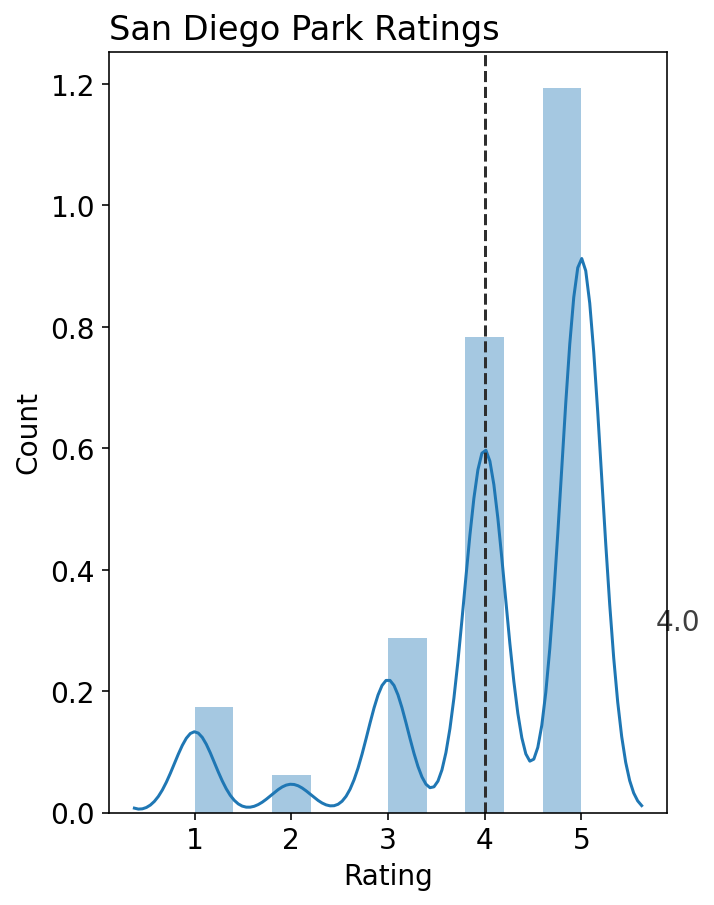

In [27]:
plt.subplot(1,3,1)
ax = sns.distplot(df['Rating'], bins = 10)
ax.axvline(df['Rating'].median(), color = '#2e2e2e', linestyle = '--')
plt.title('San Diego Park Ratings', loc = 'left')
ax.text(x=df['Rating'].median()+2, y= 0.3, s=df['Rating'].median(), fontsize = 14, alpha = 0.75, ha='center')
plt.xlabel('Rating')
plt.ylabel('Count')

The plot above displays the values of ratings that users gave to parks on Yelp. From the graph, we can see that the median rating was 4, and that the majority of ratings were greater than 4. This data suggests that San Diego parks overall received a more positive rating than a negative one. It is important to note that this data may not be including all San Diego parks, since we dropped all entries that did not have the word 'park.' Because of this, we may be missing out on data from actual parks. It is also possible that we may have included places that are not actually parks but had the word 'park' in them, such as a place called "Central Park Apartments" which gives ratings for an apartment complex and not an actual park.

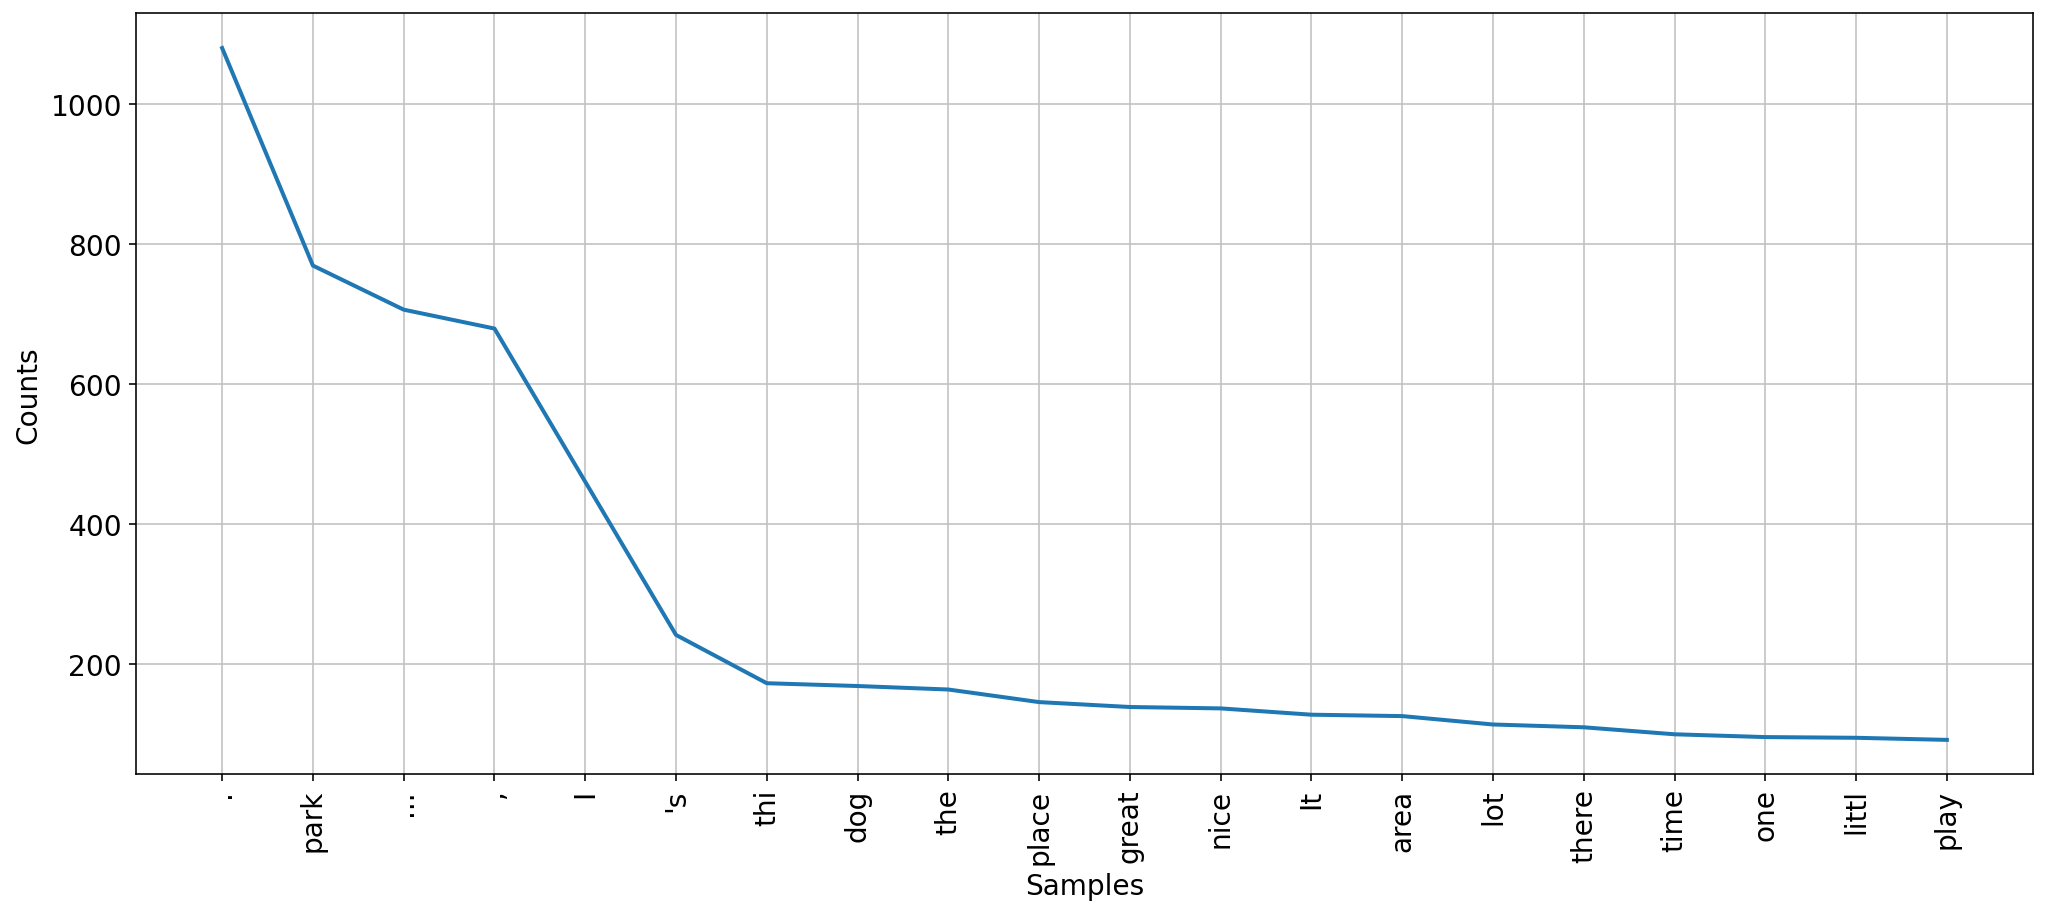

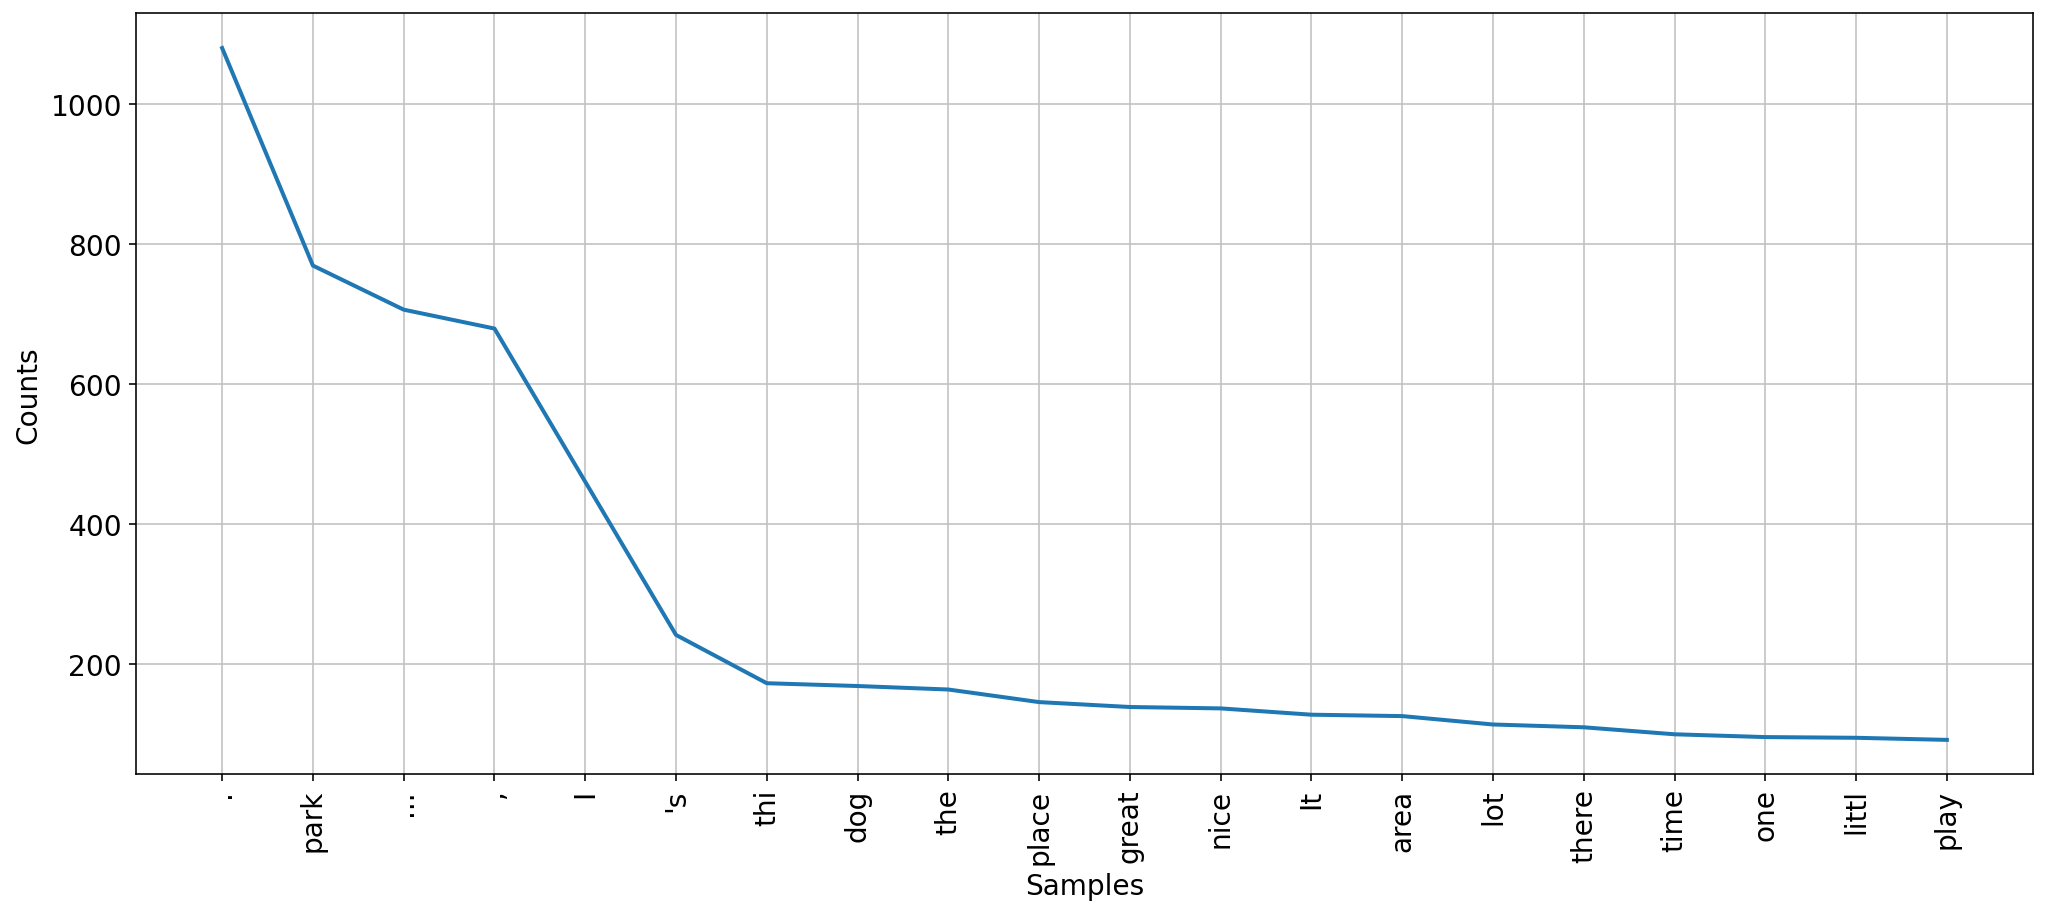

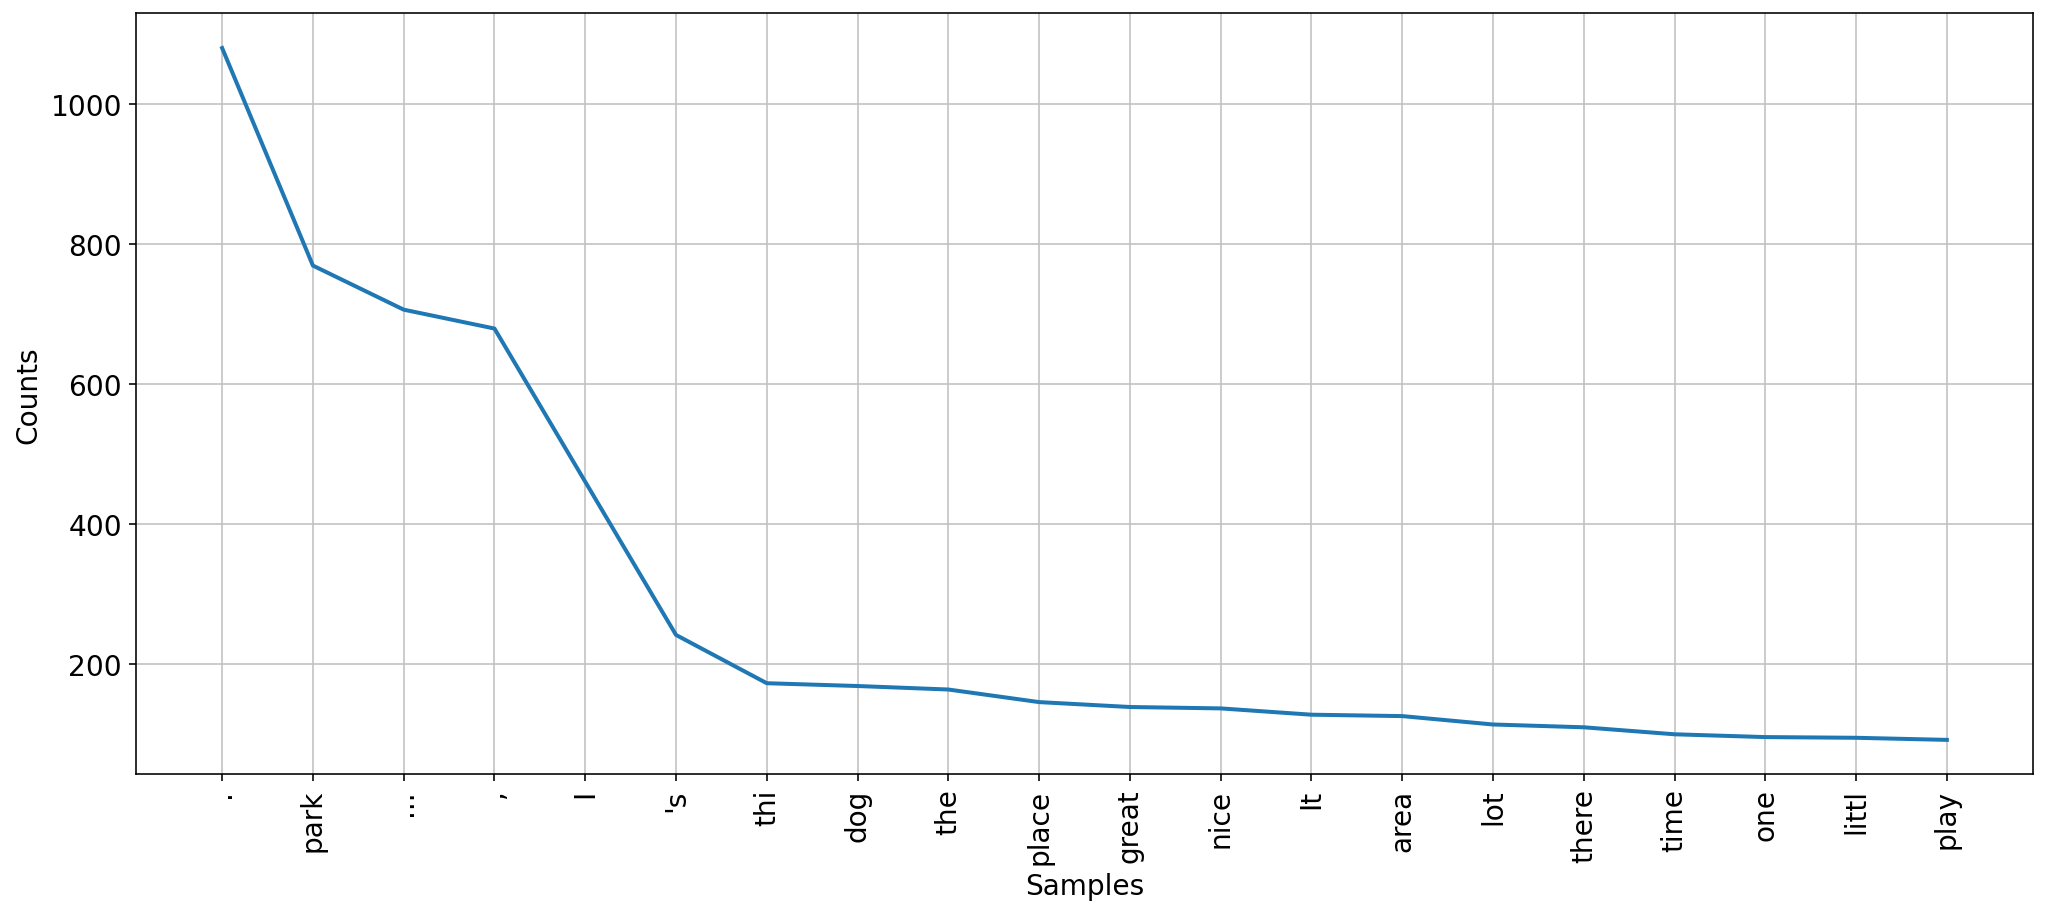

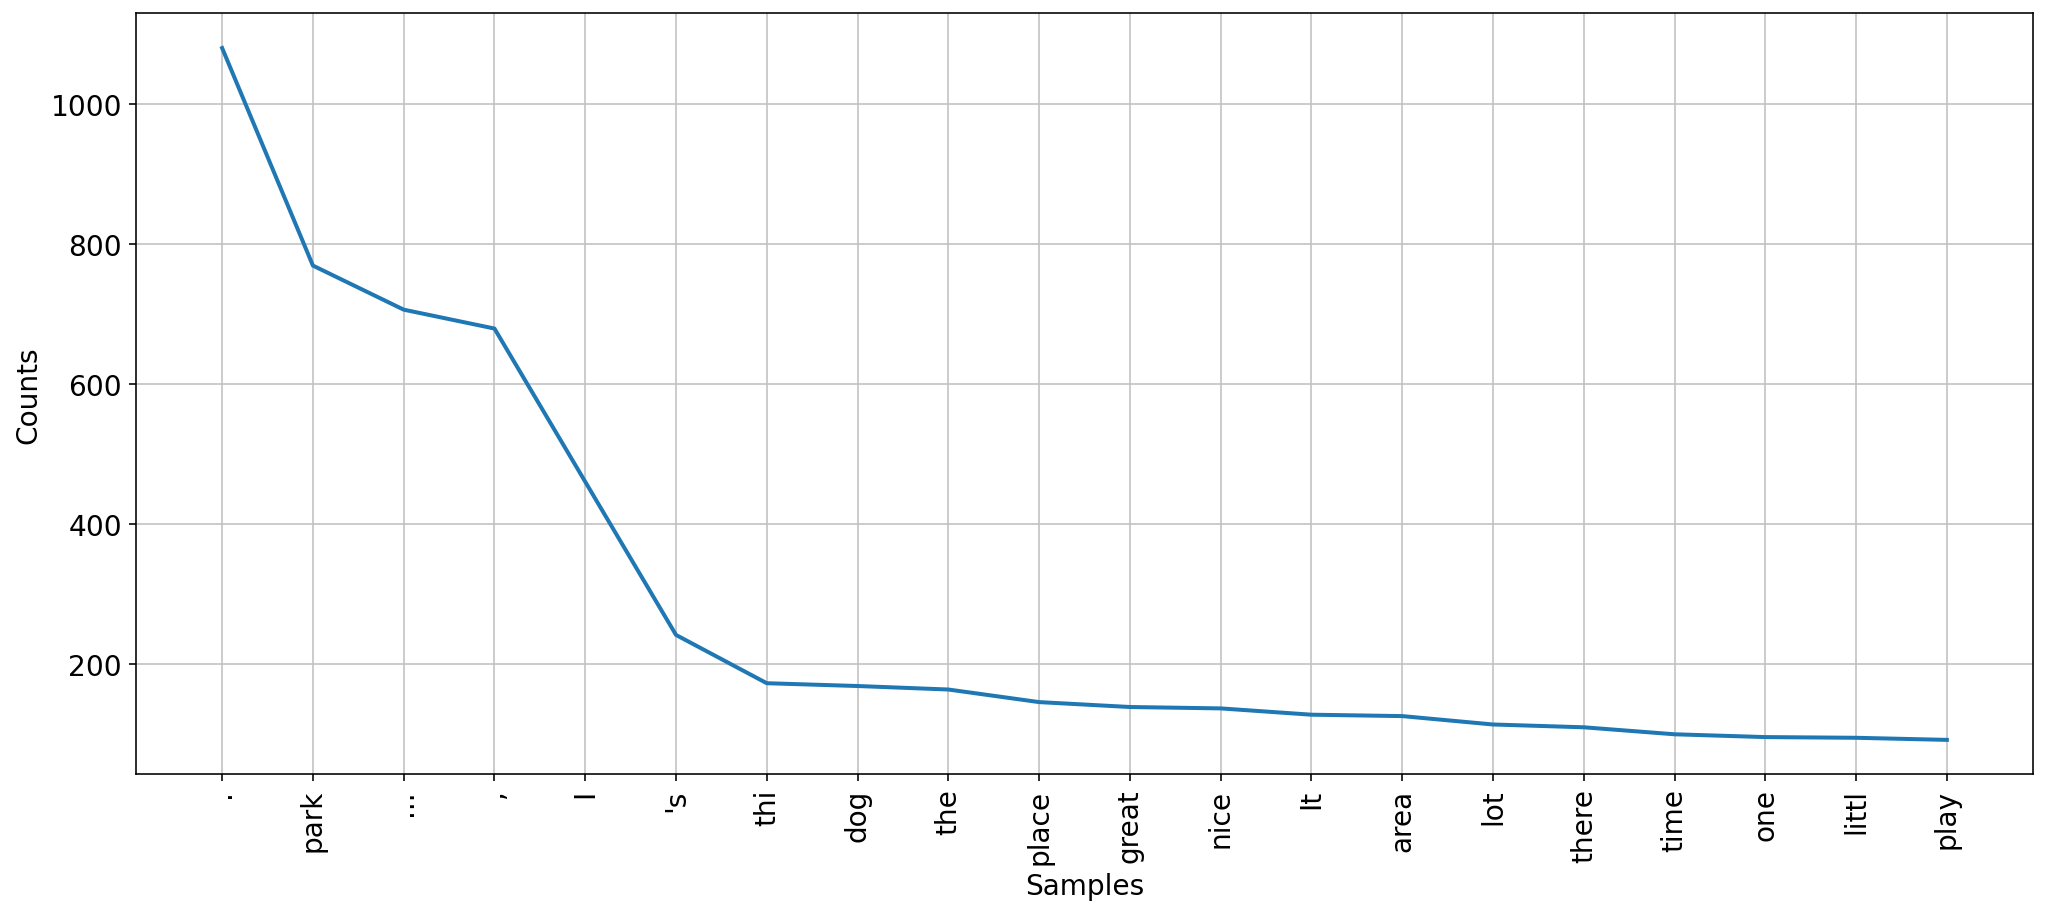

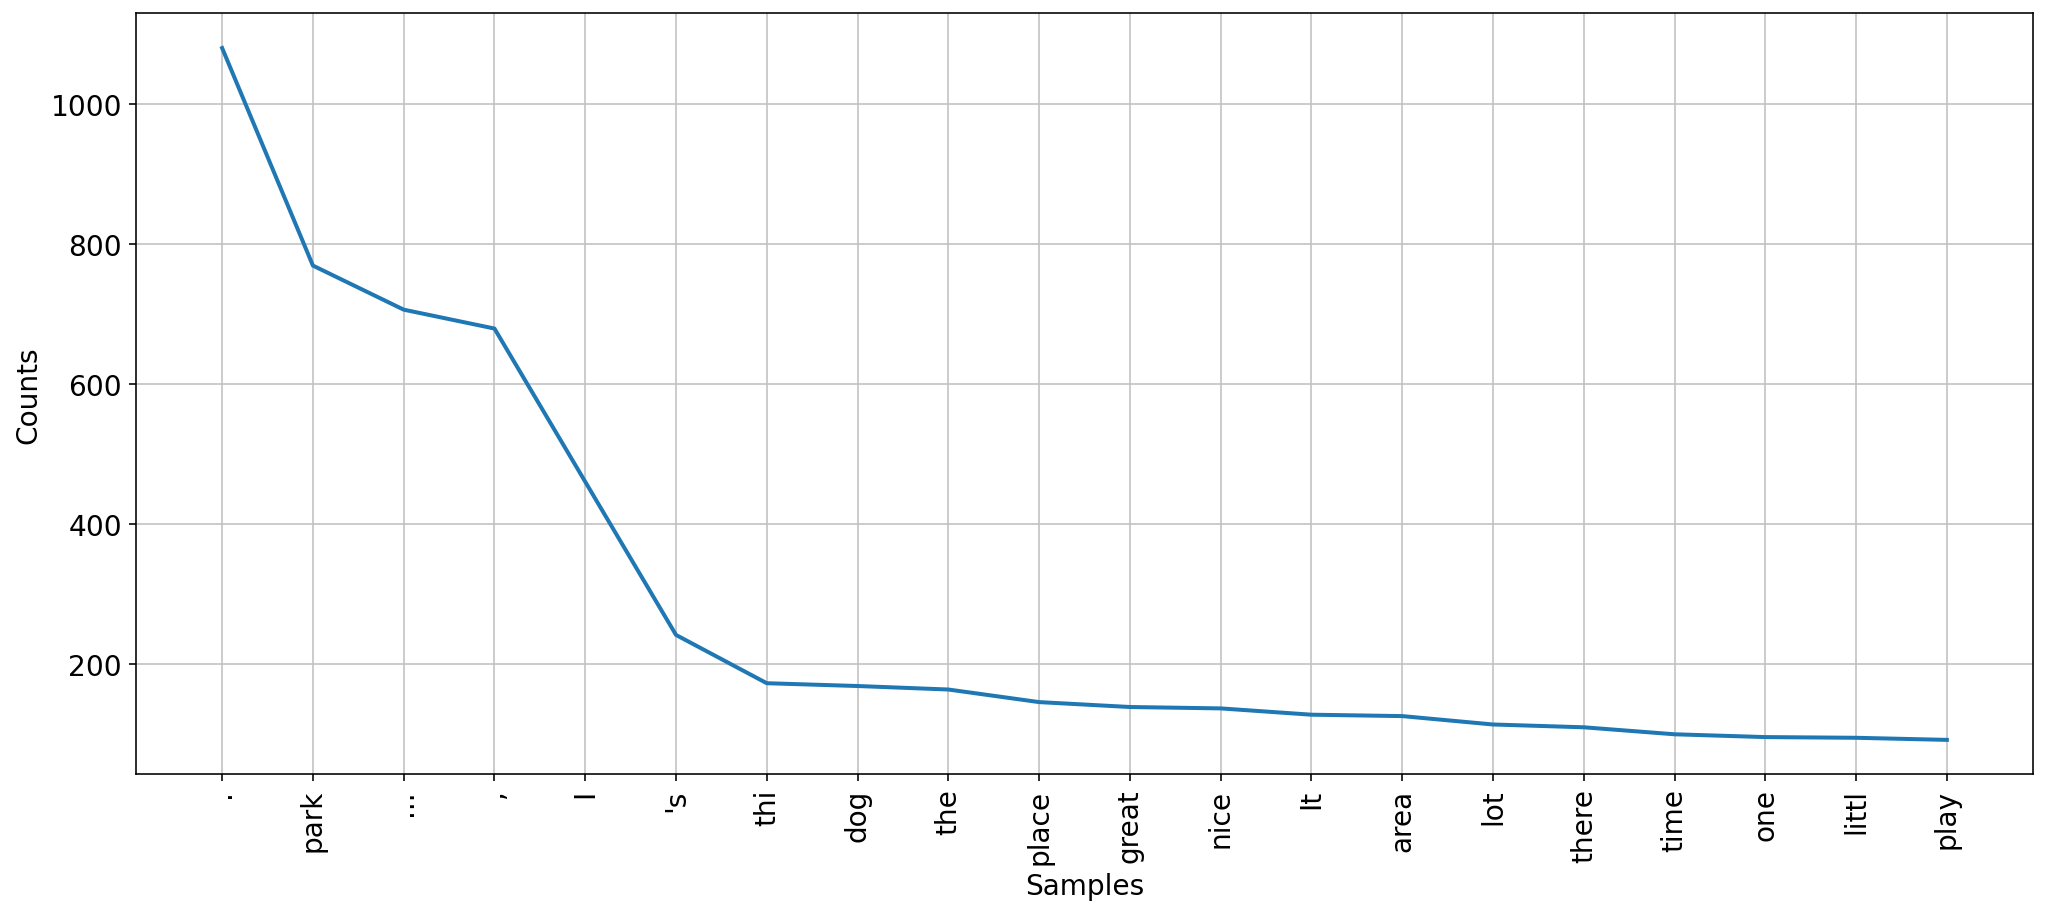

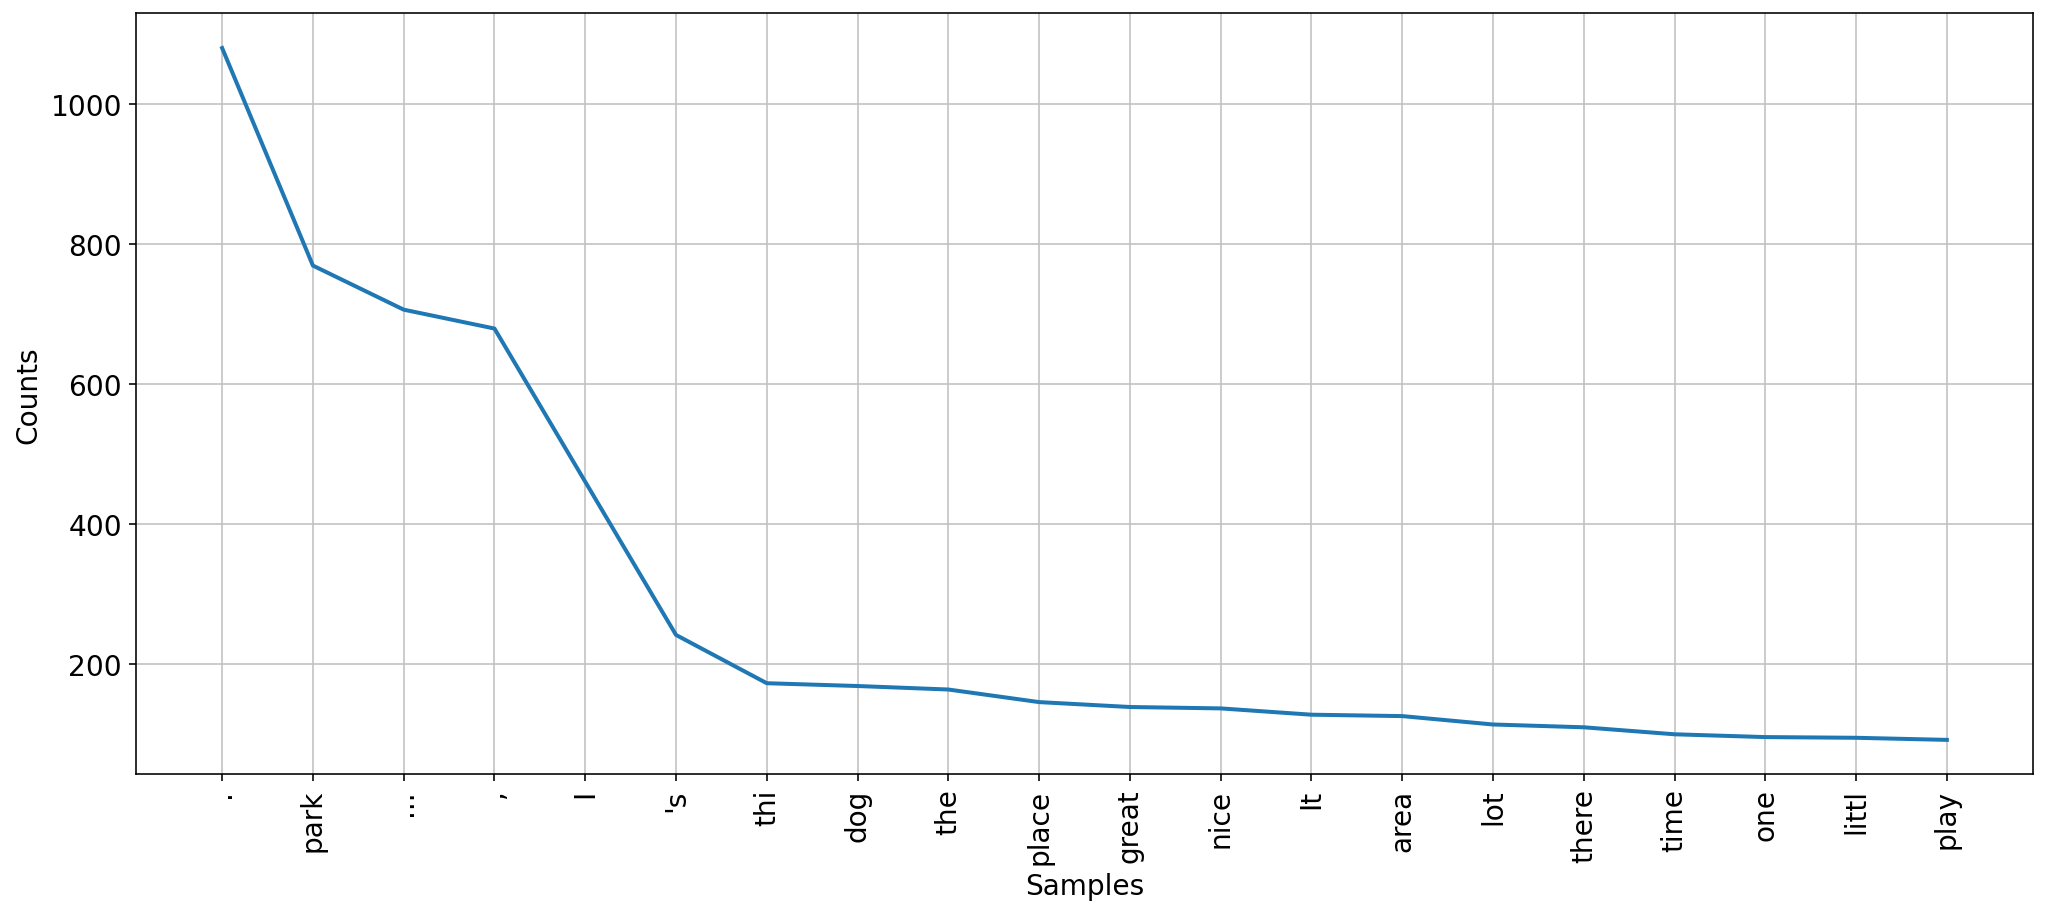

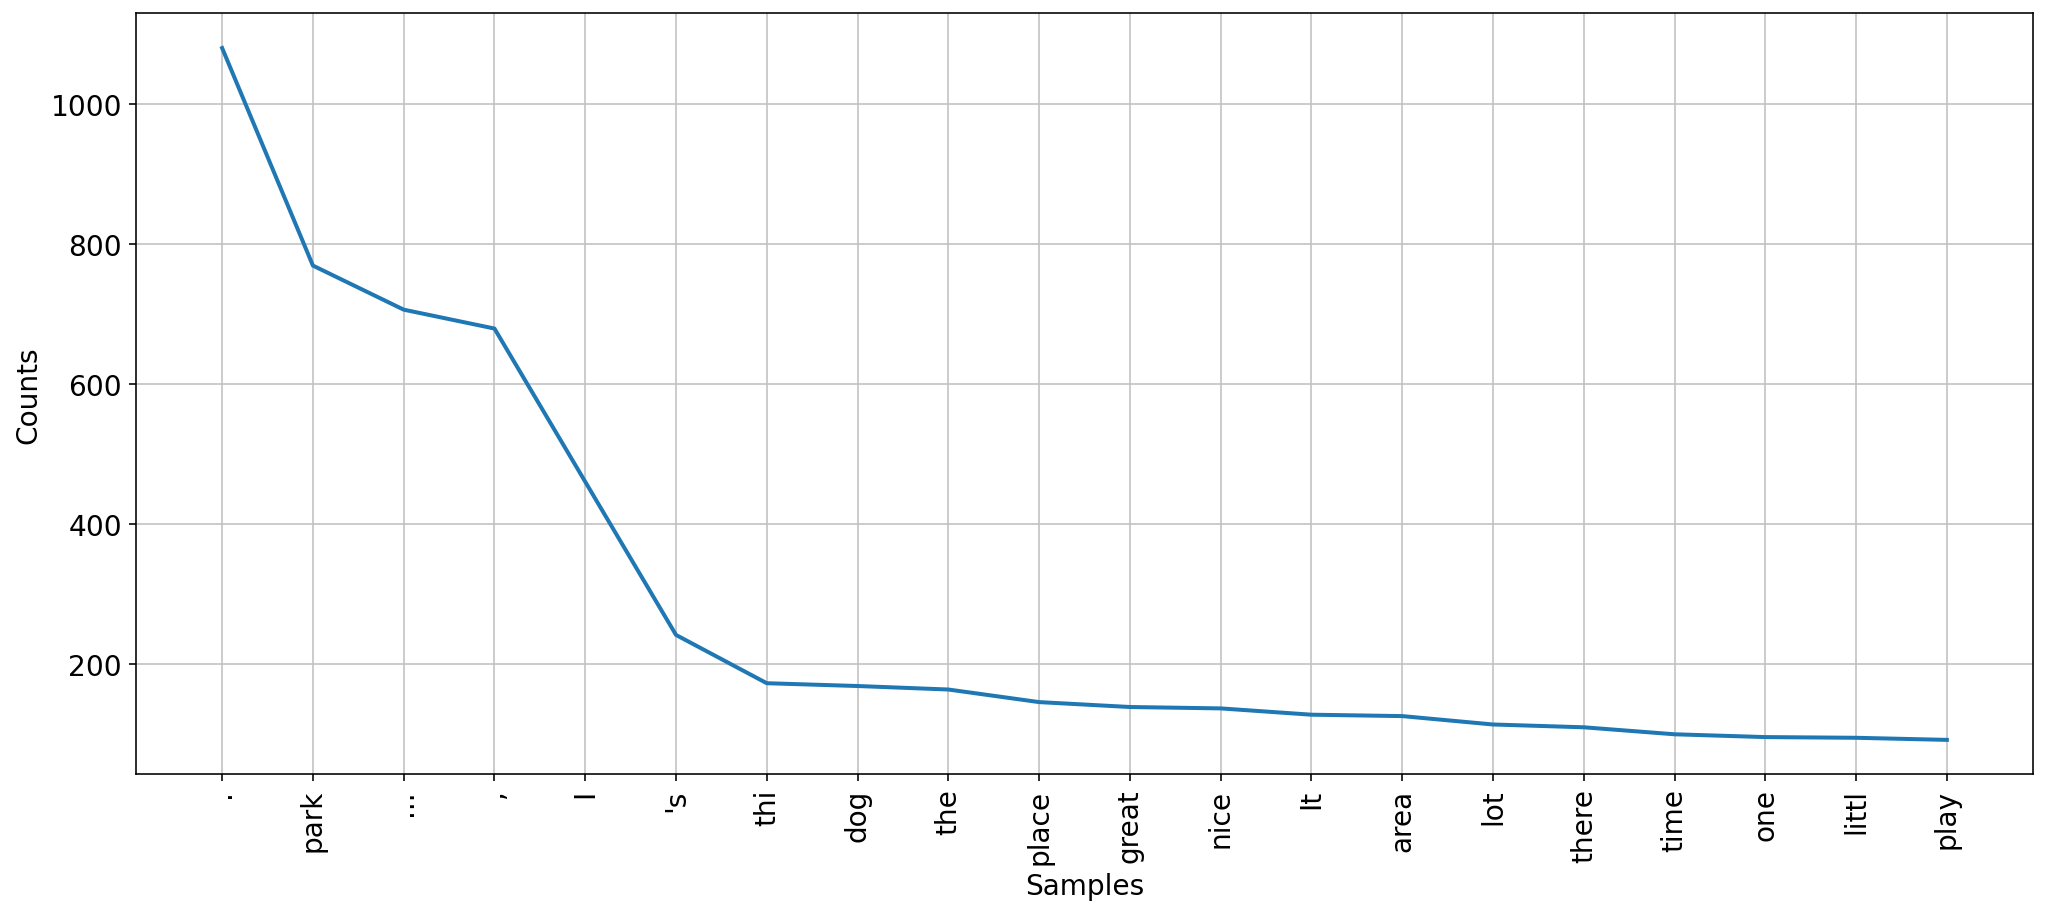

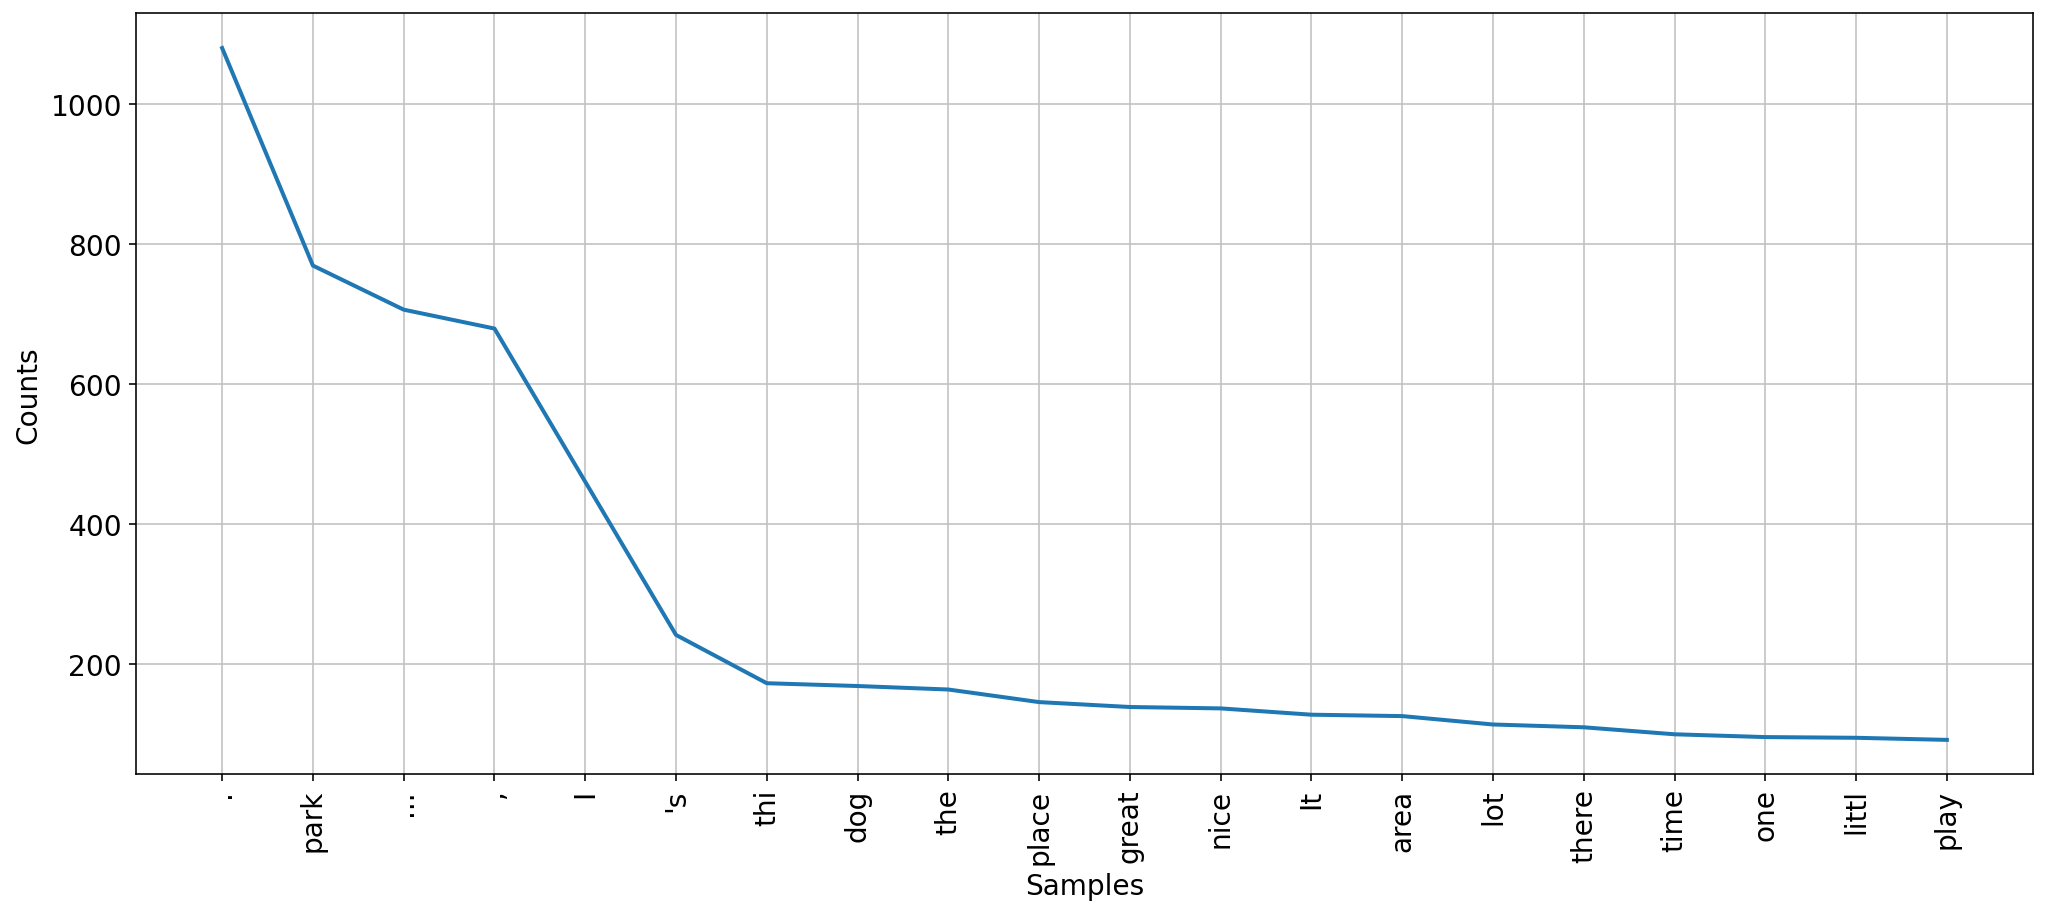

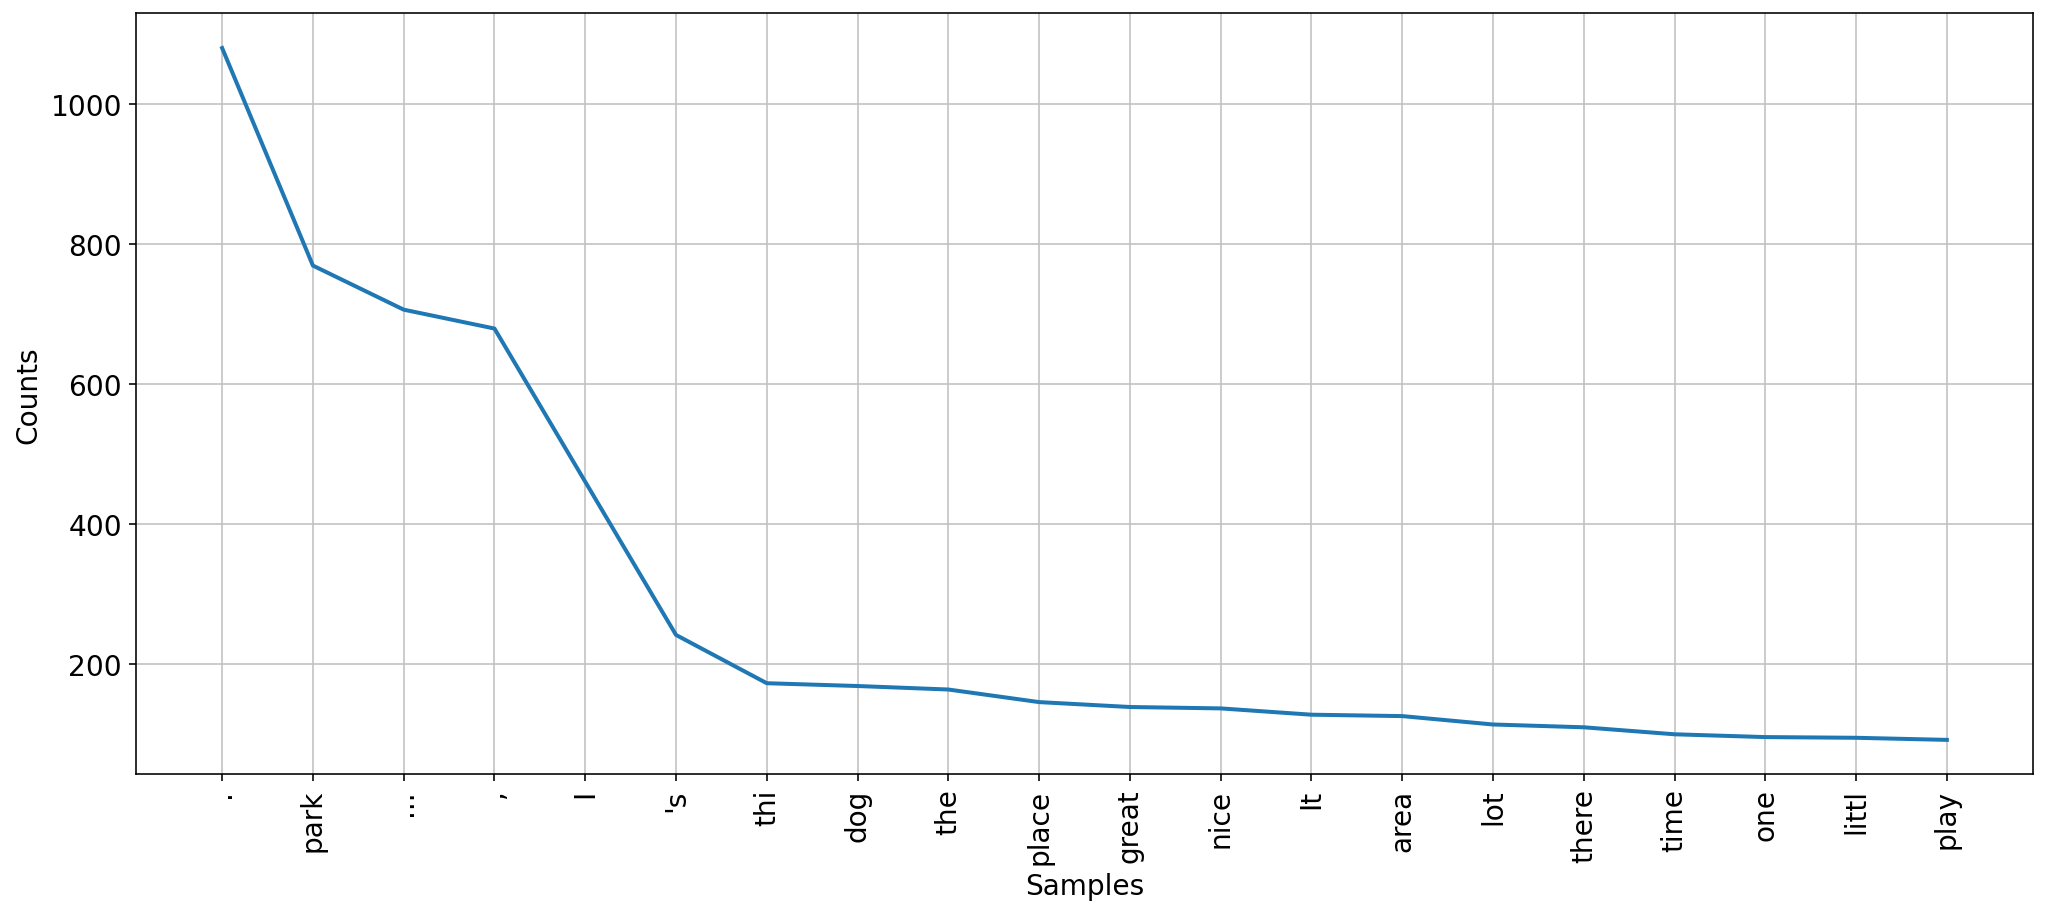

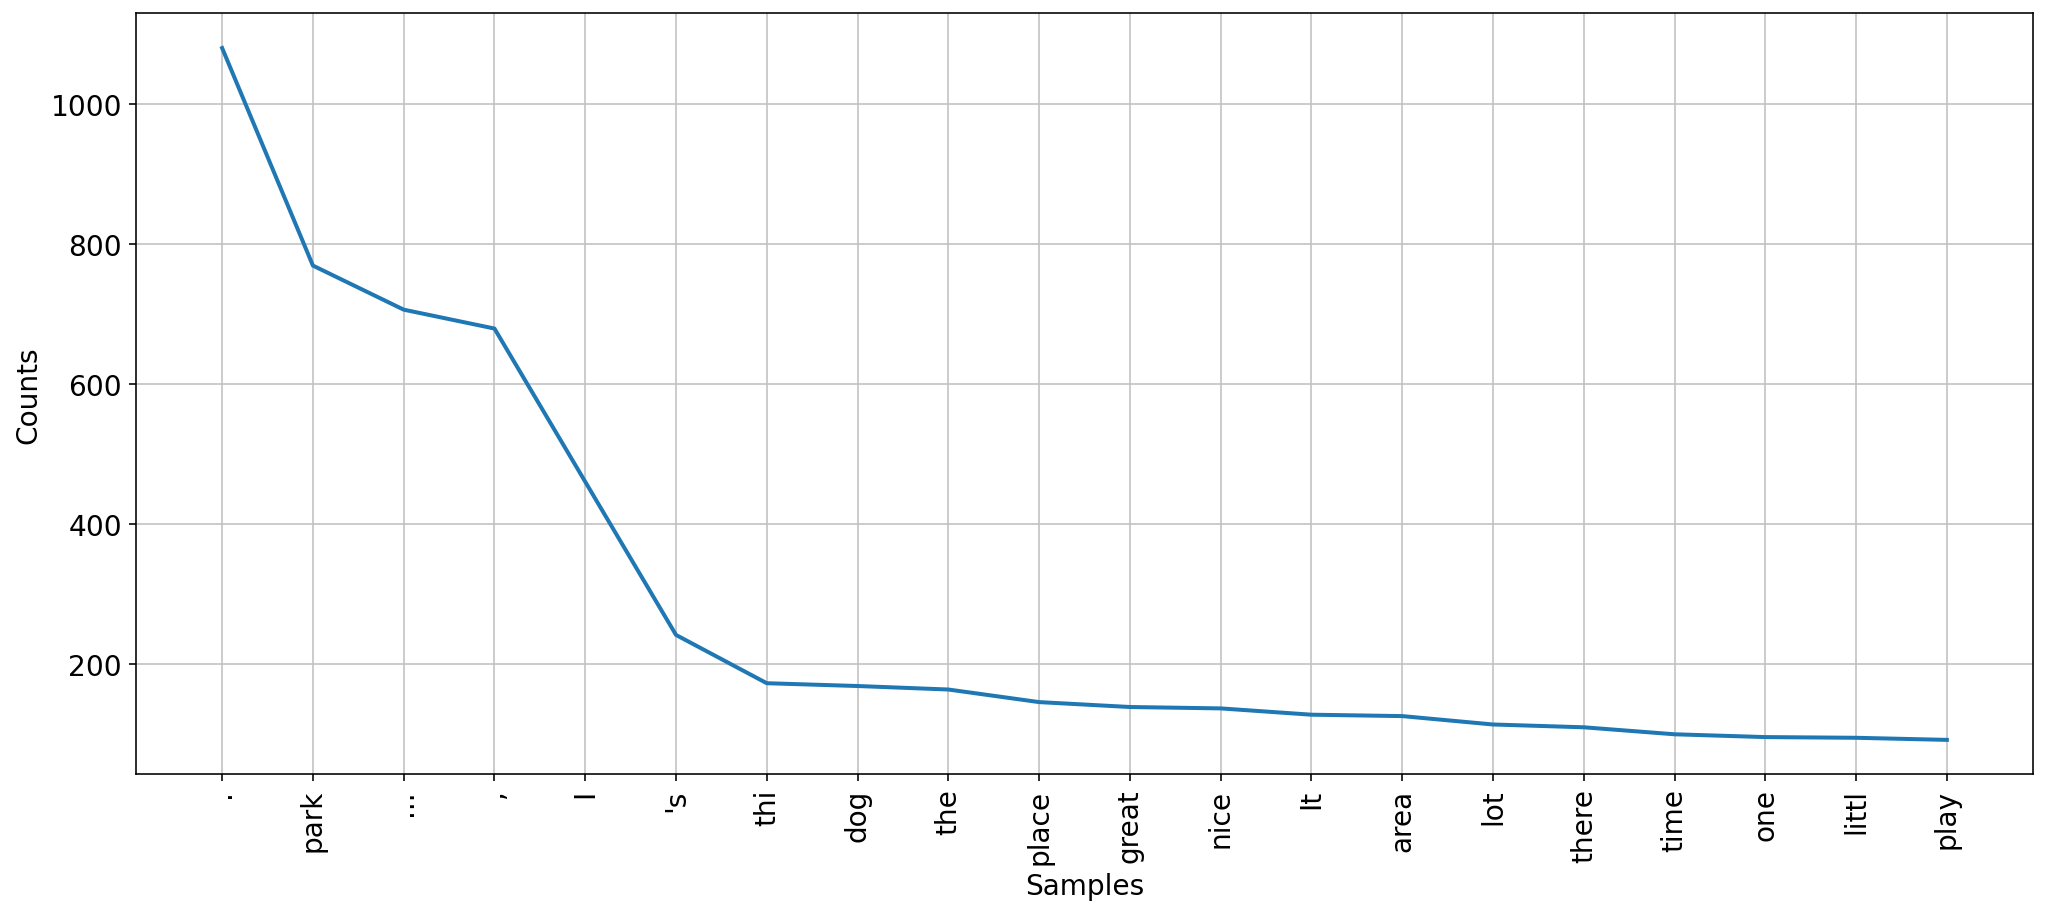

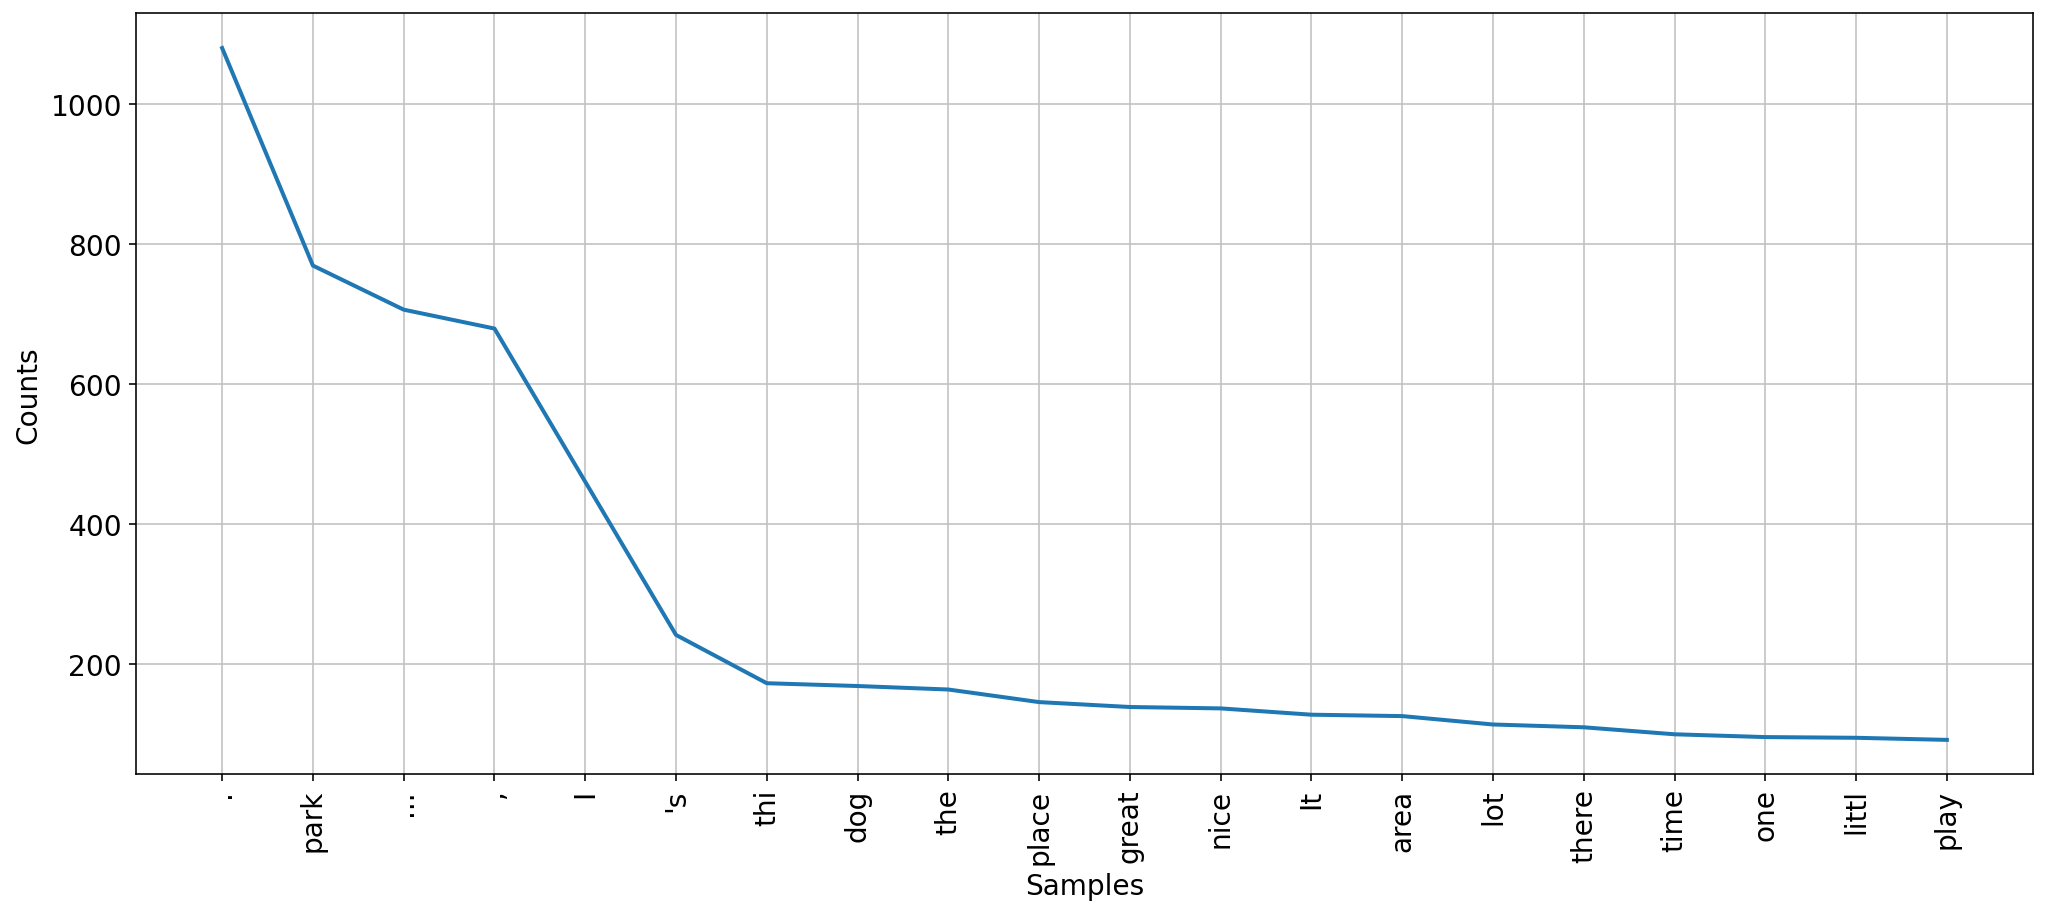

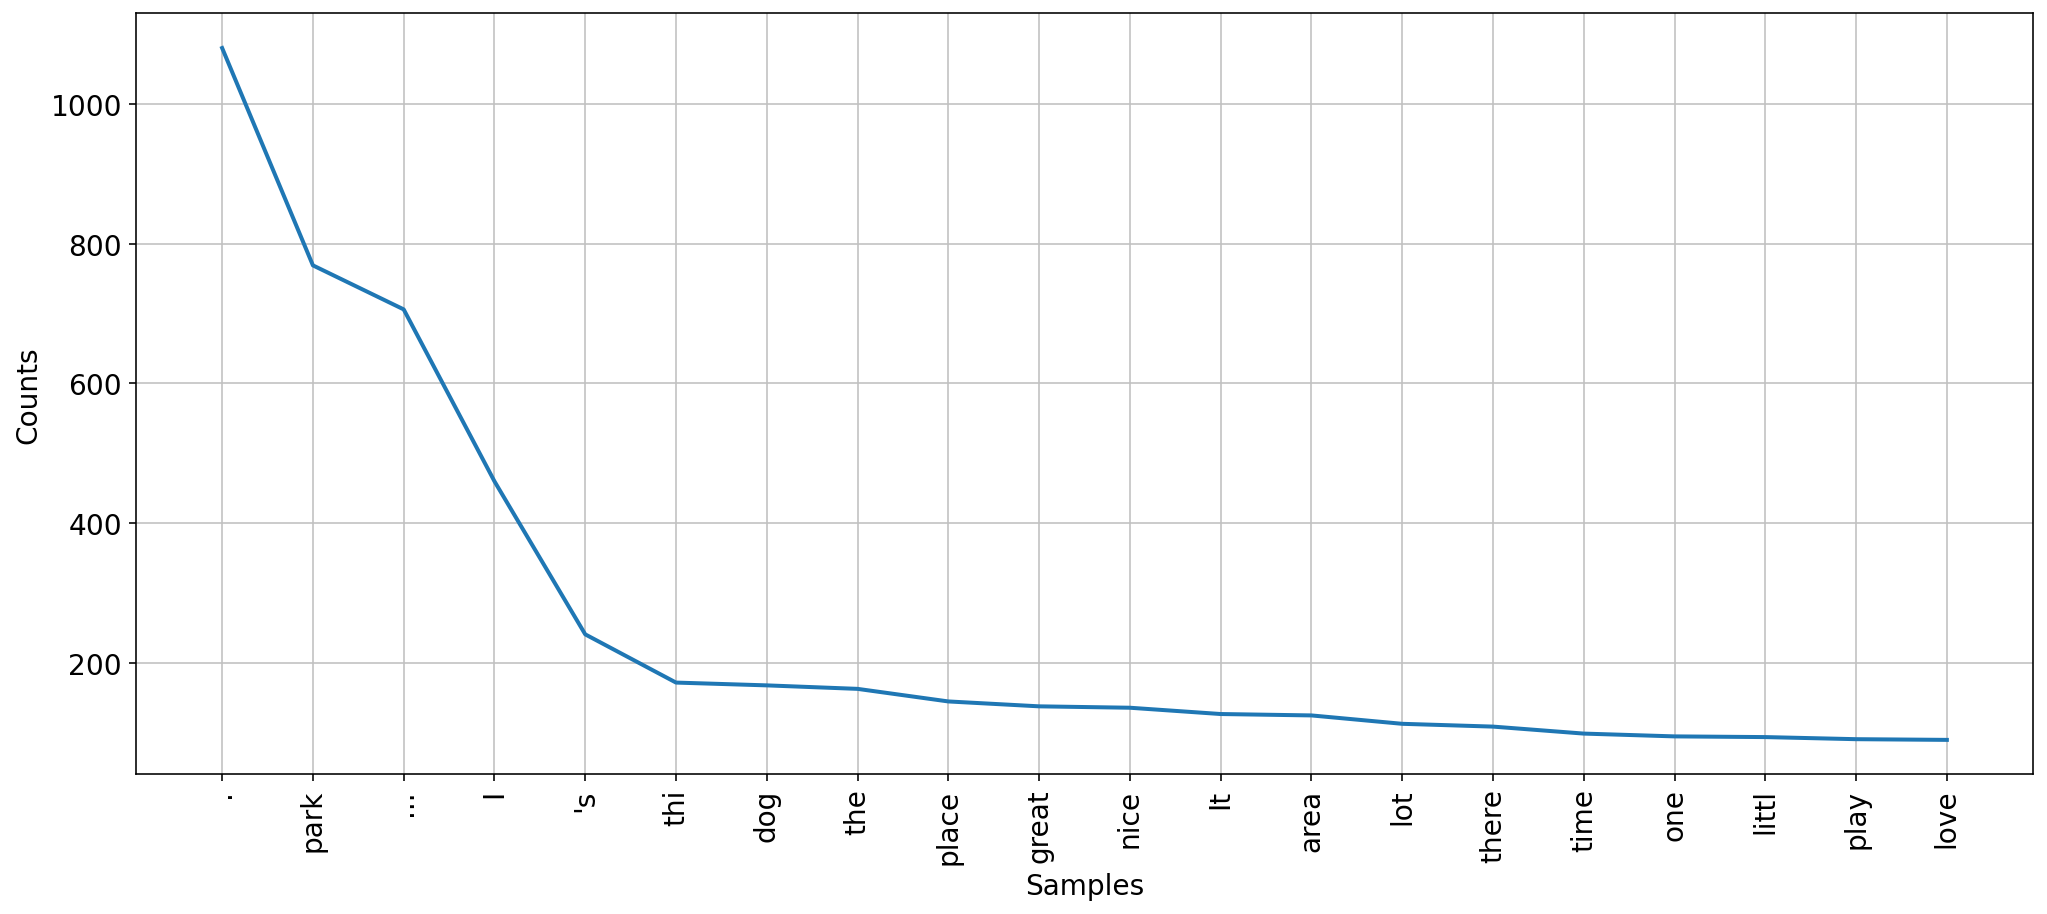

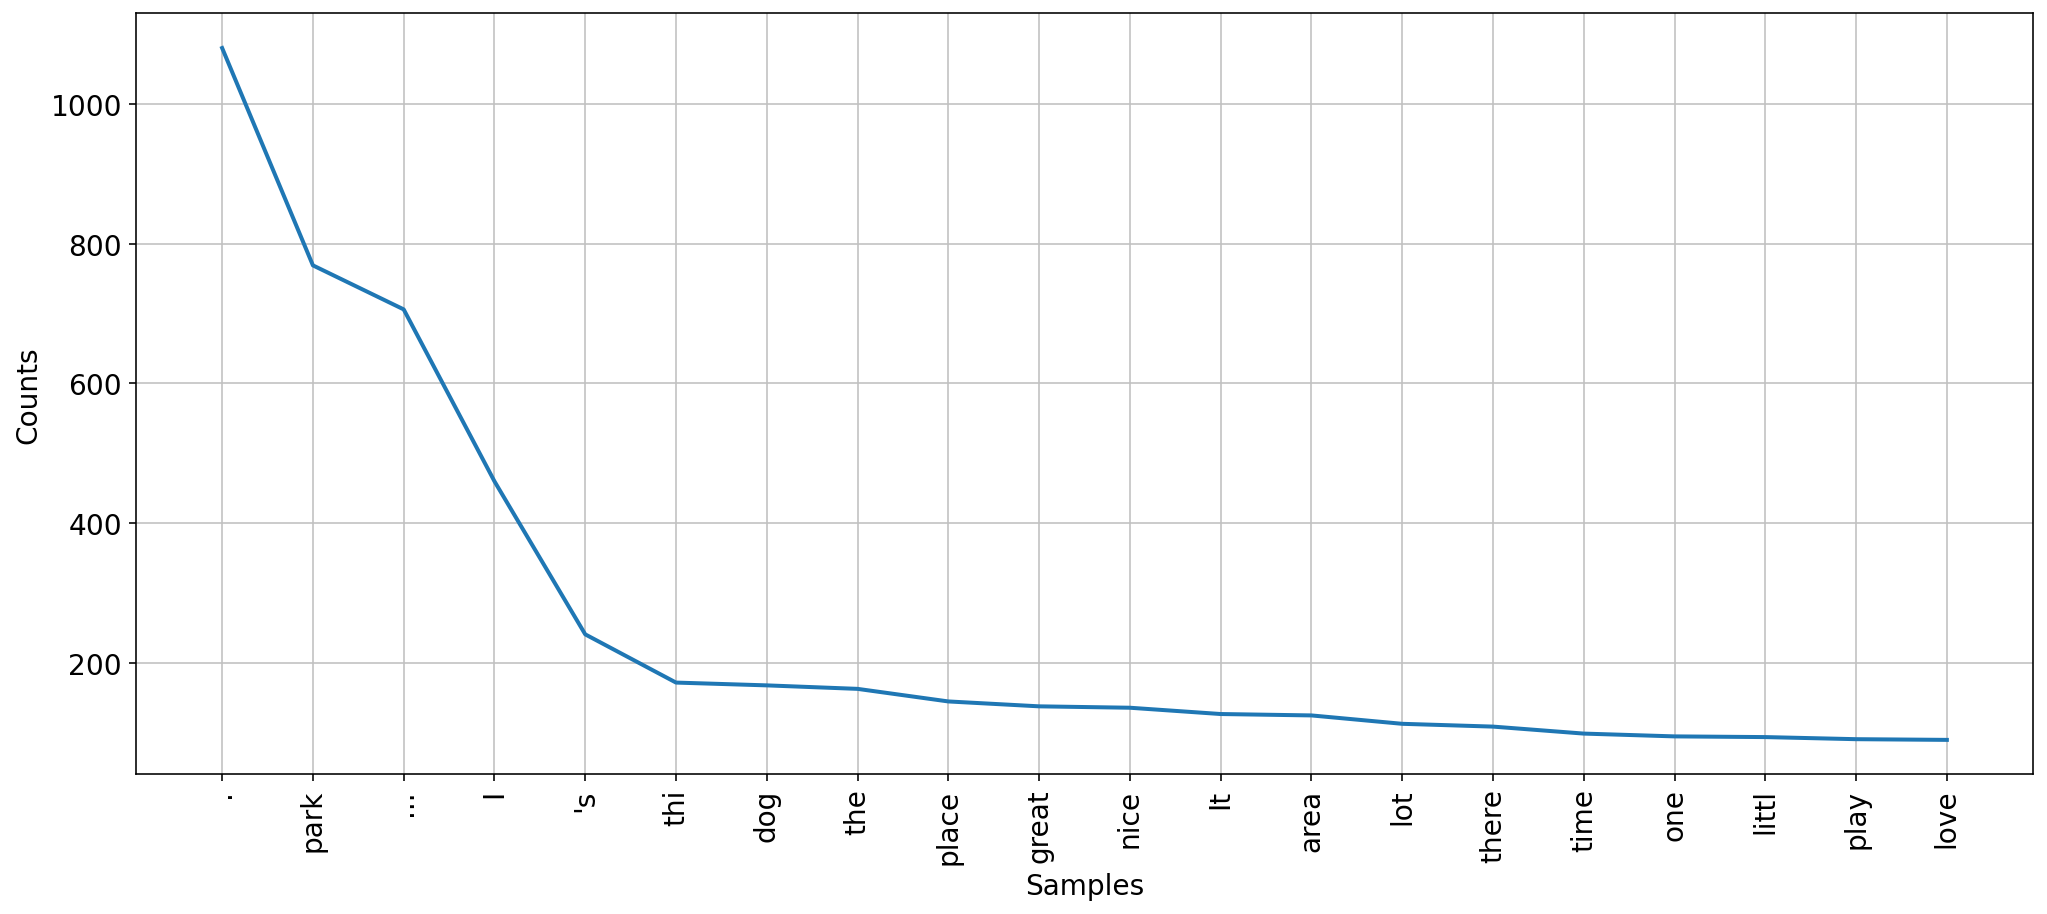

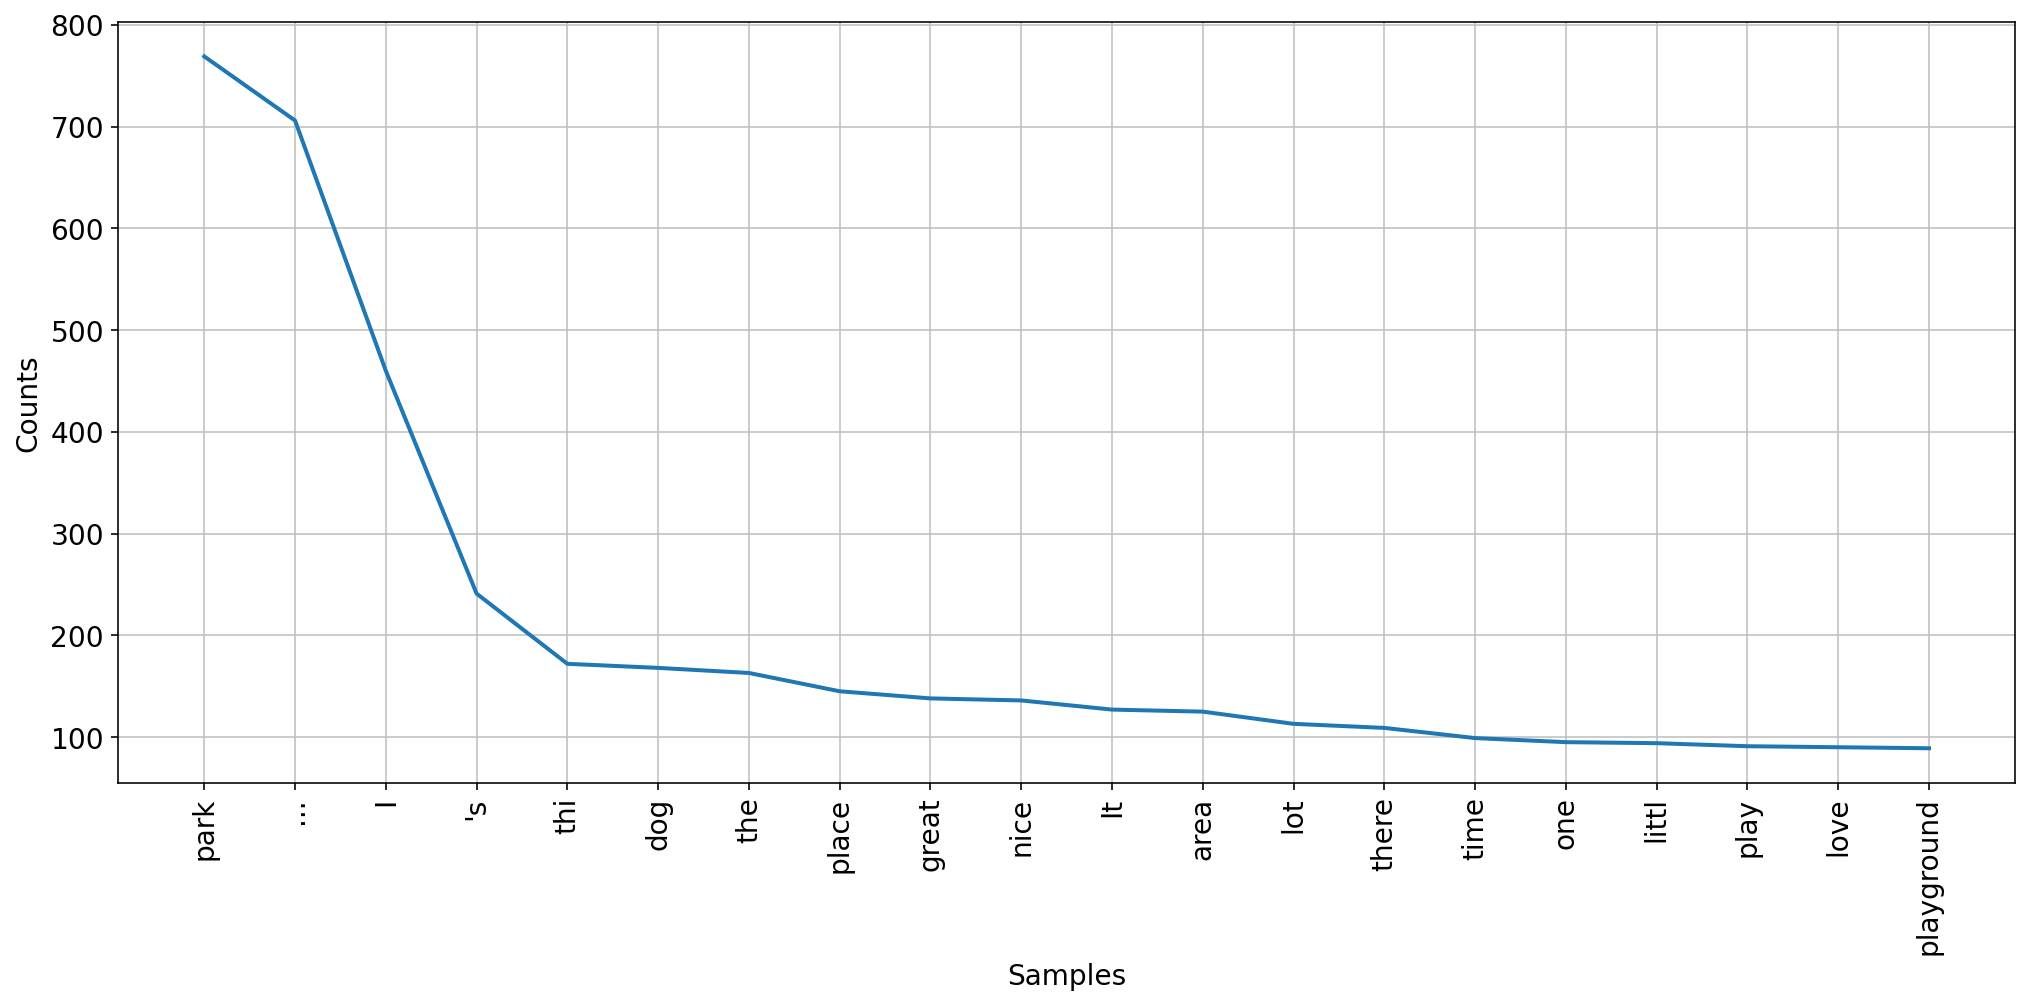

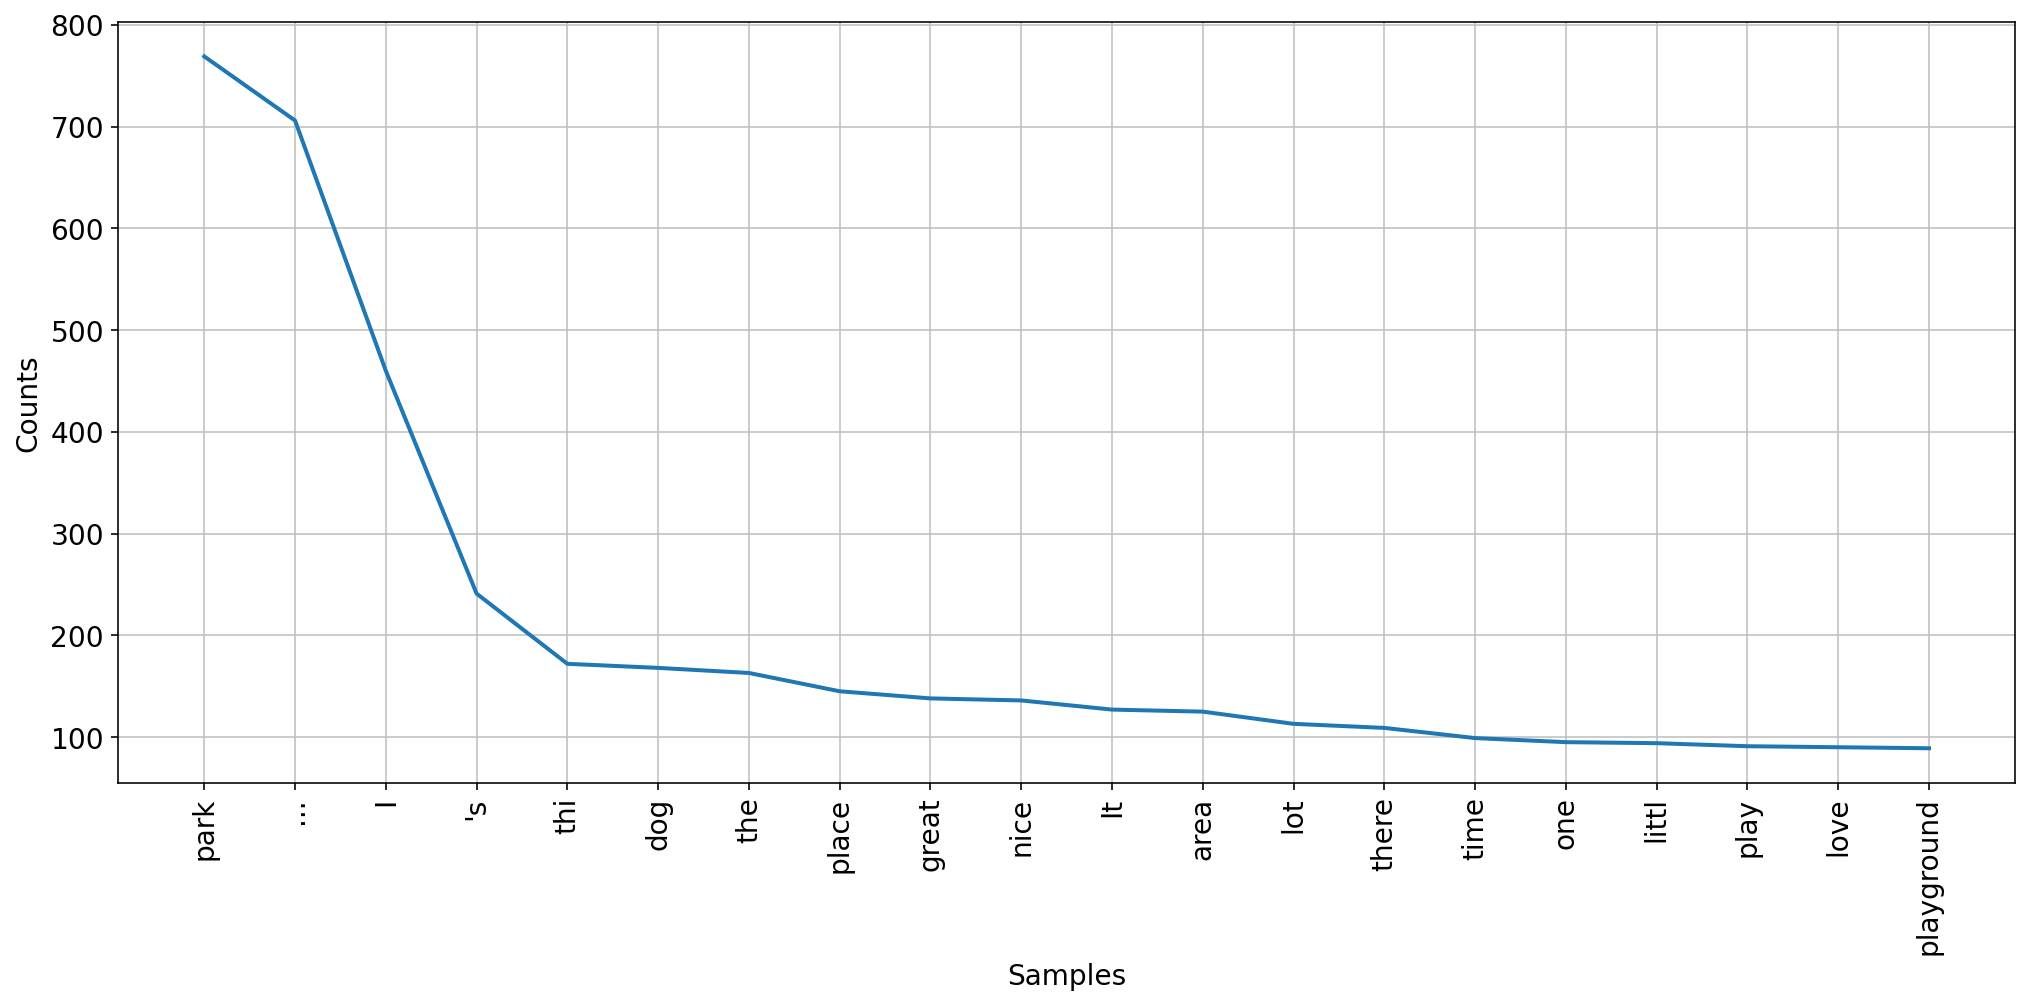

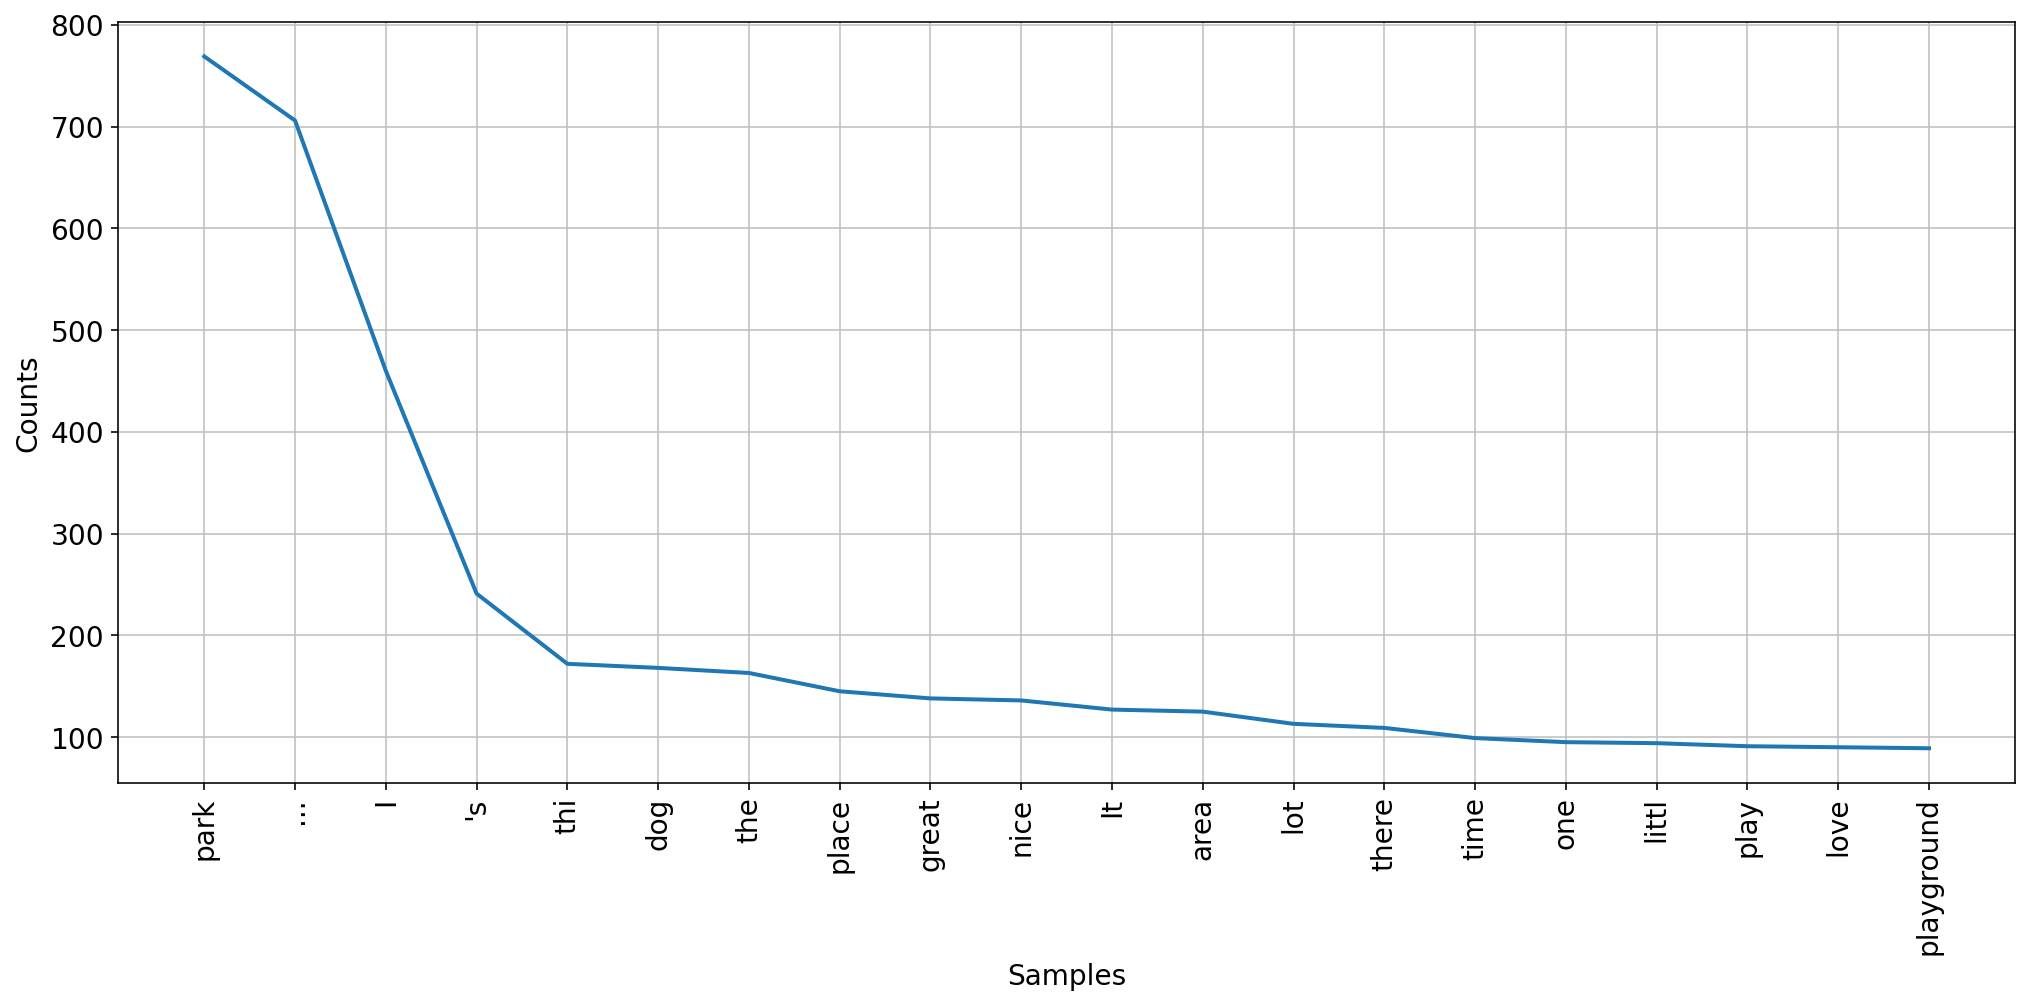

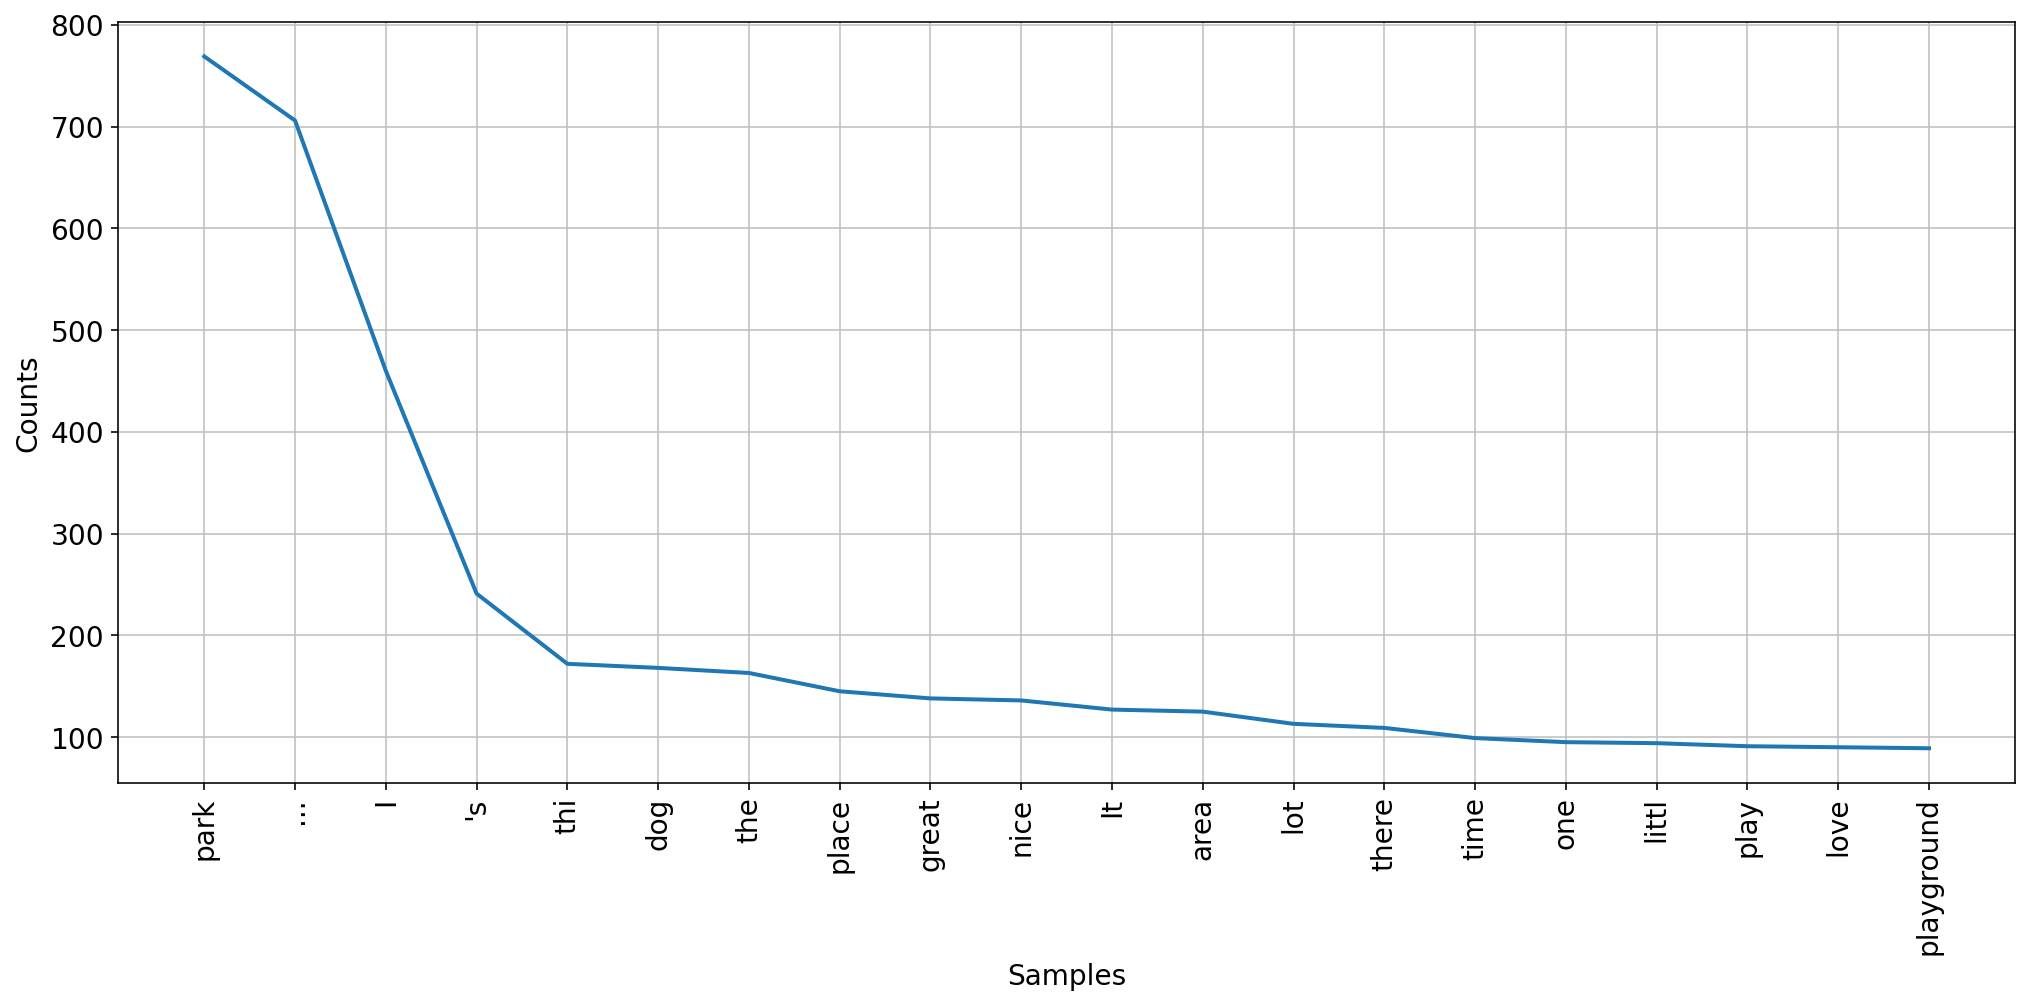

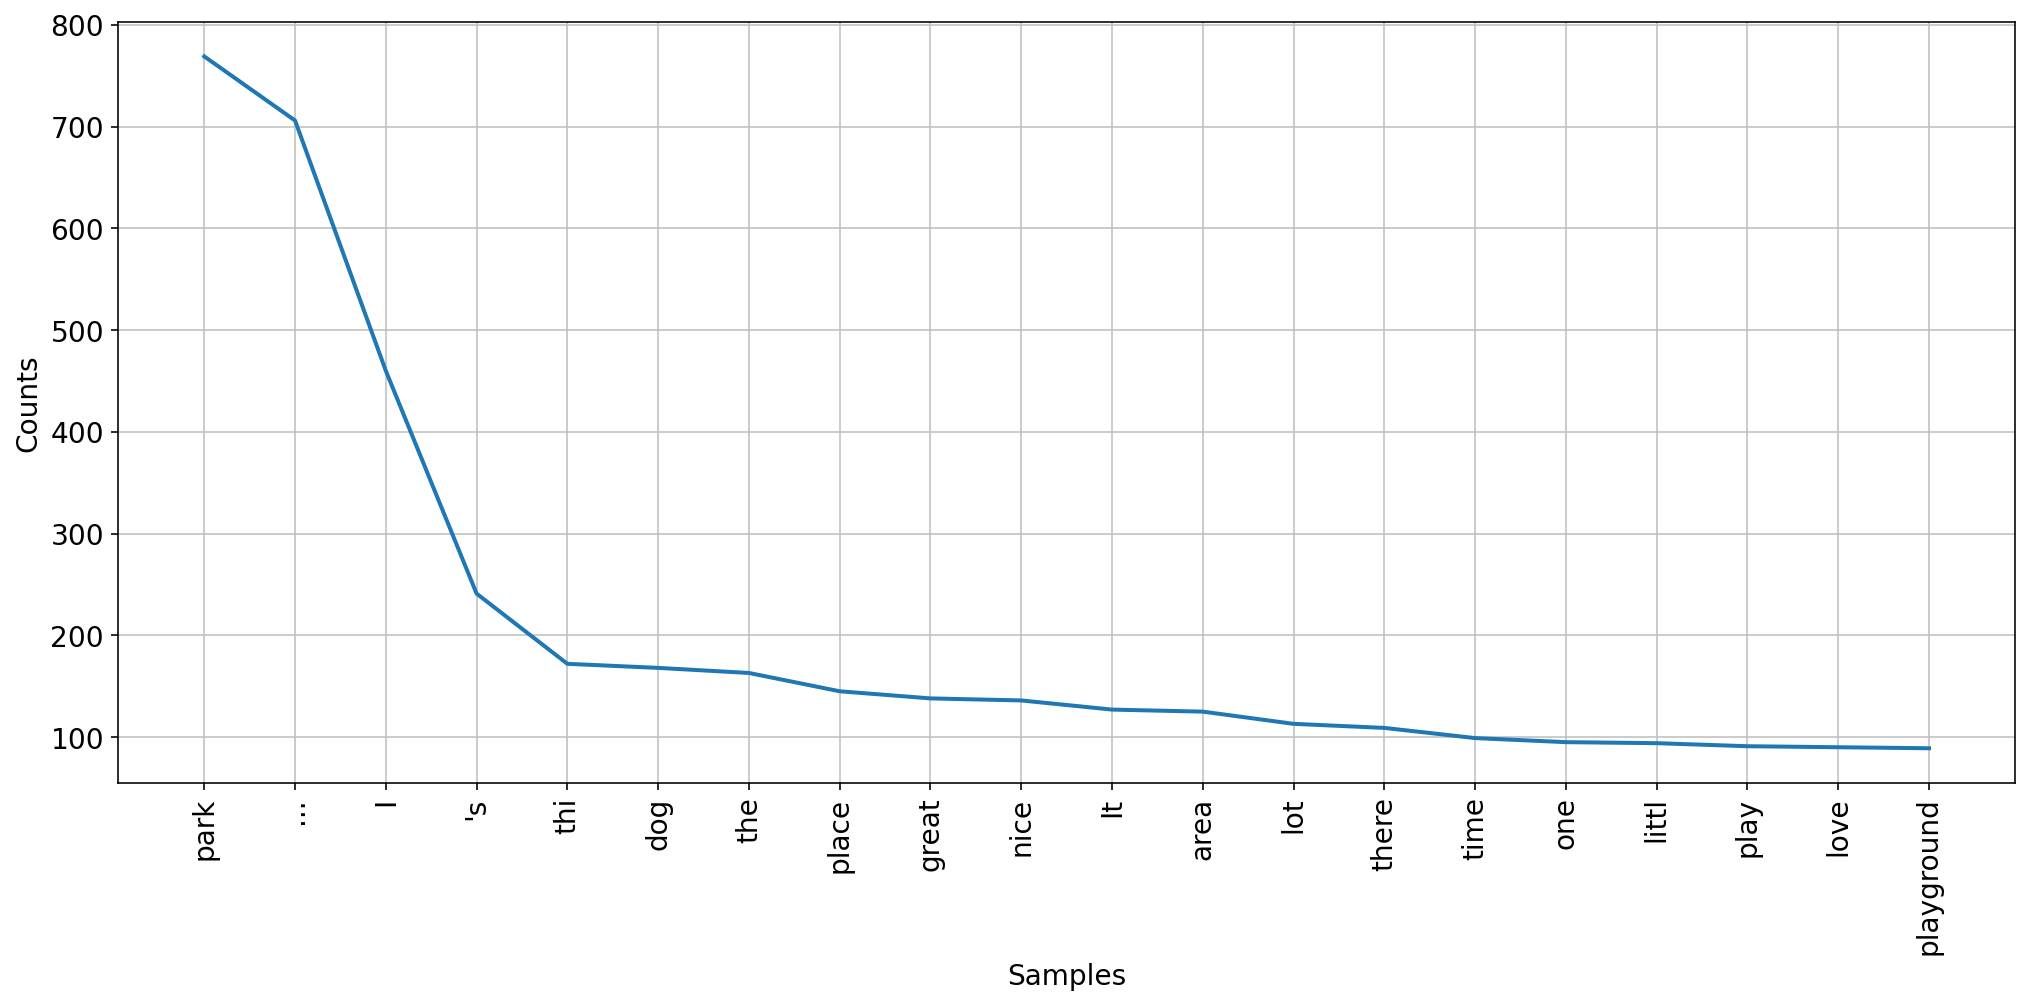

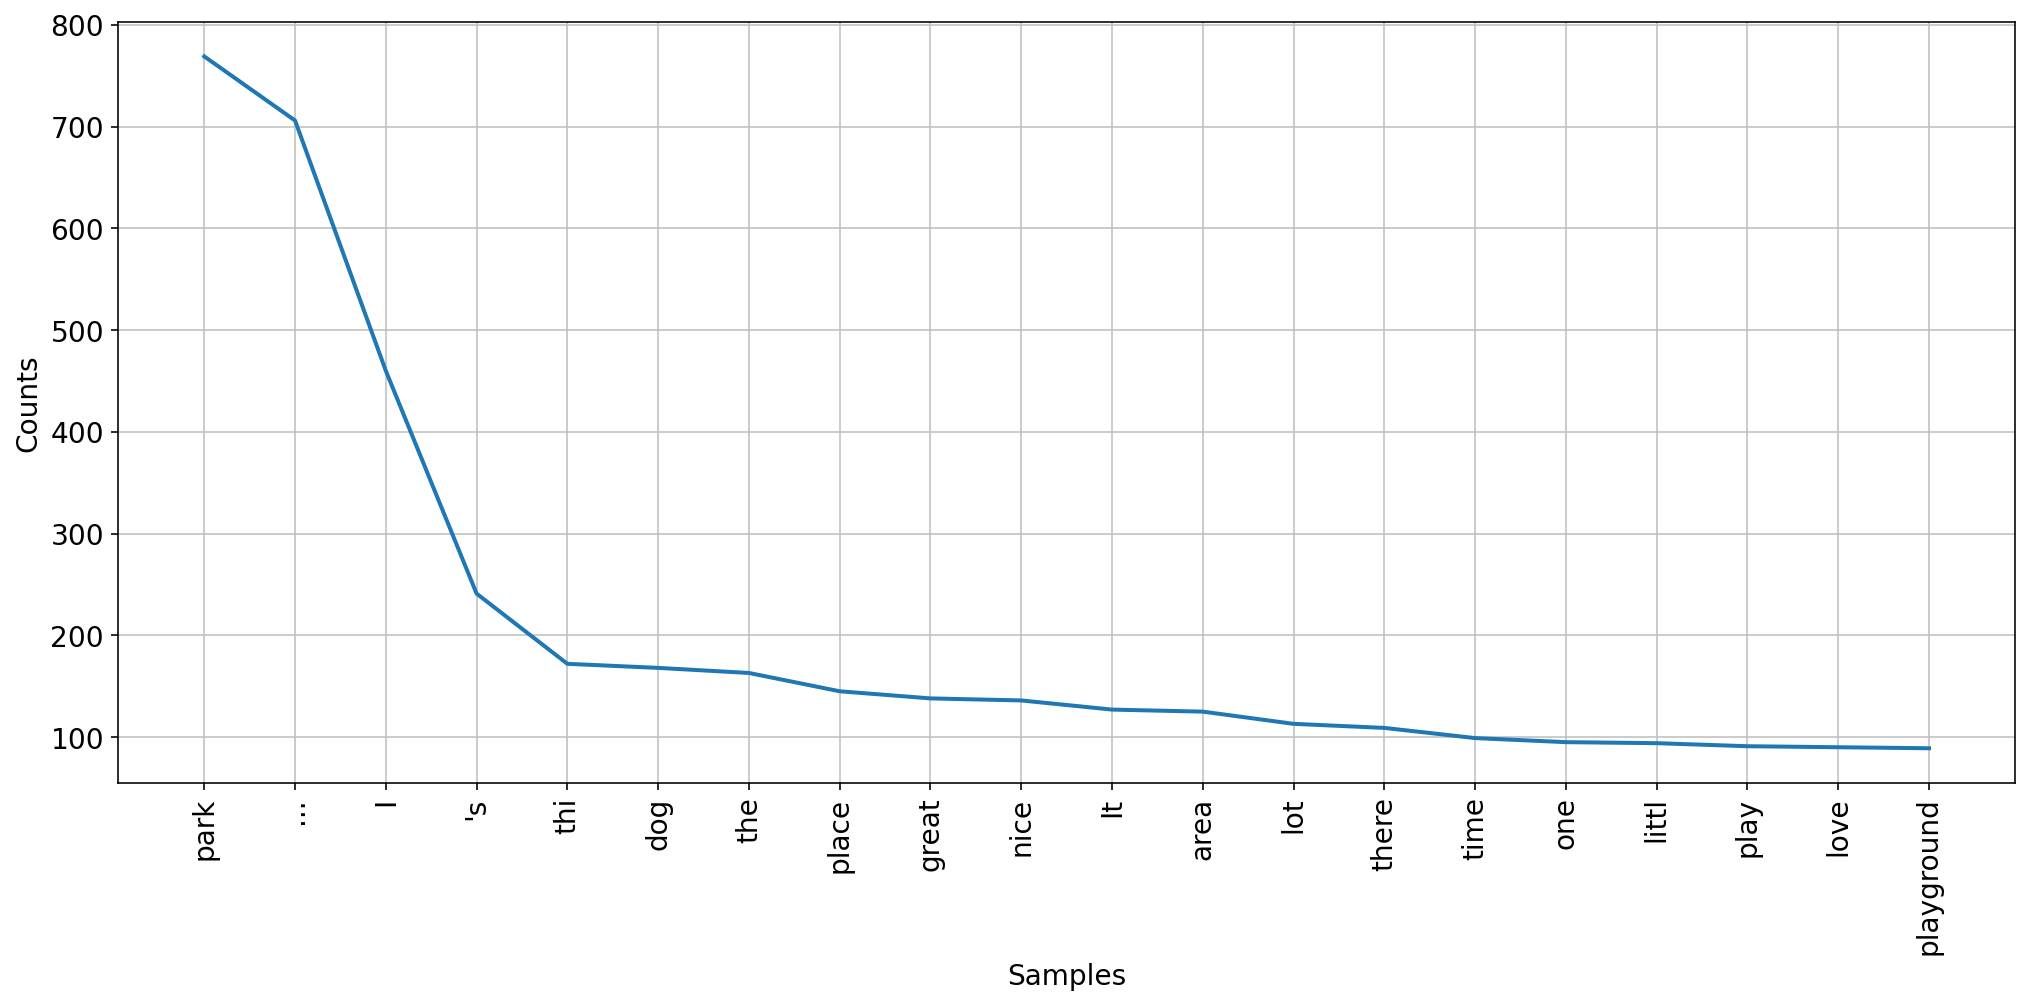

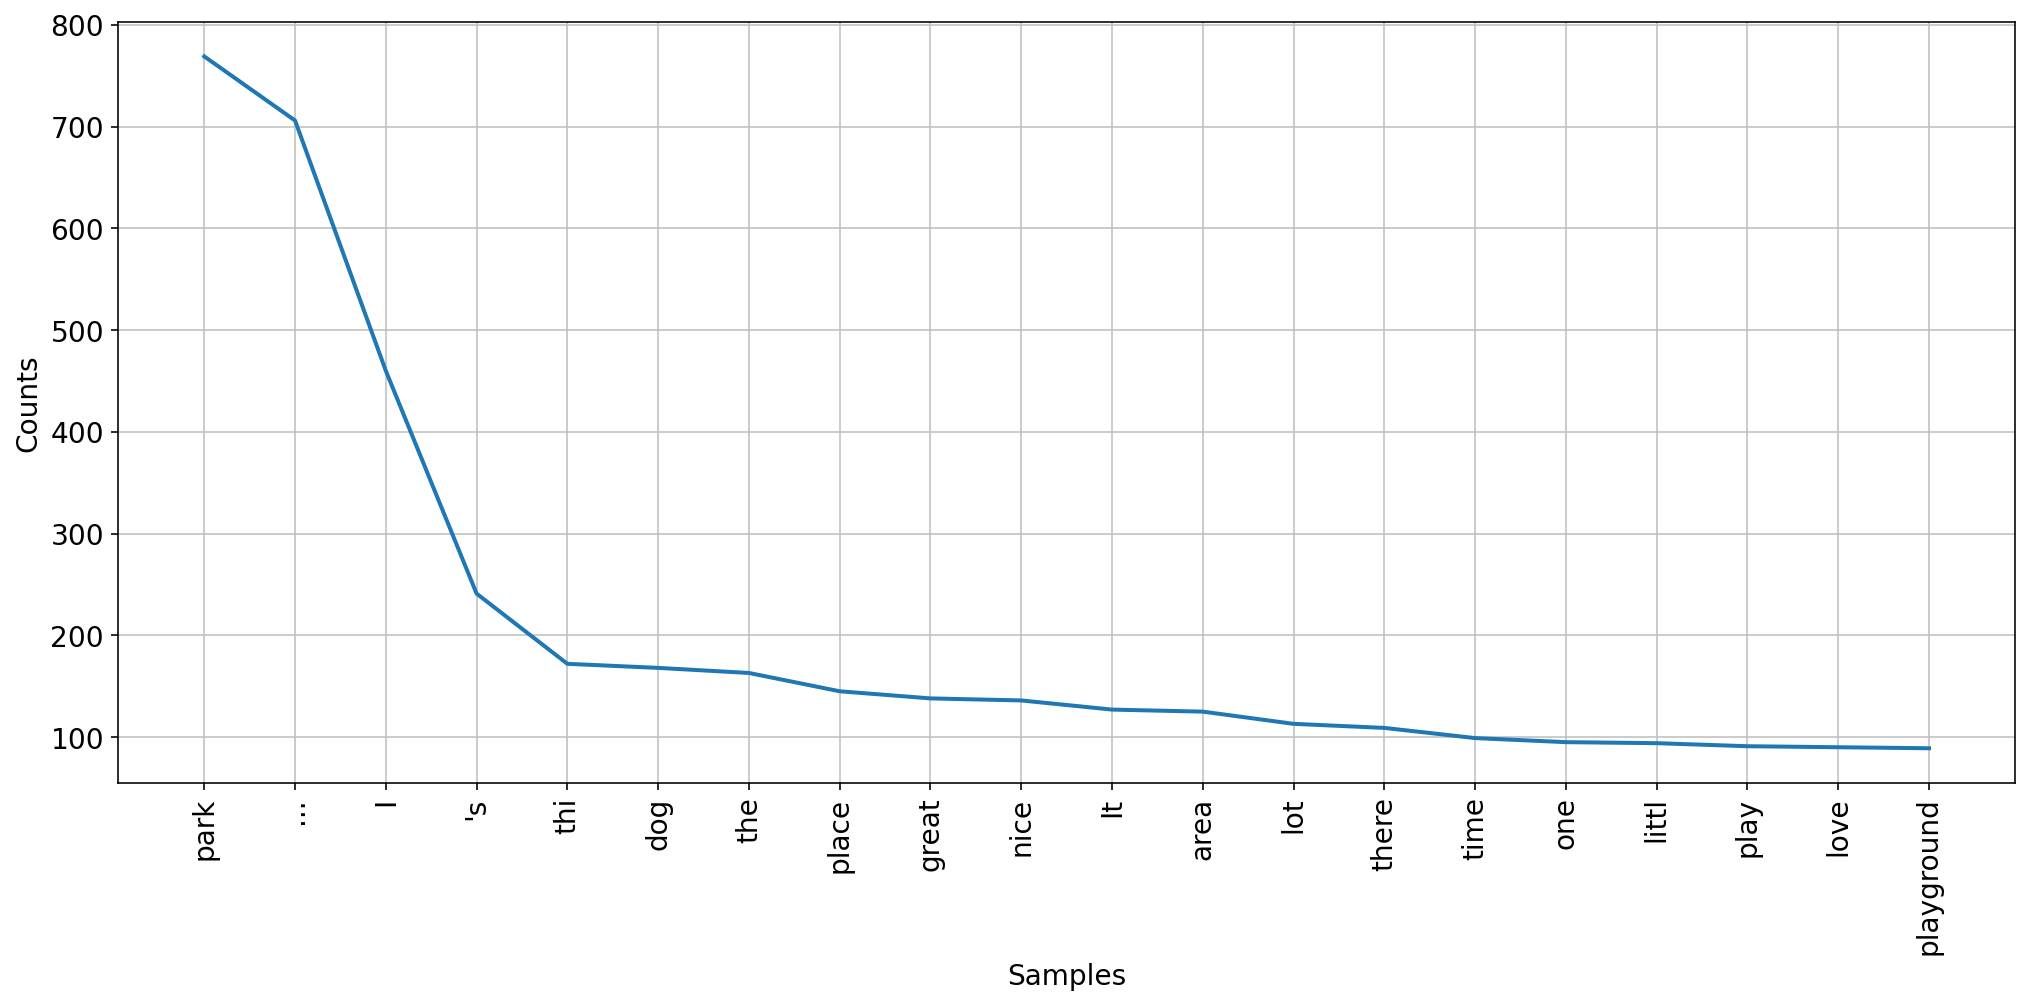

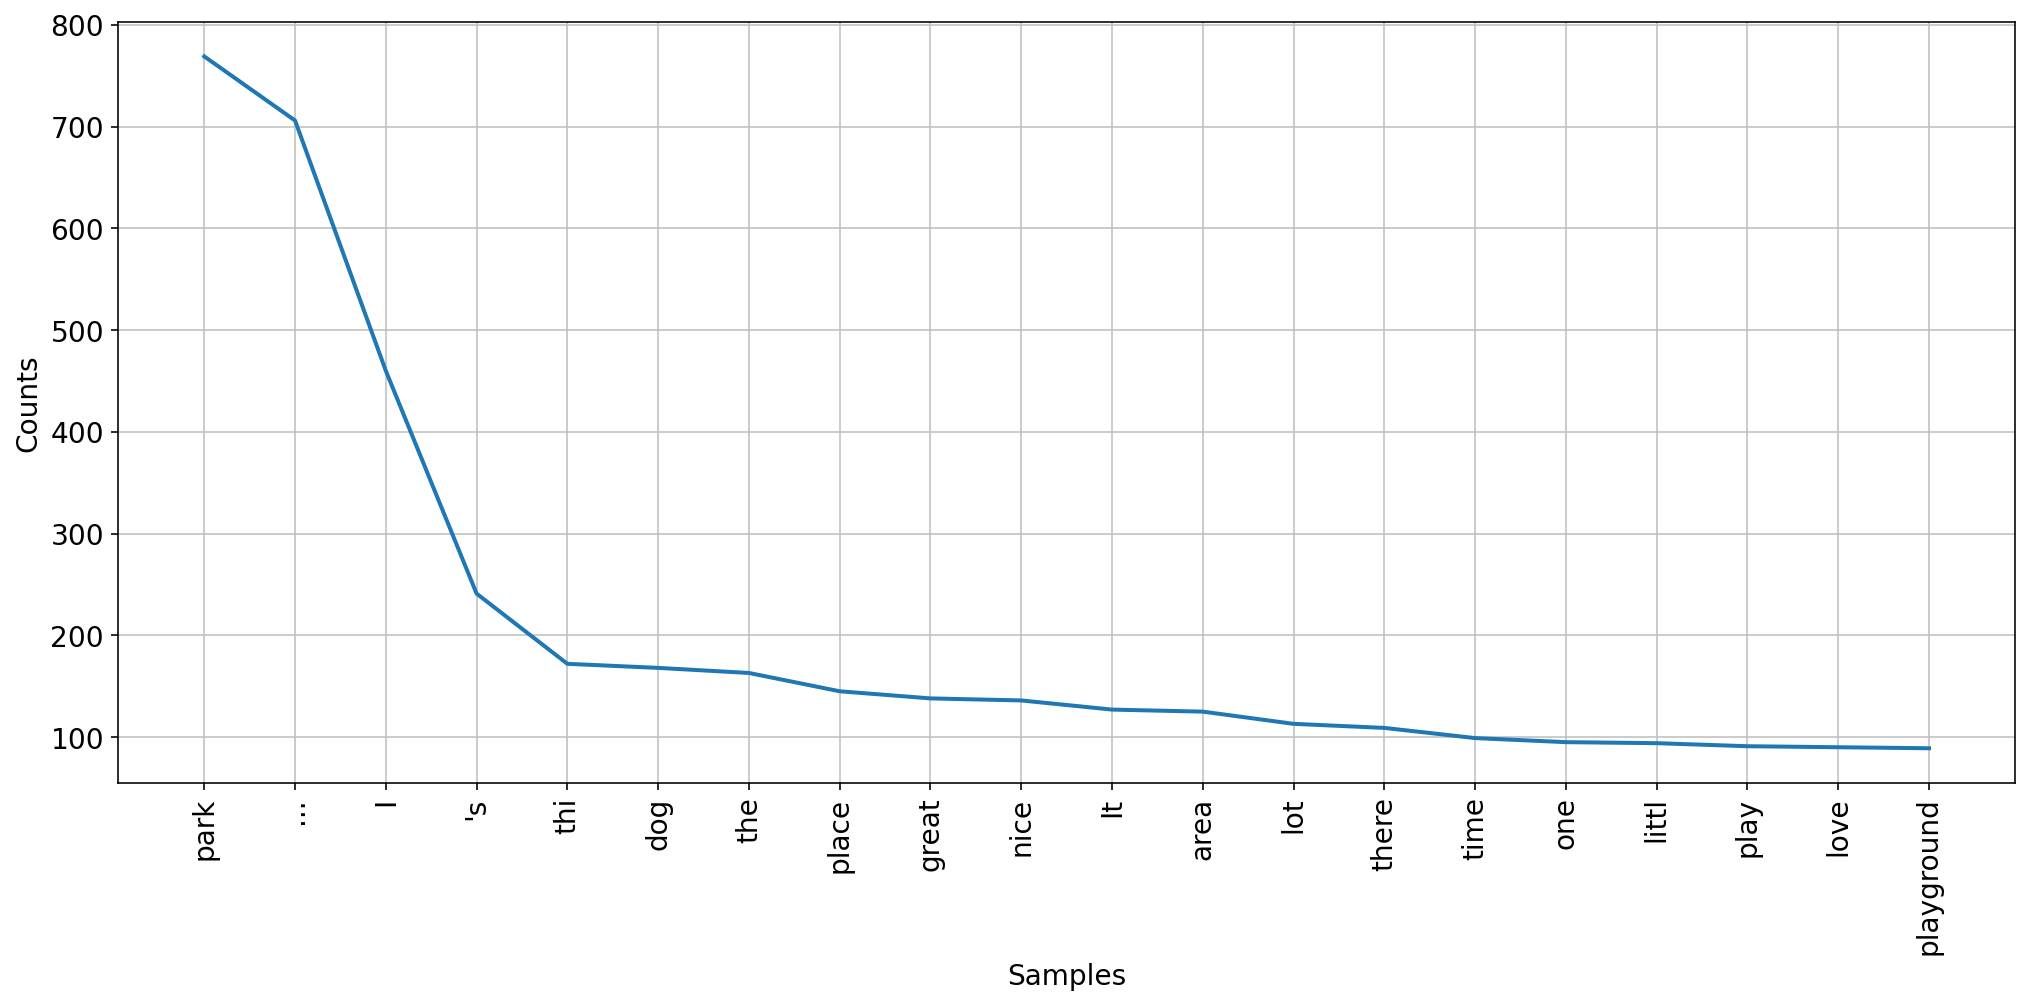

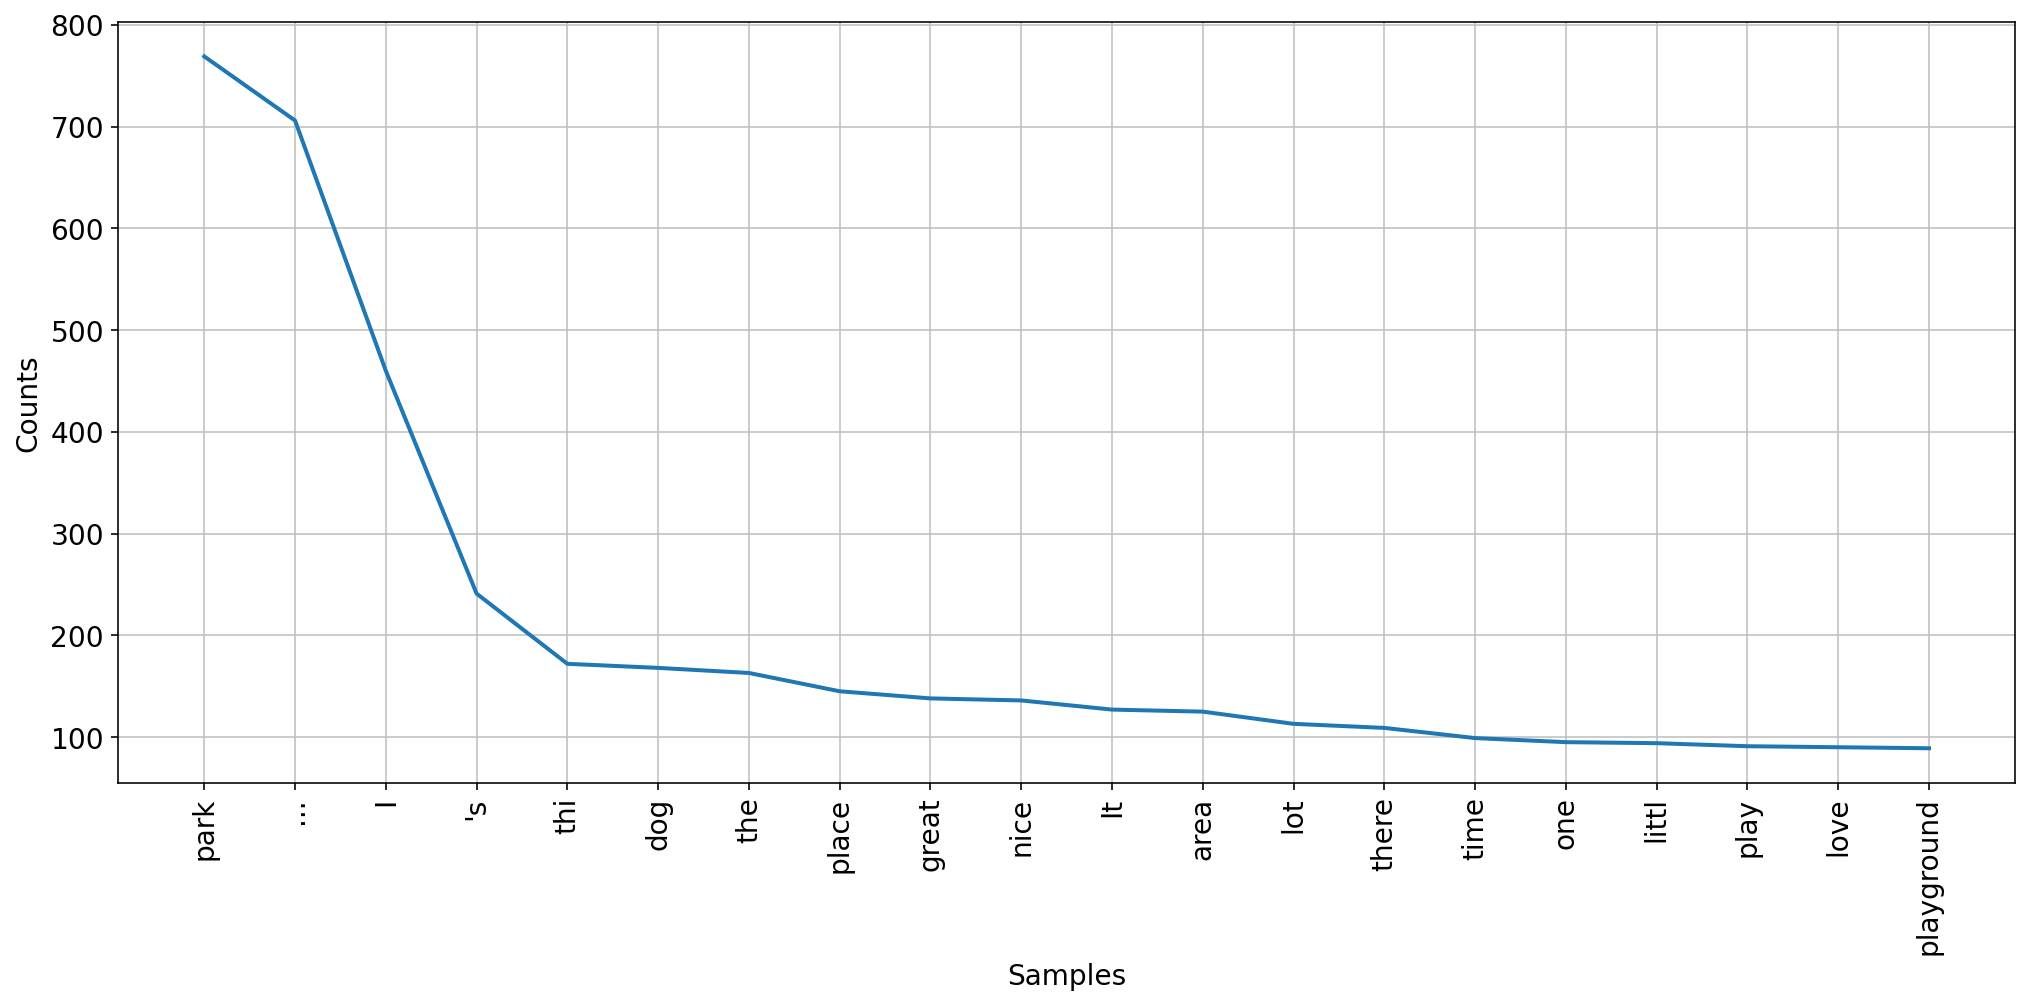

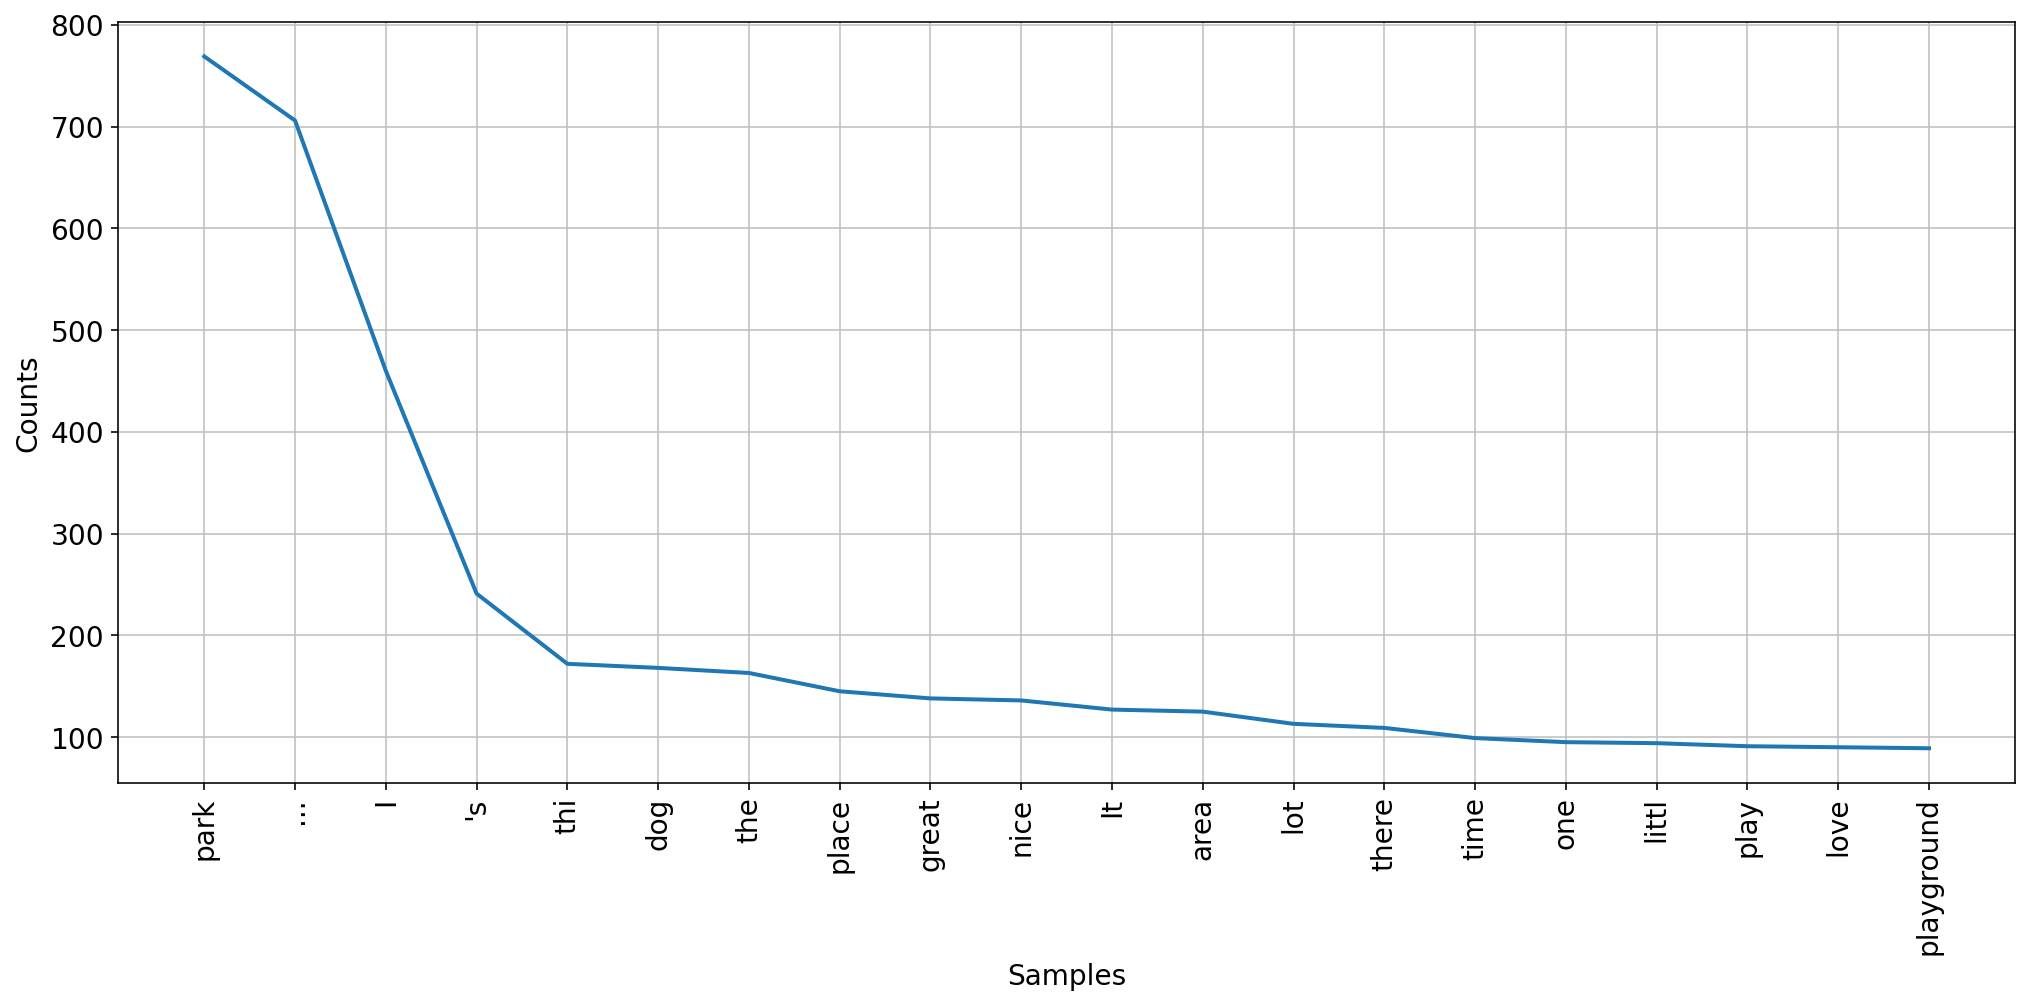

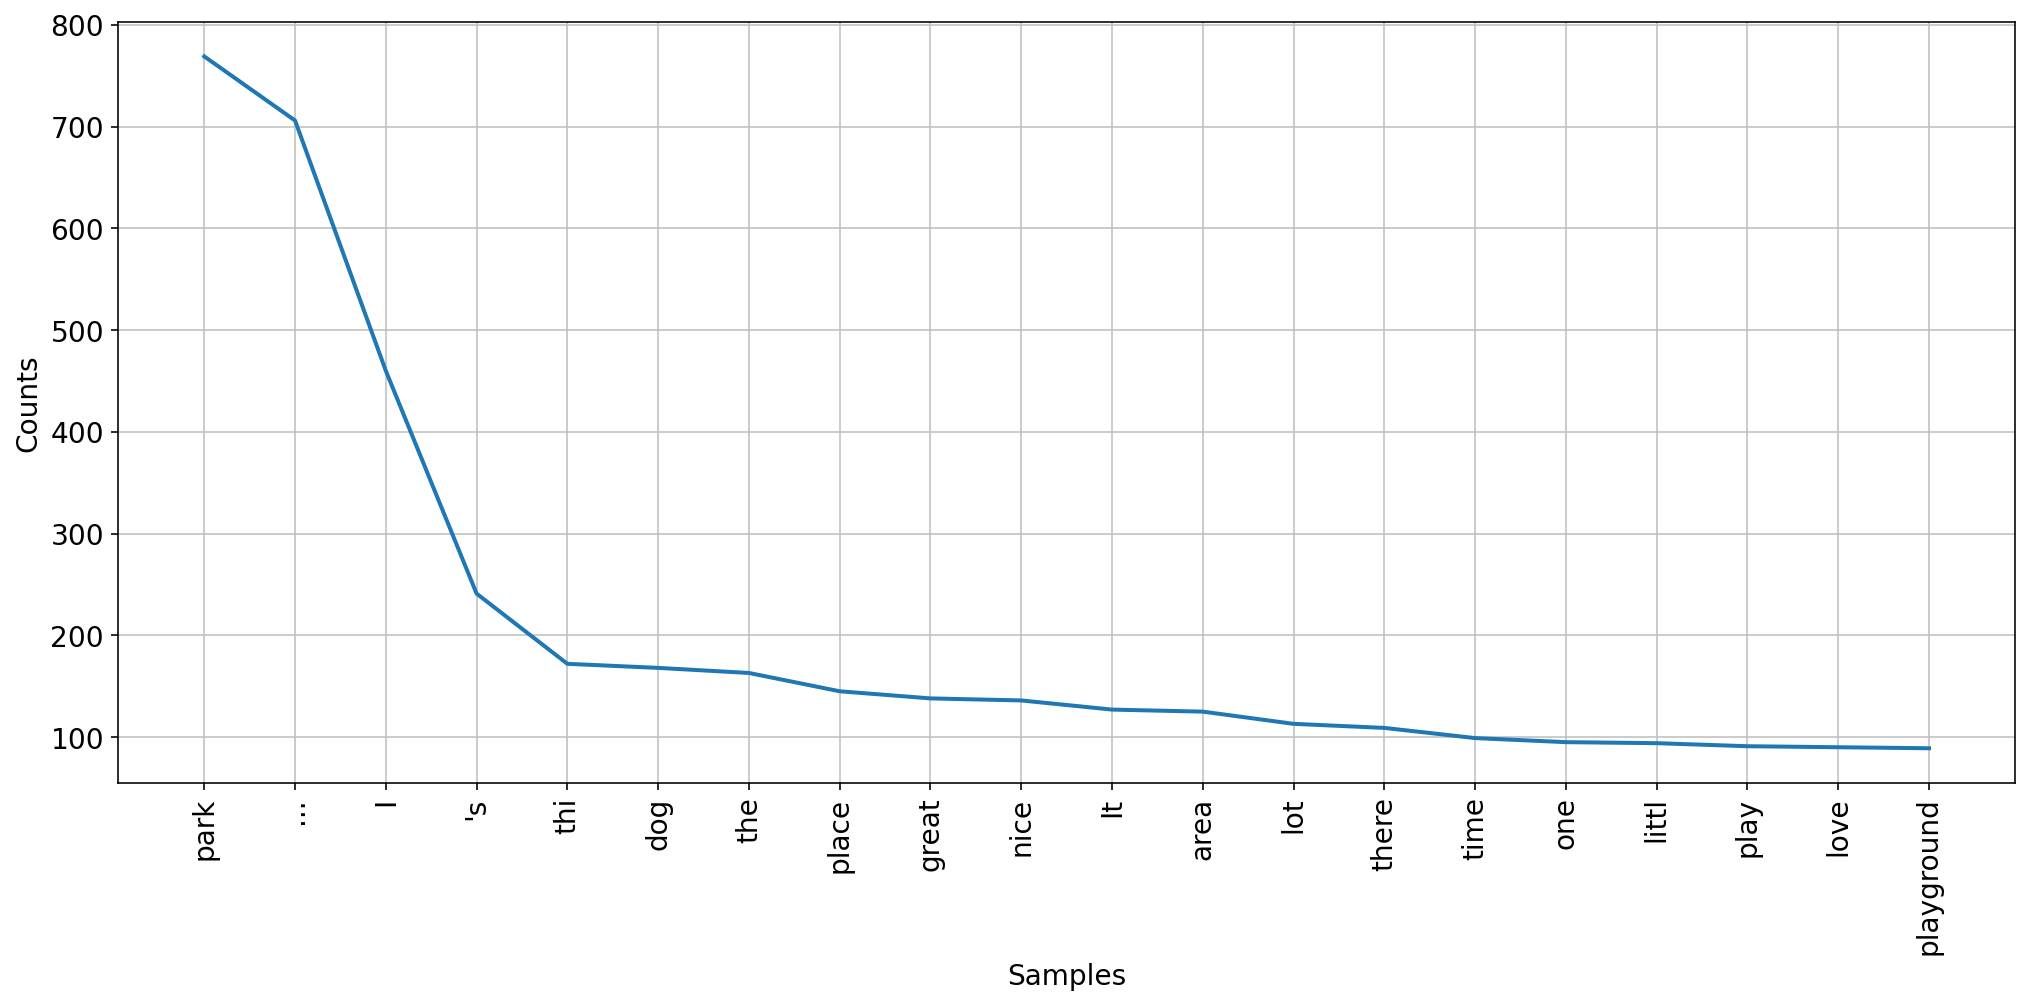

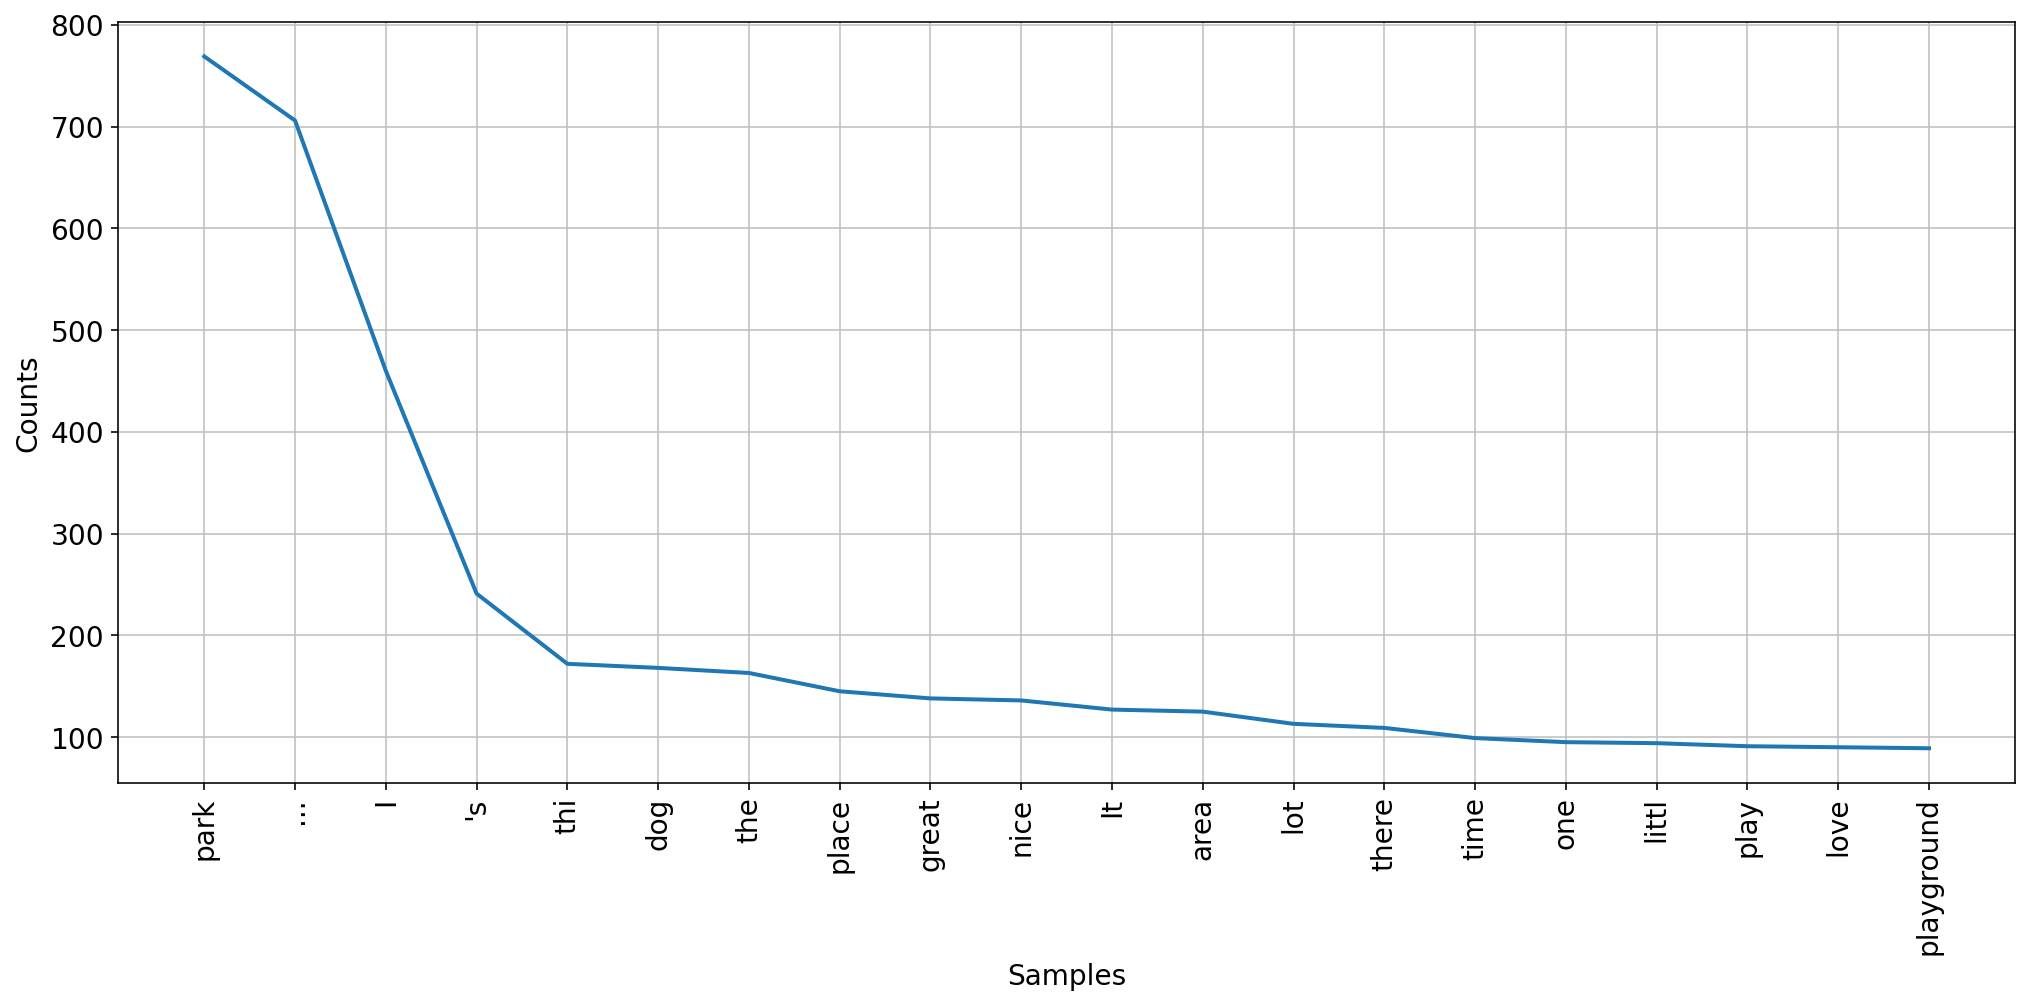

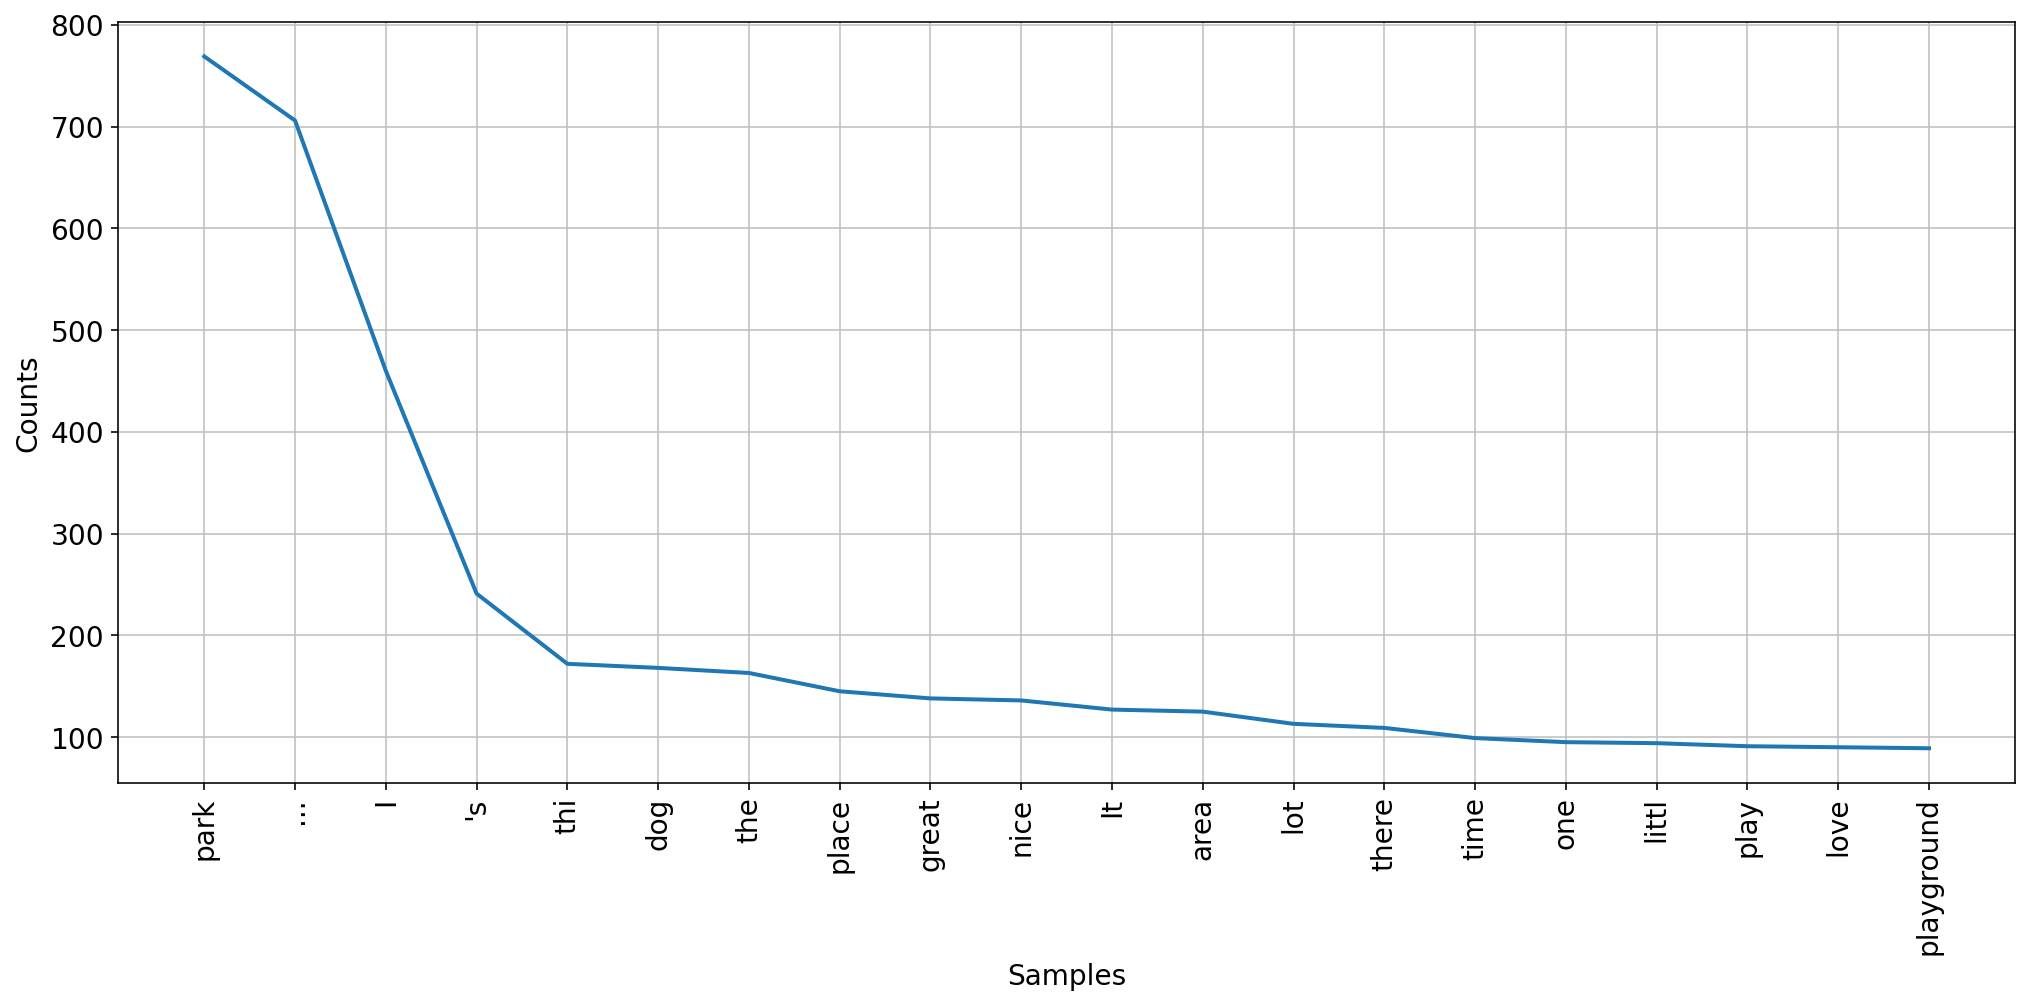

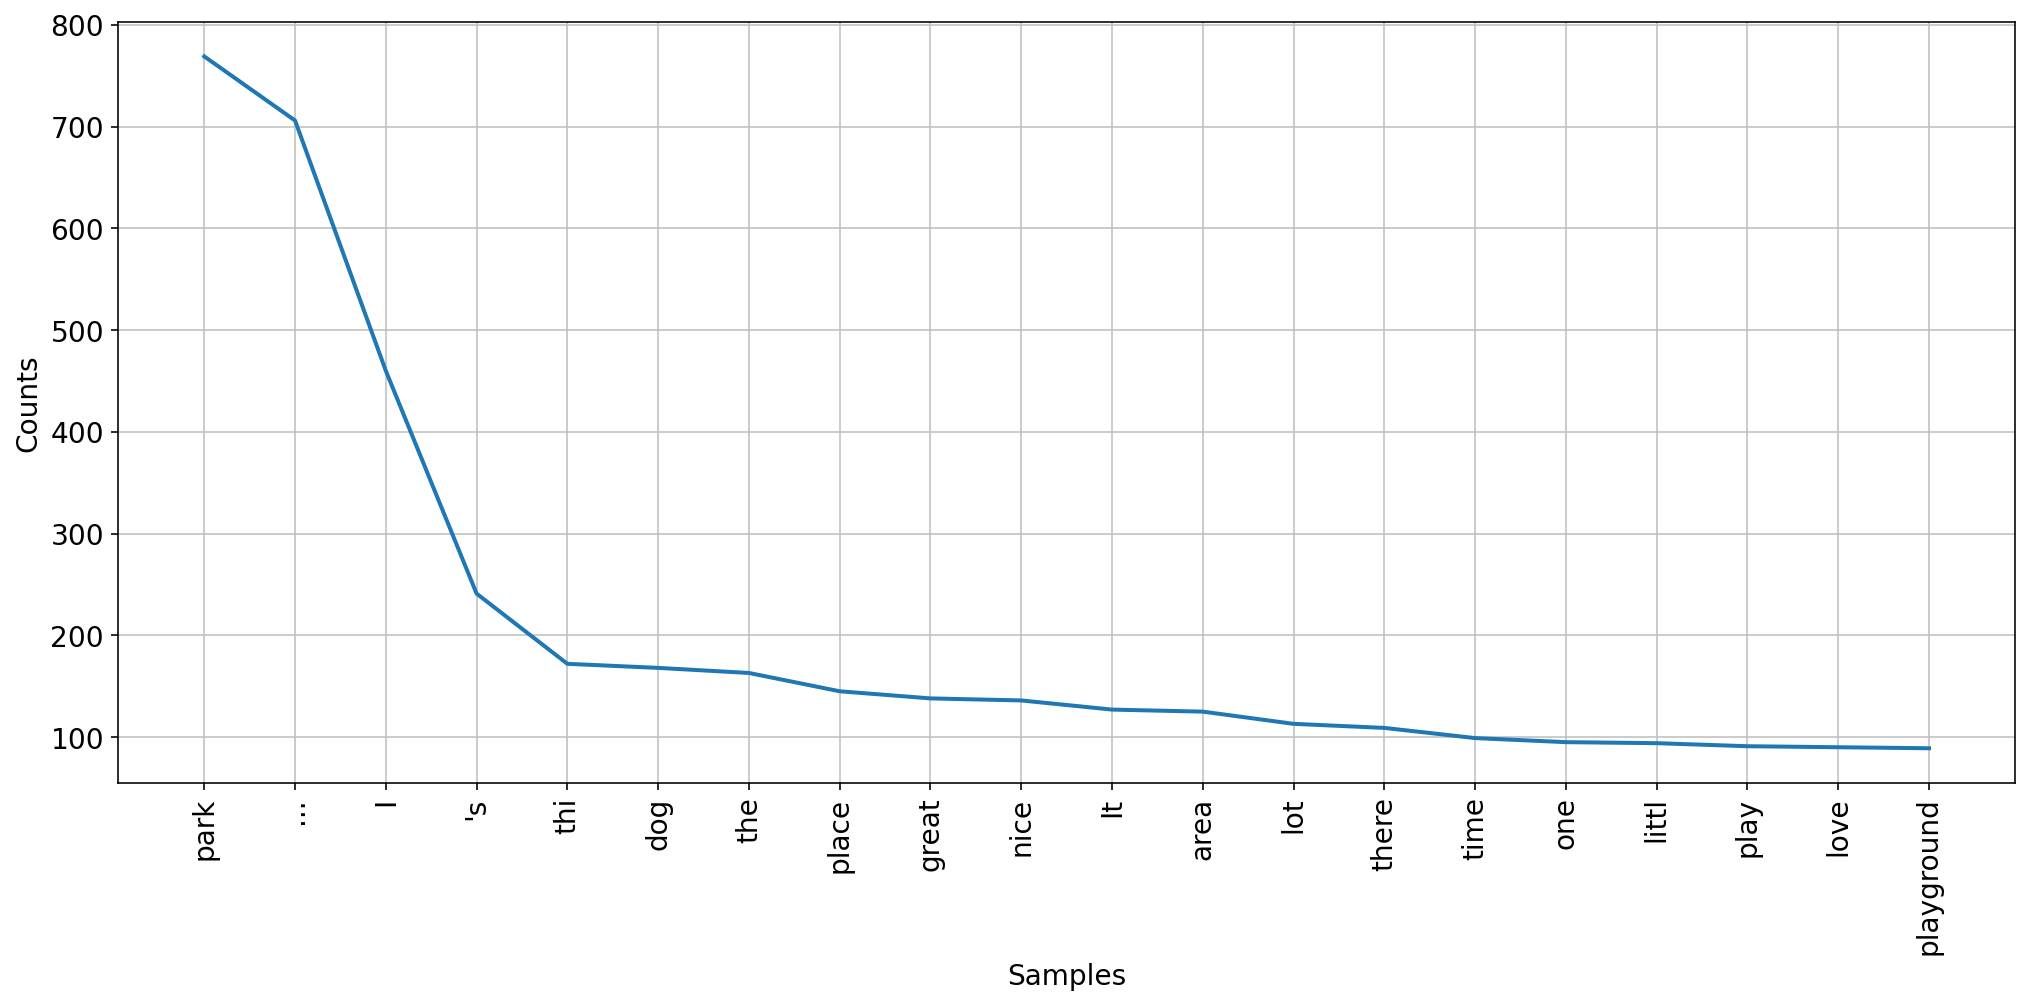

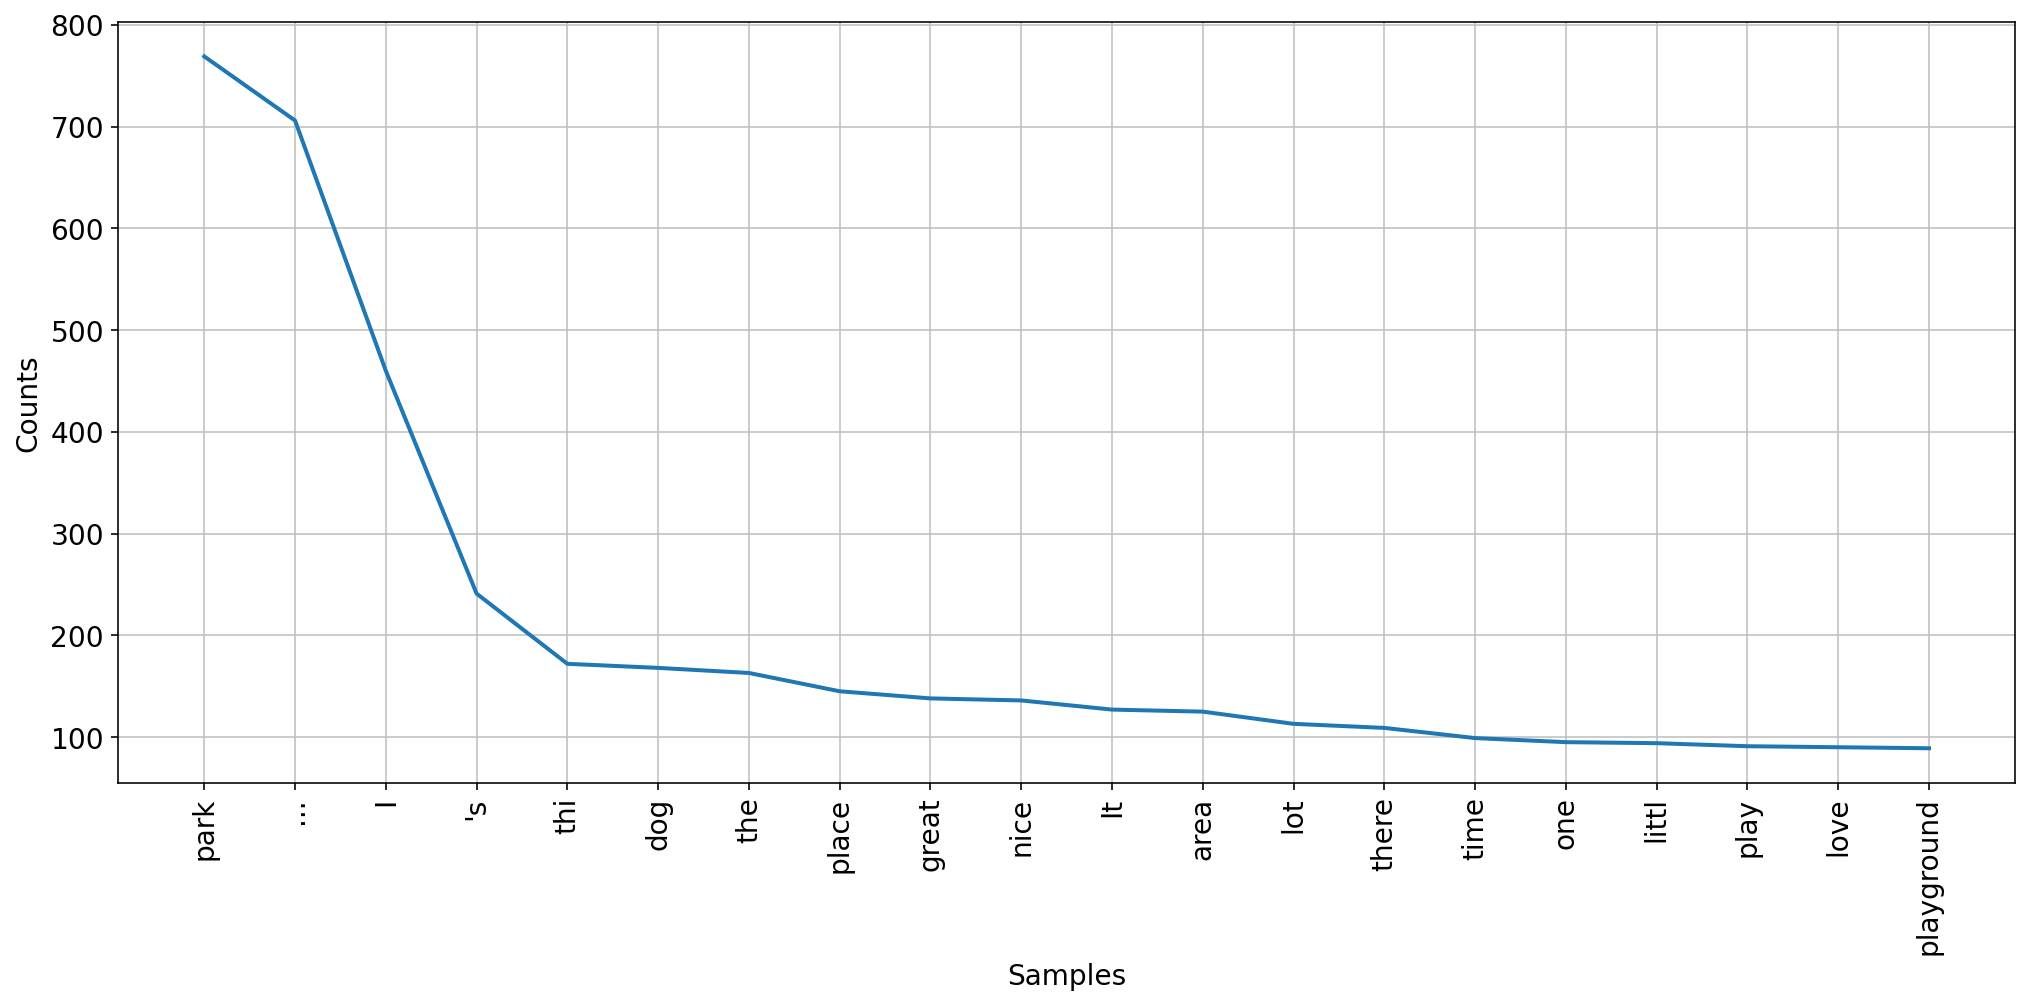

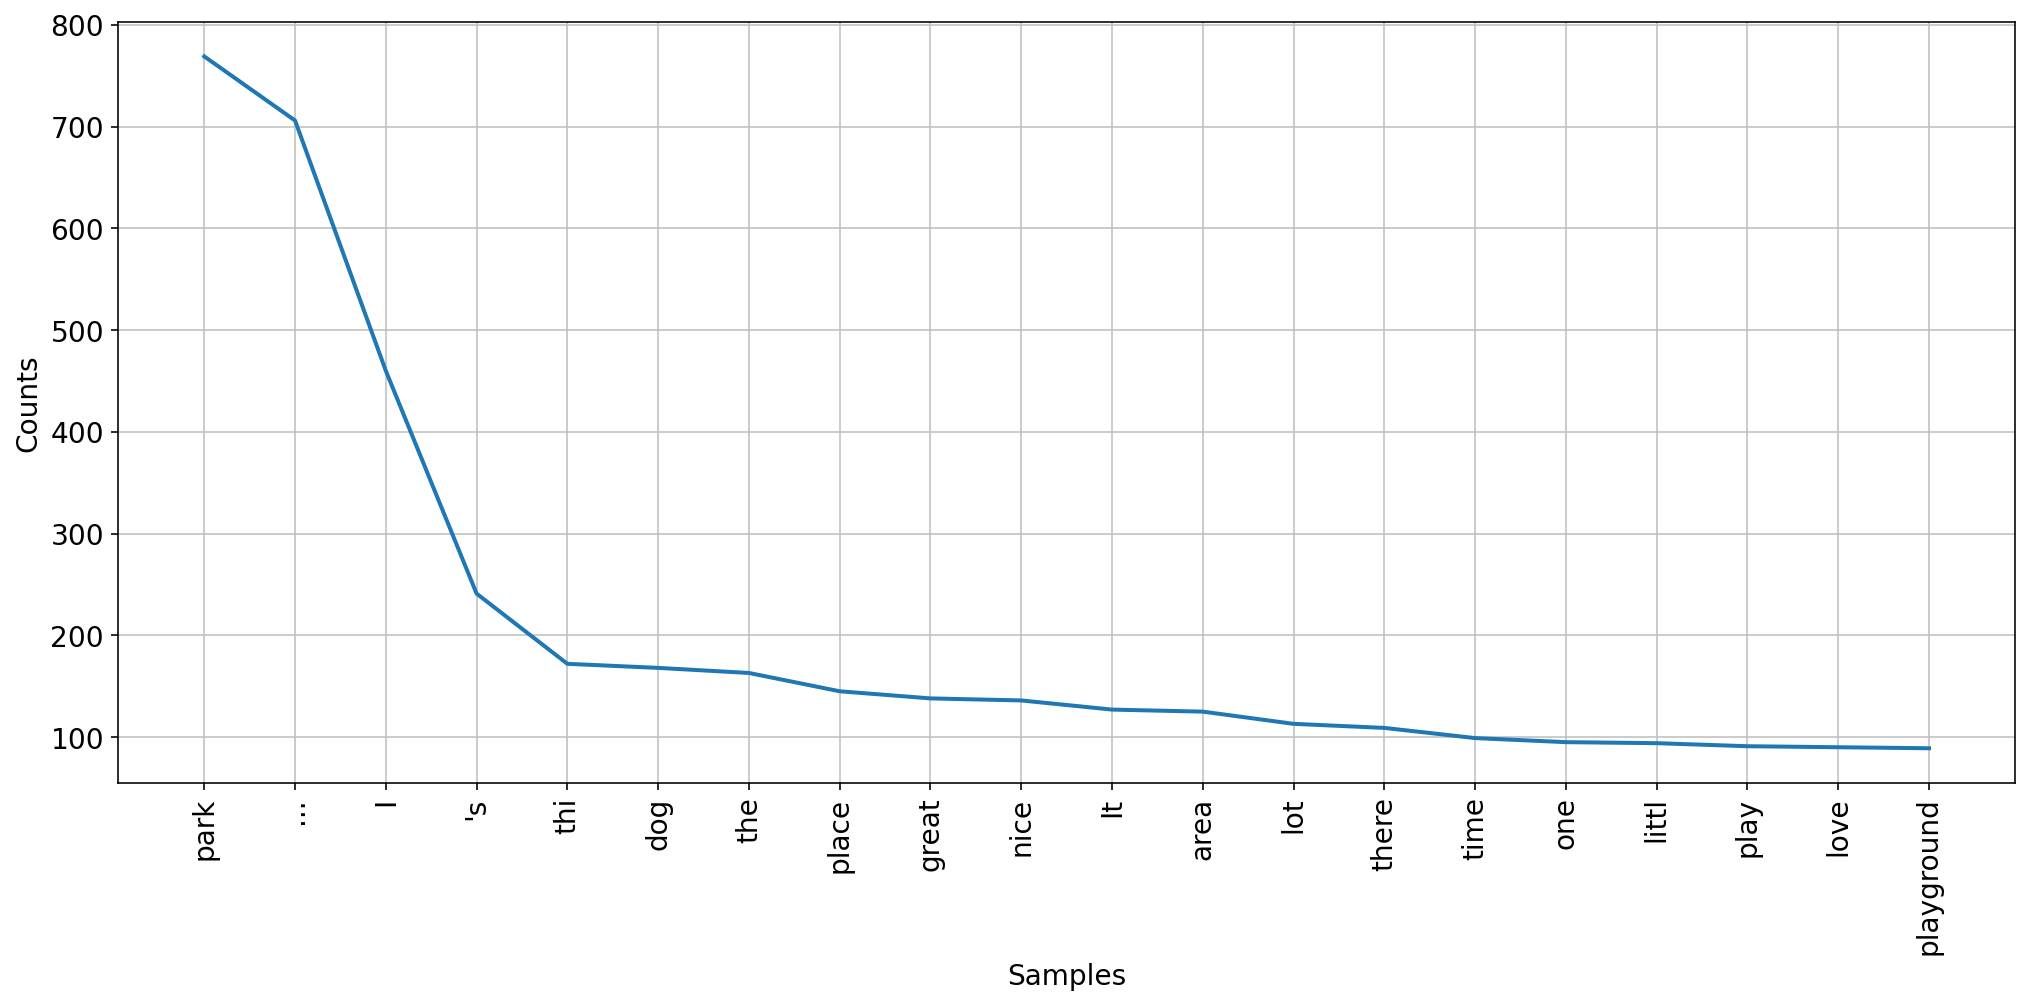

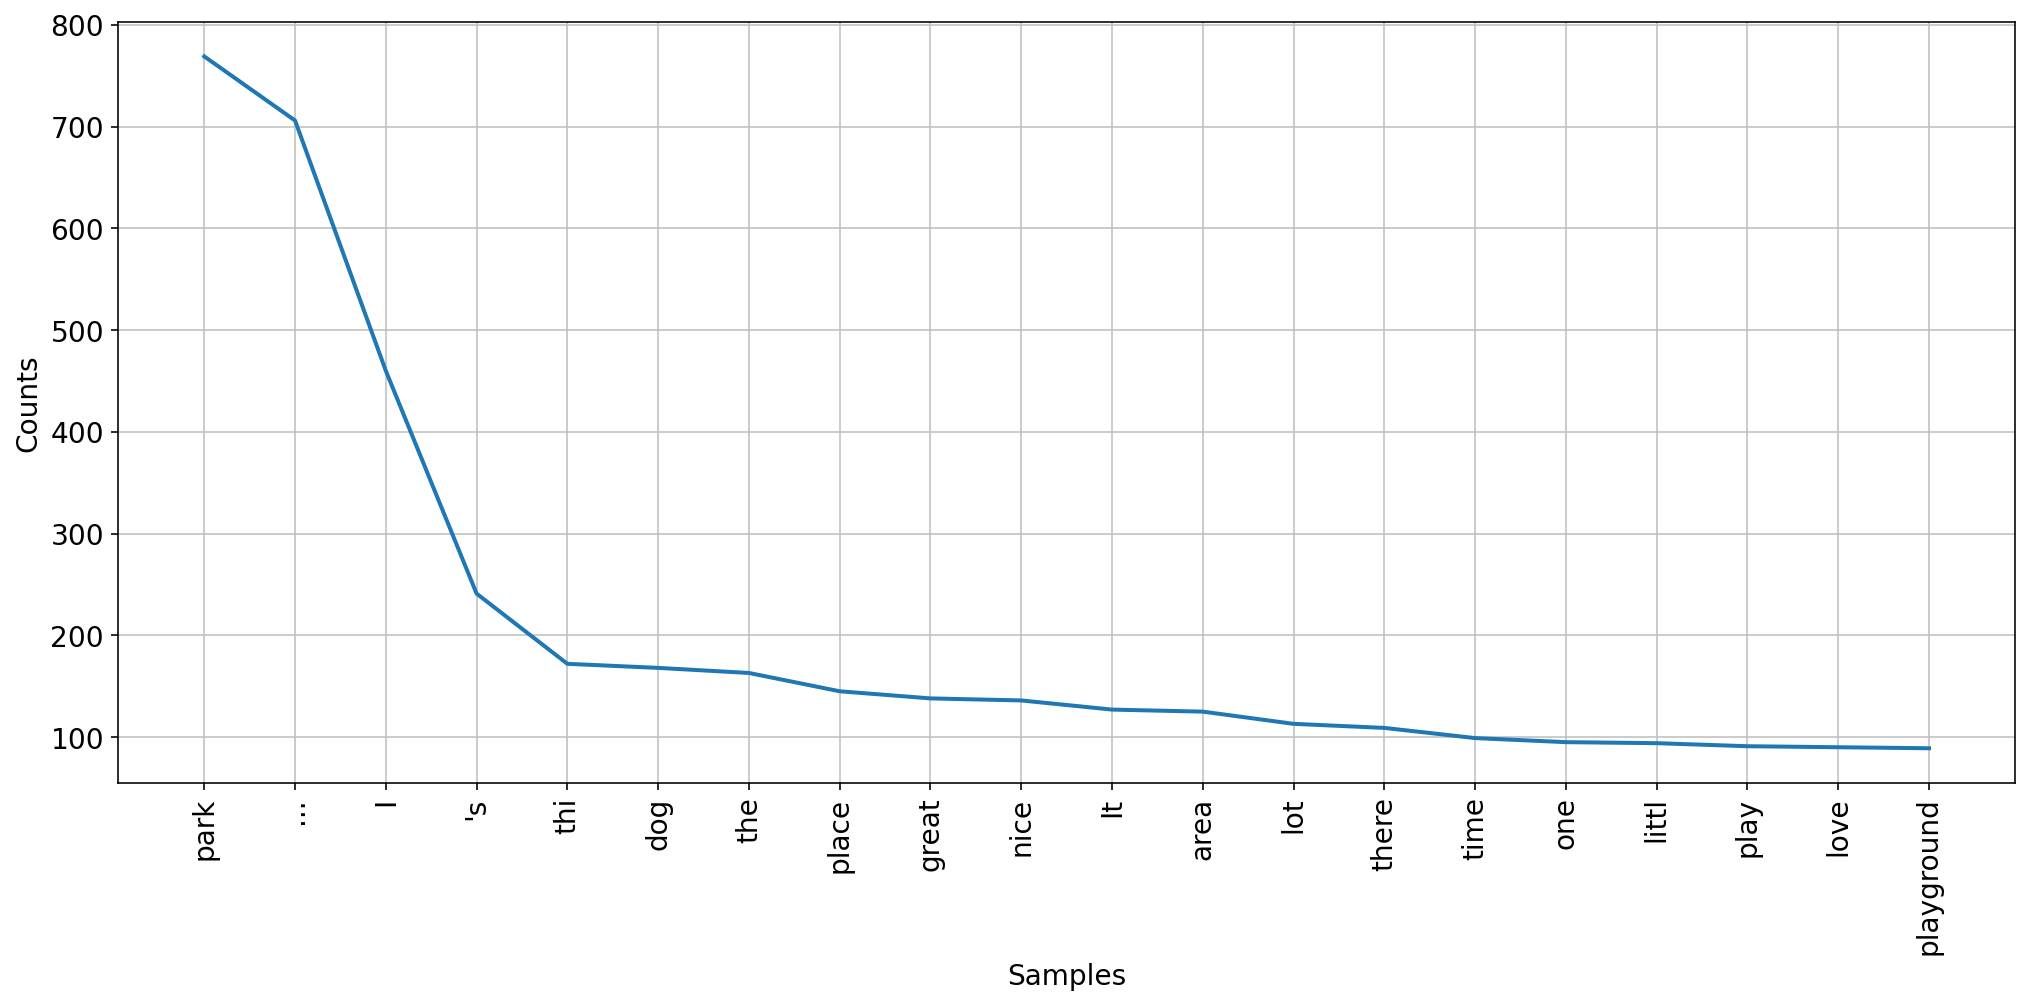

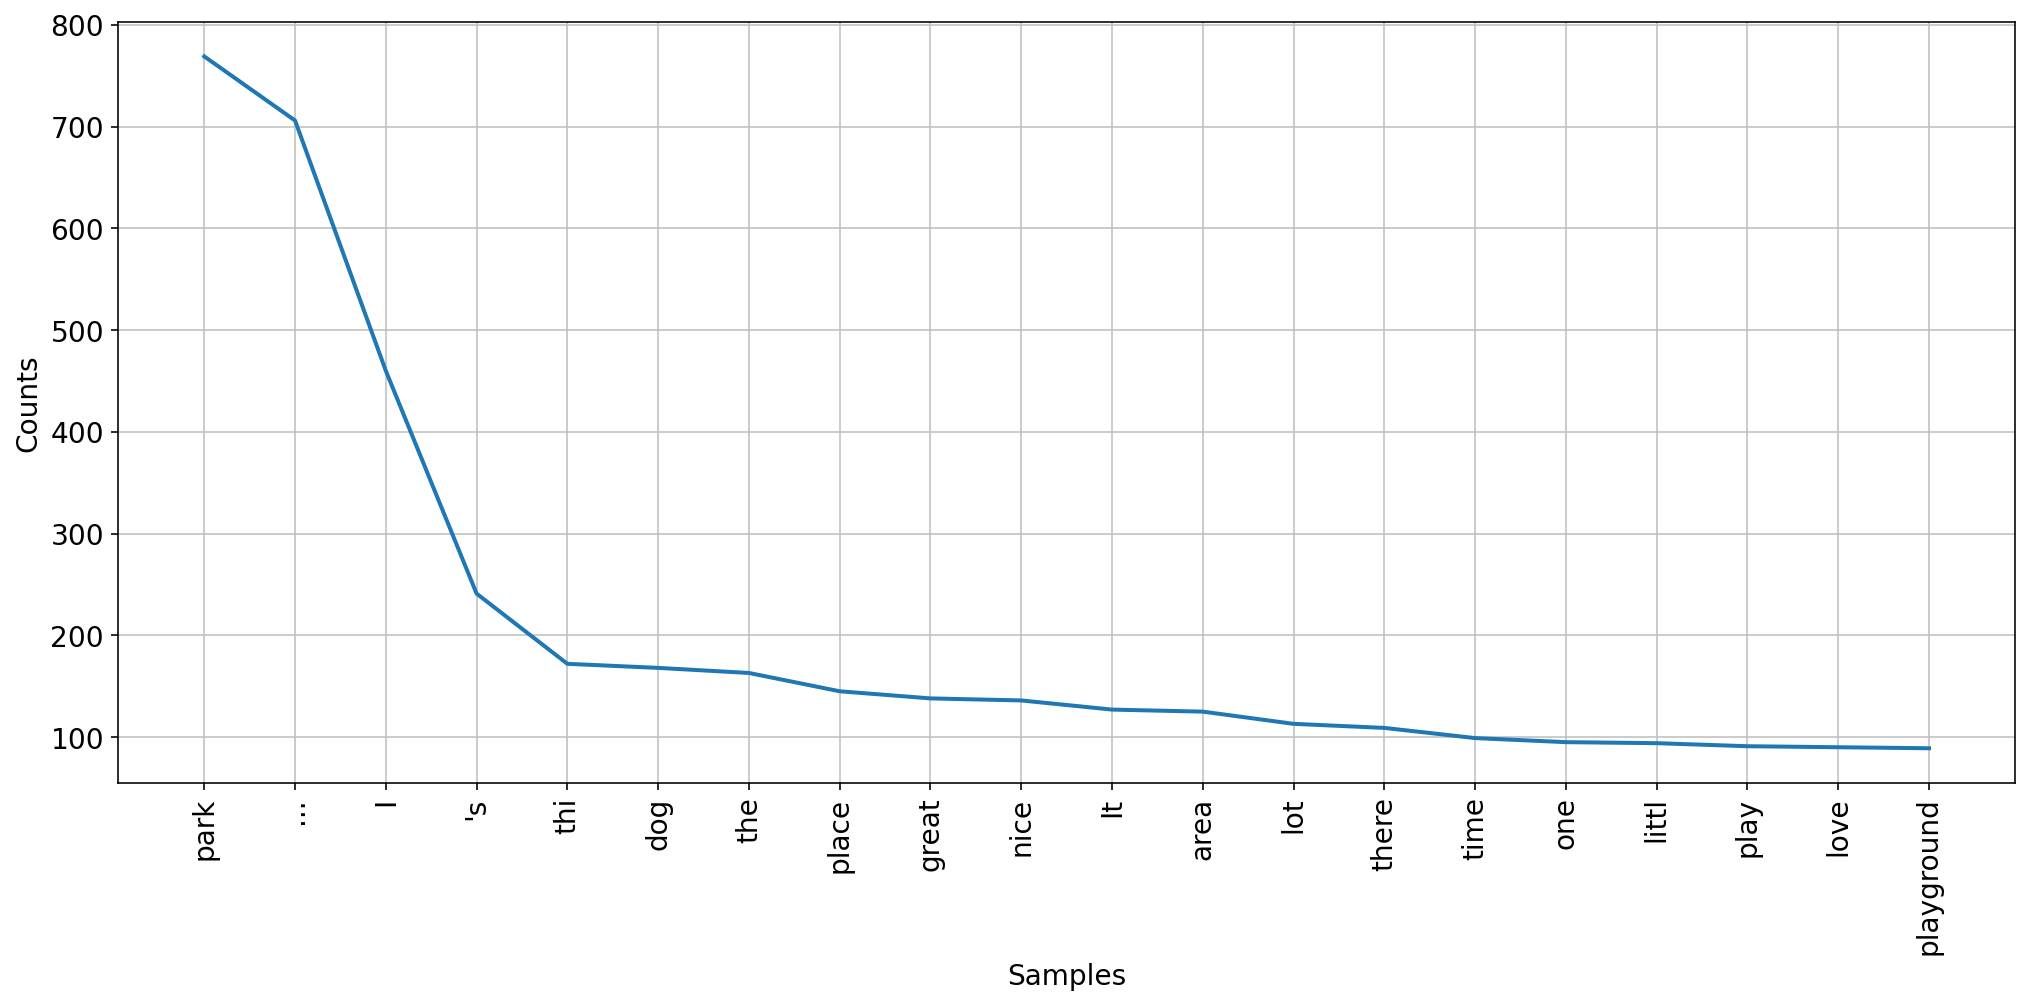

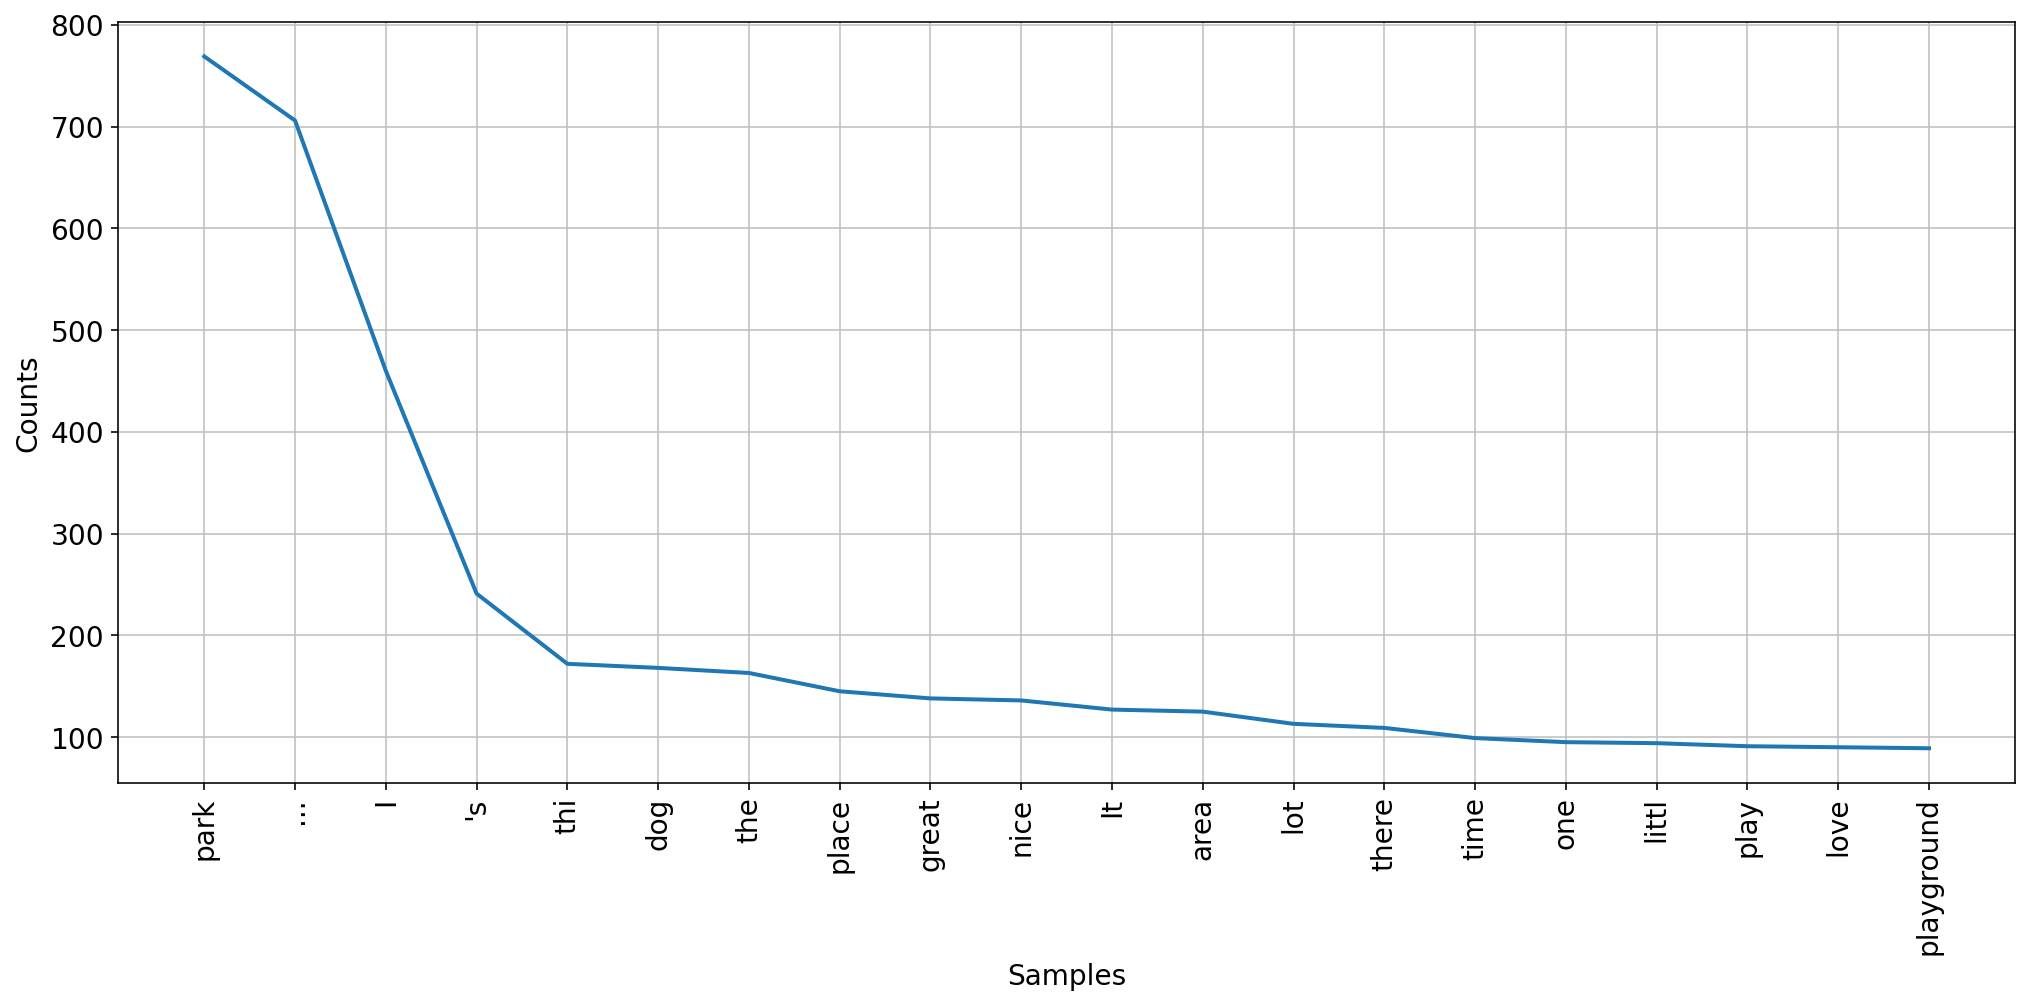

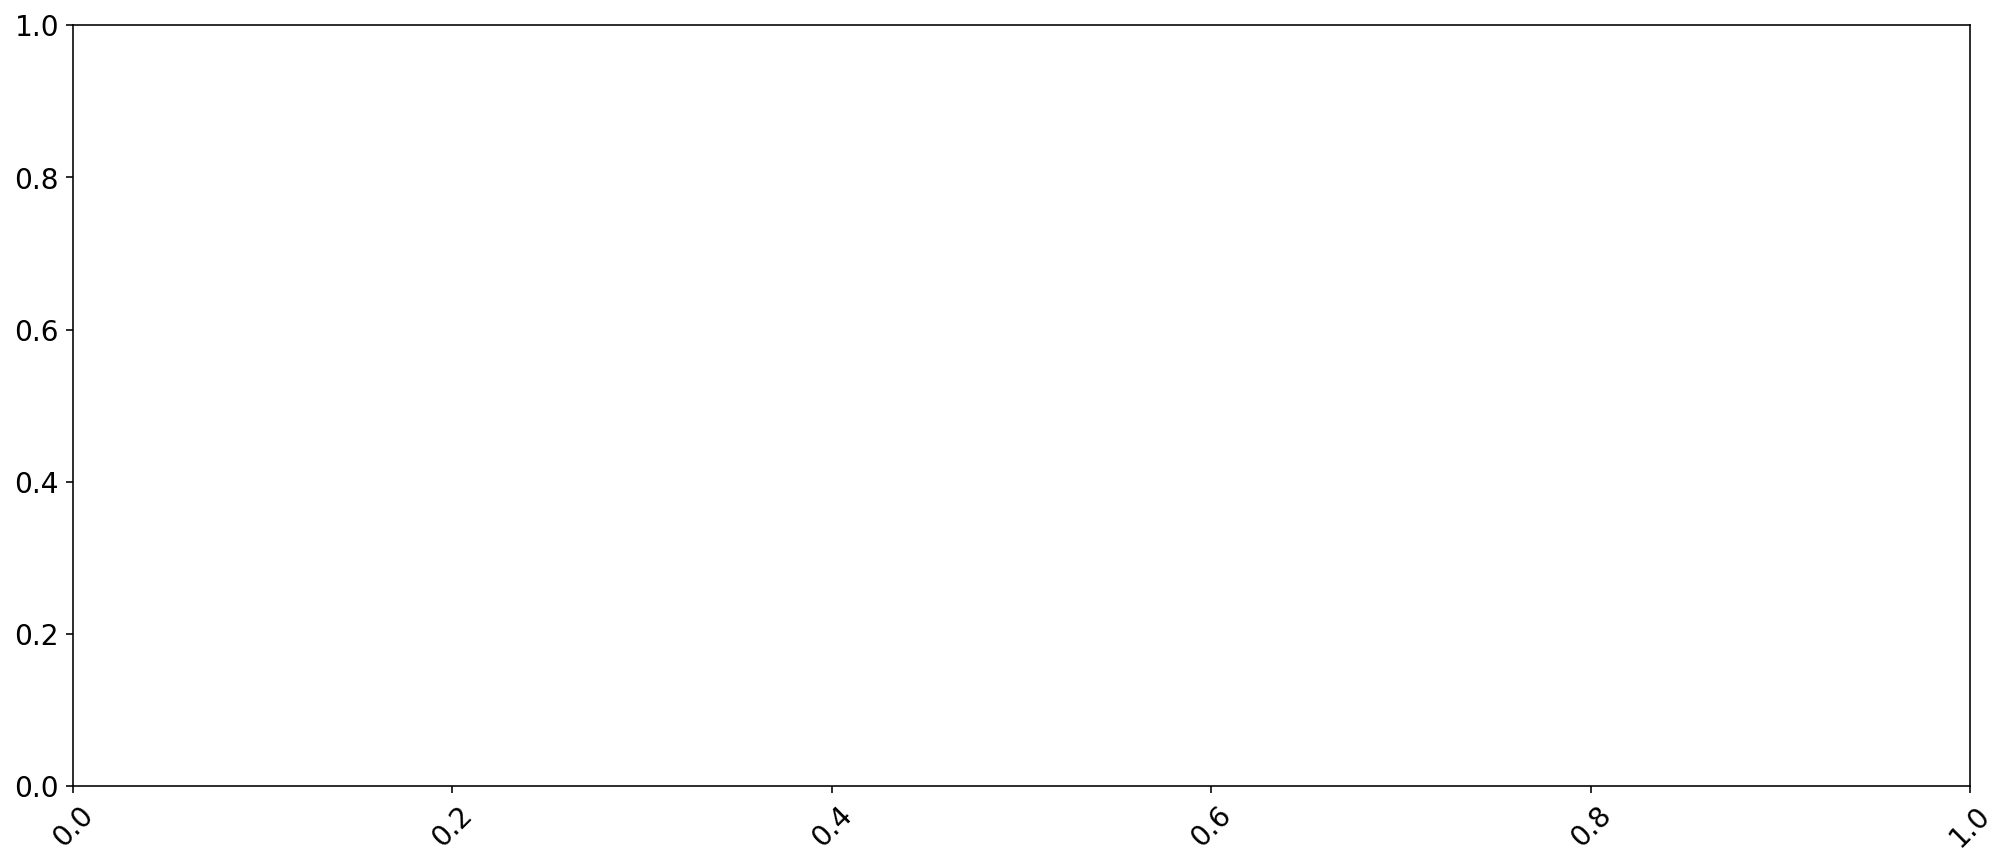

In [33]:
from nltk.probability import FreqDist
import string

fdist_most = FreqDist(most)

for punc in string.punctuation:
    del fdist_most[punc]

    fdist_most.plot(20, cumulative=False)
    plt.xticks(rotation=45)
    

This plot demonstrates the most frequently used words from the 'Review' column. This data shows that the most frequently used word was 'park' which appeared nearly 800 times throughout the reviews, which is expected when talking about parks. Other frequent words included dog, place, great, nice, area, lot, there, time, one, and play. From this list of most frequent words, it seems that most of them have either a positive or neutral connotation, and don't seem to convey anything negative about the parks; however, this is something we will look into further with sentiment scores.

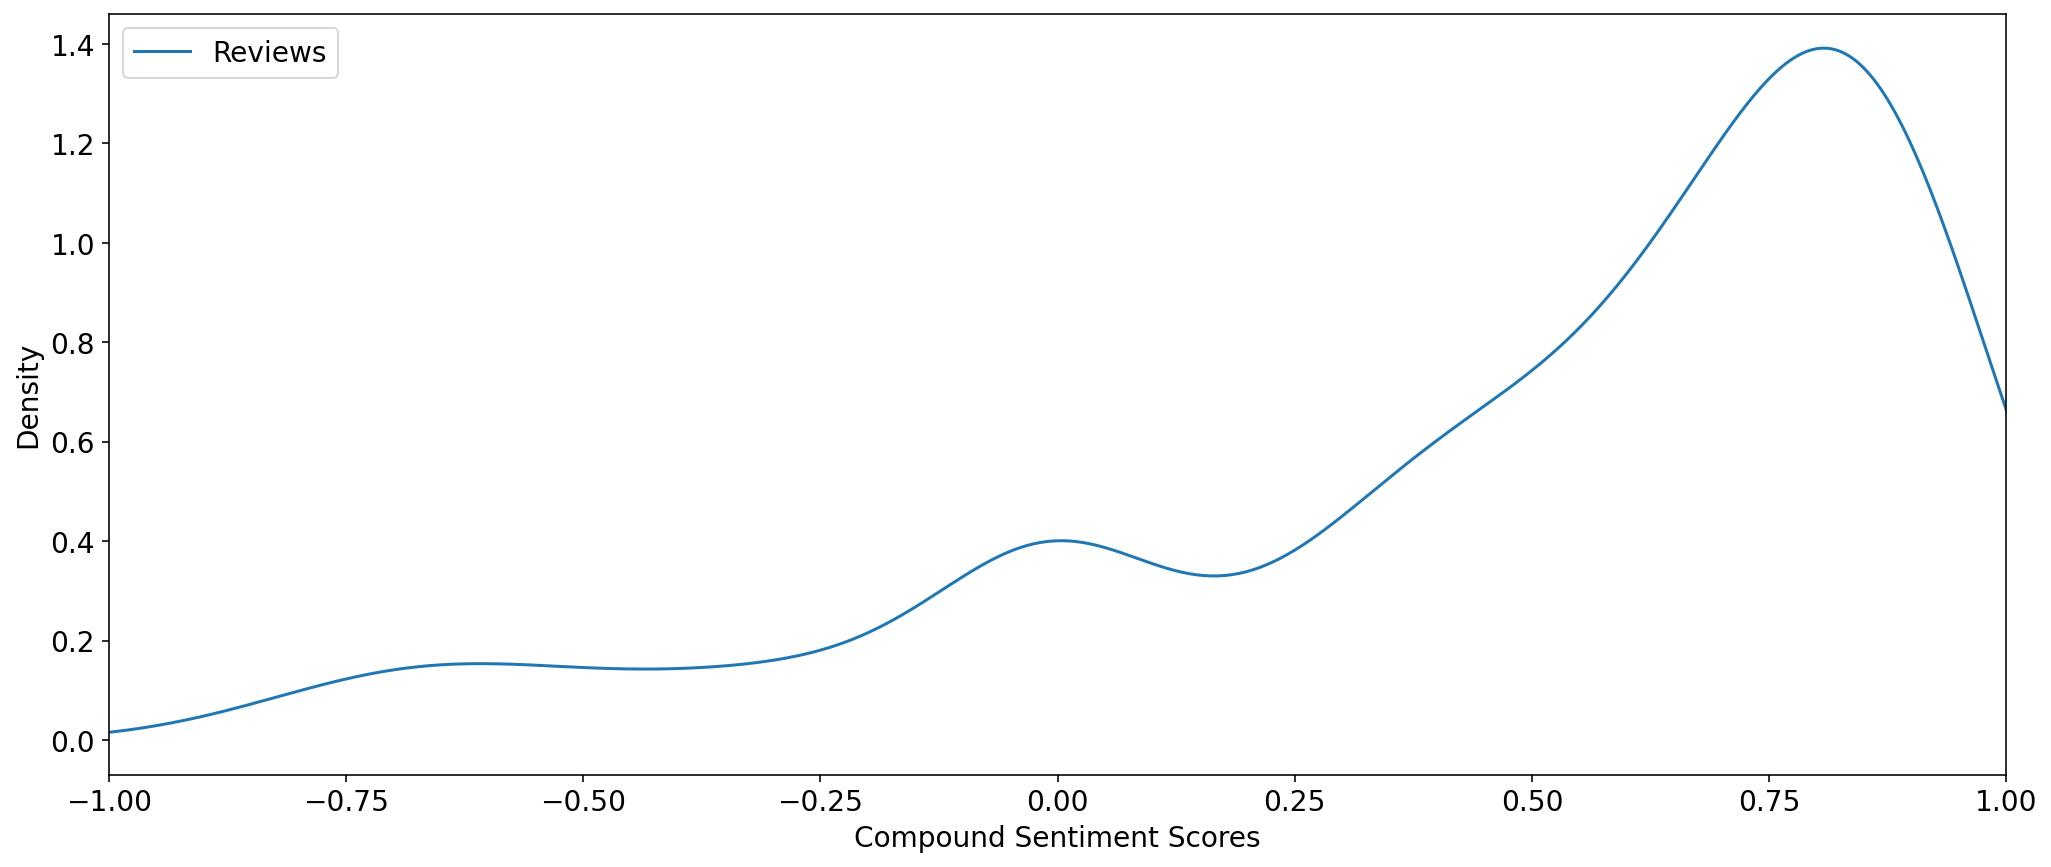

In [30]:
review_sentiments['compound'].plot.density(label ='Reviews')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

This graph gives us the "compound sentiment scores" of words from the 'Reviews' column. From this data, we can see that the overall compound sentiment score tends to be more positive than negative. This aligns with the data we saw with the previous graphs, that the overall trend of the words tend to be more positive. This outcome contradicts with my original hypothesis that San Diego parks would be viewed more negatively due to previous insight from online articles and data on crime and violence near parks. Perhaps this result of a more positive view is the outcome of tourists reviewing the parks without having any insight about things that happen on a daily basis, or it could be the case that San Diego parks are generally viewed in a positive light by the public. Again, it is important to note that the data may be skewed after having dropped all entries without the word 'park.'

#Ethics and Privacy
The data used in this project was provided by the professor, so permission had been granted to use and analyze the data for research purposes. The data came from Yelp, which is free to the public online.

The original data provided by Professor Ellis only included park names, ratings, and reviews. The data did not contain names, addresses, nor any other identifiable information that would reveal a user's private information. Because the data had already been cleaned of that, I did not have to take extra steps to delete names or personal information from the data. Although the data had likely been cleaned prior to being provided to us, it is likely that information from the site could be a possible privacy issue. Therefore, it was important that no names, email addresses, home addresses, or phone numbers of users were included in the data. This type of personal information was not necessary for conducting the data analysis.

It is also important to note that there could be bias in the reviews. Perhaps, people are more likely to write a review if they have a positive experience somewhere rather than negative, which could explain why the overall reviews are more positive. As for the few negative reviews, it could be possible that the users may be exaggerating their negative experience, thus creating a more negative sentiment towards that place. We should also acknowledge that there is bias when analyzing text, since text and words tend to be more subjective and less standardizable than numbers. In this case, we were analyzing the text of the reviews, which means that much of the analysis could be subjective.

Because this data was provided to me, I do not have a complete understanding of how it was pulled, if it was cleaned prior to being given, or how accurate or recent it is. As a result of this, there is a chance I may have missed out on important information that could have been used for the analysis.

#Conclusion and Discussion

In this project, I intended to find out whether San Diego public parks were viewed by users in a more negative or positive light. I ultimately conclude that there was a much more positive response to public parks, since the majority of reviews and ratings were positive. One limitation of this study that should be considered is bias. As previously discussed in Ethics and Privacy, it is possible that many of the reviews were more positive because of the subjectiveness that comes with text analysis. Perhaps people are more likely to exaggerate a positive experience over a negative (or vice versa).

Another possible limitation of this study could be the lack of responses from users who may have had a bad experience at a public park. Perhaps people who had a bad experience at a park may not have thought or cared to submit a negative review, which could explain why there are many more positive reviews overall. Of course, it could also just be the case that people really enjoy San Diego Public parks, which is contradictory to my initial hypothesis that they would be viewed more negatively based on articles and data that painted them as dangerous and crime-ridden.

This project gave me a better perspective on what reviews can say about a place or business. While some reviews may be helpful and honest, others may just be written out of emotion and can be misleading, so it's important to remember that you may not always be getting the full story.